In [1]:
import quandl
import numpy as np
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statistics import mean, stdev
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
import plotly
import plotly.io as pio
import os
from sklearn.preprocessing import scale
from pandas_ml import ConfusionMatrix

//anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
SOXL = pd.read_csv('soxl_new.csv') #ETF growth cycle
Nasdaq = pd.read_csv('nasdaq_new.csv') #Index
TQQQ = pd.read_csv('tqqq_new.csv') #3X Index
MU = pd.read_csv('mu_new.csv') #high Beta
AMD = pd.read_csv('amd_new.csv') # high beta
NFLX = pd.read_csv('nflx_new.csv') #High growth
AMZN = pd.read_csv('amzn_new.csv') #High growth
V = pd.read_csv('visa_new.csv') #low volalitity
YINN = pd.read_csv('yinn_new.csv') #looks like bell curve
NVDA = pd.read_csv('nvda_new.csv') #high growth
WTW = pd.read_csv('wtw_new.csv') #high beta
F = pd.read_csv('f_new.csv') #highly traded
MSFT = pd.read_csv('mfst_new.csv') #high traded
HNGR = pd.read_csv('hngr_new.csv') #high beta cyclic




stocks = [SOXL, Nasdaq, TQQQ, MU, AMD, NFLX, AMZN, V, YINN, NVDA, WTW, F, MSFT, HNGR]

In [3]:
for df in stocks:
    df.replace(-np.inf, np.nan,inplace=True)
    df.replace(np.inf, np.nan,inplace=True)
    df.dropna(inplace=True)
    #df.reset_index(inplace=True)




In [4]:
#MU_cln.columns.values.tolist()
features = ['Day_previous_roi','ma10','rsi10','ma20','rsi20','ma_chg20',
            'ma60','rsi60','ma200','rsi200','obv','macd_diff','ma_chg10',
            'macd_diff_hist','aroon_diff','slope60','r_sqr_60','ma_chg60',
            'slope10','r_sqr_10','slope5','r_sqr_5','stDev20','ma_chg200',
            'rsi_chg10','rsi_chg20','rsi_chg60','rsi_chg200',
            'percent_down','sine','leadsine','tsf10','tsf20','tsf60','tsf200',
            'up_dwn_prev','shawman','hammer','semi_pk_pr','open_H_ratio',
            'open_L_ratio','close_H_ratio','close_L_ratio']
features_2 = ['Day_previous_roi','ma10','rsi10','ma20','rsi20',
            'ma60','rsi60','ma200','rsi200','obv','macd_diff',
            'macd_diff_hist','aroon_diff','slope60','r_sqr_60',
            'slope10','r_sqr_10','slope5','r_sqr_5',
            'percent_down','sine','leadsine','tsf10','tsf20','tsf60','tsf200',
            'open_H_ratio',
            'open_L_ratio','close_H_ratio','close_L_ratio']
corr_ft = ['Day_previous_roi','ma10','rsi10','ma20','rsi20',
            'ma60','rsi60','ma200','rsi200','obv','macd_diff',
            'macd_diff_hist','aroon_diff','slope60','r_sqr_60',
            'slope10','r_sqr_10','slope5','r_sqr_5','stDev20',
            'percent_down','sine','leadsine','tsf10','tsf20','tsf60','tsf200',
            'up_dwn_prev','shawman','hammer','semi_pk_pr','tar_3best_roi']

targets_cat = ['up_dwn_curr',
               'tar_3best_roi',
               'tar_5best_roi',
               'tar_10best_roi',
               'tar_20best_roi',
               'tar_3best_class',
               'tar_5best_class',
               'tar_10best_class',
               'tar_20best_class',
               'easy_buy',
               'tar_3new_high',
               'tar_5new_high',
               'tar_10new_high',
               'tar_20new_high']

targets_reg = ['target_3roi',
               'target_5roi',
               'target_10roi',
               'target_20roi']
#Set stock or dataframe
df_cln = TQQQ
target_name = 'tar_1best_class'
#.75 make a 25/75 split
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features_2]
feature_test = df_cln.loc[stop:,features_2]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
    

In [5]:
print(target_train.shape,target_test.shape,feature_train.shape,feature_test.shape)

test = np.asarray([1,2,3,4,5,6,7,8])
print(test.shape)

(1558, 1) (389, 1) (1558, 30) (389, 30)
(8,)


In [6]:

# Create a random forest classifier
rf2 = RandomForestClassifier(n_estimators=1000)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features_2).sort_values(ascending=False)
feature_imp
#rf.feature_importances_

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



rsi20               0.039325
tsf200              0.037331
rsi10               0.036249
close_H_ratio       0.035764
ma60                0.035732
Day_previous_roi    0.034914
r_sqr_5             0.034669
open_L_ratio        0.034657
close_L_ratio       0.034318
ma20                0.034250
open_H_ratio        0.034064
rsi60               0.034044
rsi200              0.033918
macd_diff_hist      0.033883
r_sqr_10            0.033839
ma10                0.033093
percent_down        0.032923
obv                 0.032858
leadsine            0.032477
slope5              0.032443
ma200               0.032263
slope60             0.032133
r_sqr_60            0.032048
tsf20               0.031907
tsf10               0.031879
sine                0.031815
slope10             0.031463
macd_diff           0.031454
tsf60               0.031076
aroon_diff          0.023212
dtype: float64

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



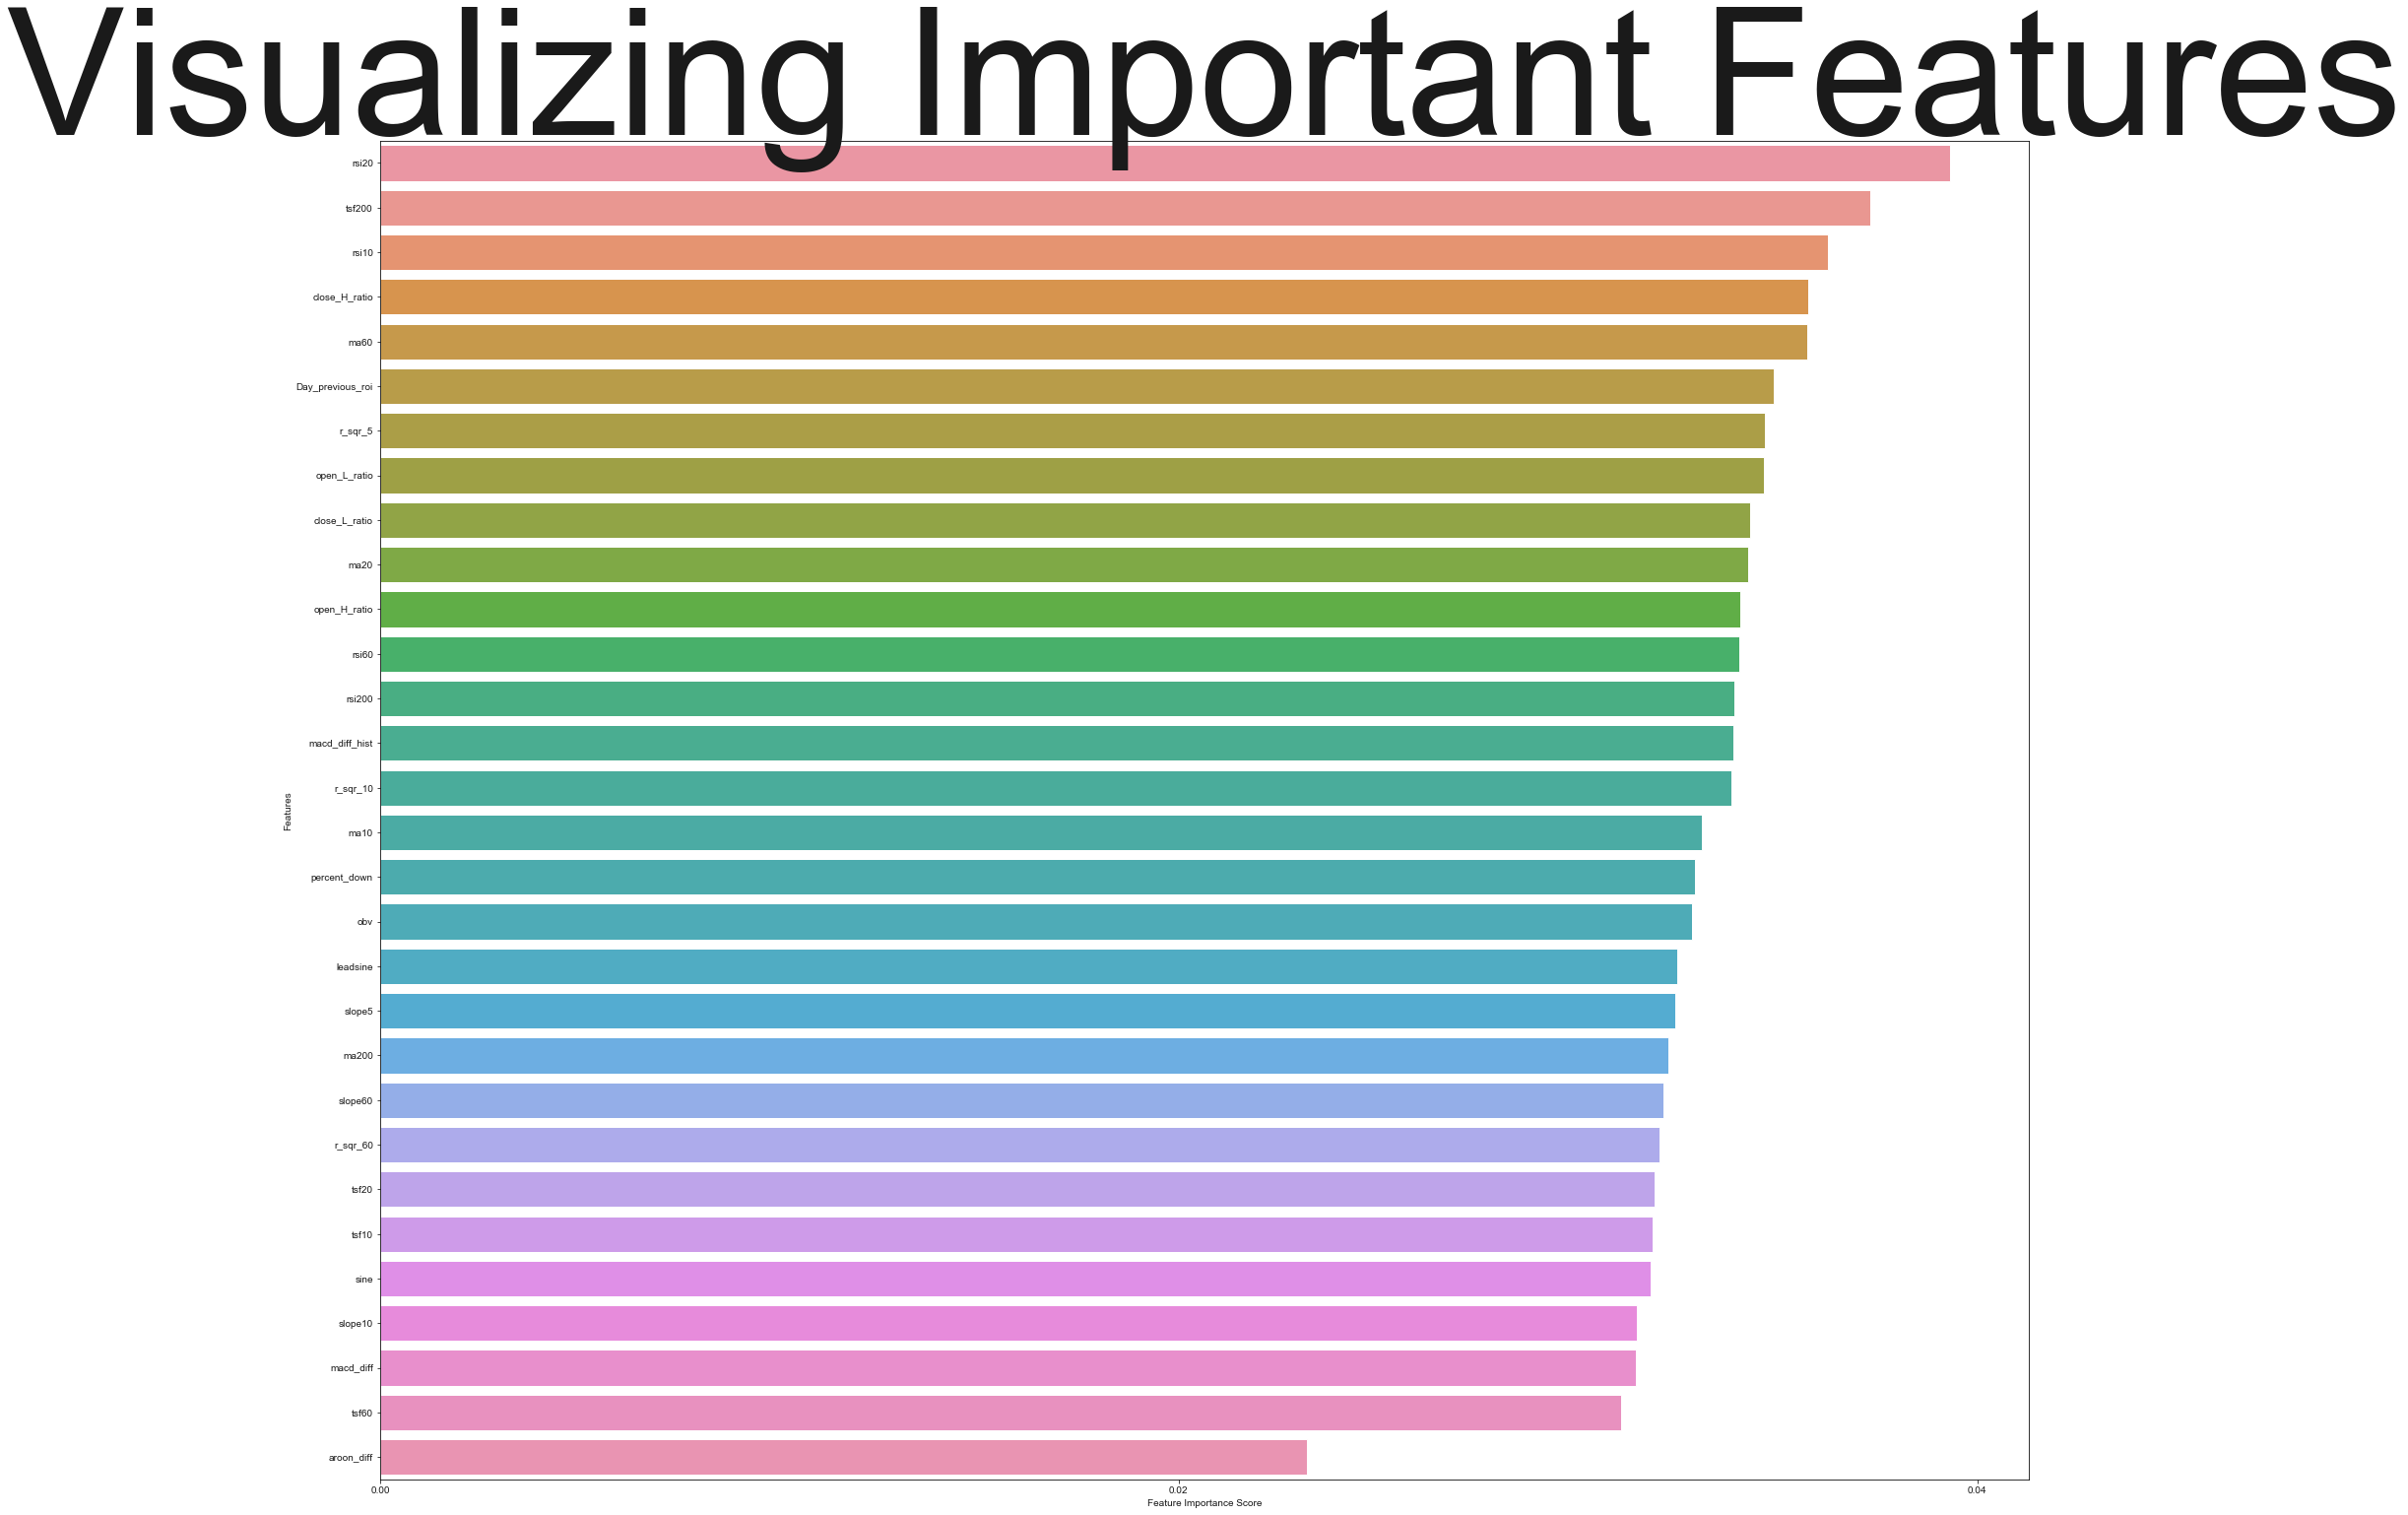

In [7]:
%matplotlib inline
# Creating a bar plot
plt.subplots(figsize=(30,25))
sns.set(font_scale=15)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph



plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [8]:
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

Accuracy: 0.3496143958868895 
Cohans Kappa: 0.1204522096608428


# Test distribution of targets

In [9]:
dist = Counter(target_test[target_name])

In [10]:
total = 0
for d in dist:
    total+=dist[d]
    #print(dist[d])
for key in dist:
    perc = str(round(100*dist[key]/total,2))+'%'
    print(key,perc )
    

bel_1.0098 28.02%
abv_1.0214 24.68%
abv_1.0098 28.53%
abv_1.0376 18.77%


In [11]:
#Set stock or dataframe
df_cln = TQQQ
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000, max_features = 4)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
feature_imp
#rf.feature_importances_    

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



rsi20               0.030898
ma60                0.030626
tsf200              0.030415
rsi10               0.029704
rsi60               0.028680
rsi200              0.028648
ma20                0.028376
macd_diff_hist      0.027652
percent_down        0.027284
ma200               0.027174
ma10                0.026996
slope60             0.026979
close_H_ratio       0.026818
Day_previous_roi    0.026561
slope10             0.026536
open_L_ratio        0.026413
tsf60               0.026321
r_sqr_5             0.026298
leadsine            0.026263
r_sqr_10            0.026172
close_L_ratio       0.026072
open_H_ratio        0.025860
obv                 0.025834
macd_diff           0.025702
slope5              0.025667
r_sqr_60            0.025514
tsf10               0.025244
sine                0.025102
tsf20               0.025060
rsi_chg10           0.021994
ma_chg20            0.021409
rsi_chg20           0.021389
ma_chg10            0.020960
ma_chg60            0.020900
ma_chg200     

In [12]:
# prediction on test set
target_pred=rf2.predict(feature_test)
target_pred2=rf2.predict(feature_train)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred),'\n'
      'Train ACC:', metrics.accuracy_score(target_train, target_pred2))

Accuracy: 0.35475578406169667 
Cohans Kappa: 0.1268589313659736 
Train ACC: 1.0


In [13]:
dist= Counter(target_test[target_name])
total = 0
for d in dist:
    total+=dist[d]
    #print(dist[d])
for key in dist:
    perc = str(round(100*dist[key]/total,2))+'%'
    print(key,perc )
    

bel_1.0098 28.02%
abv_1.0214 24.68%
abv_1.0098 28.53%
abv_1.0376 18.77%


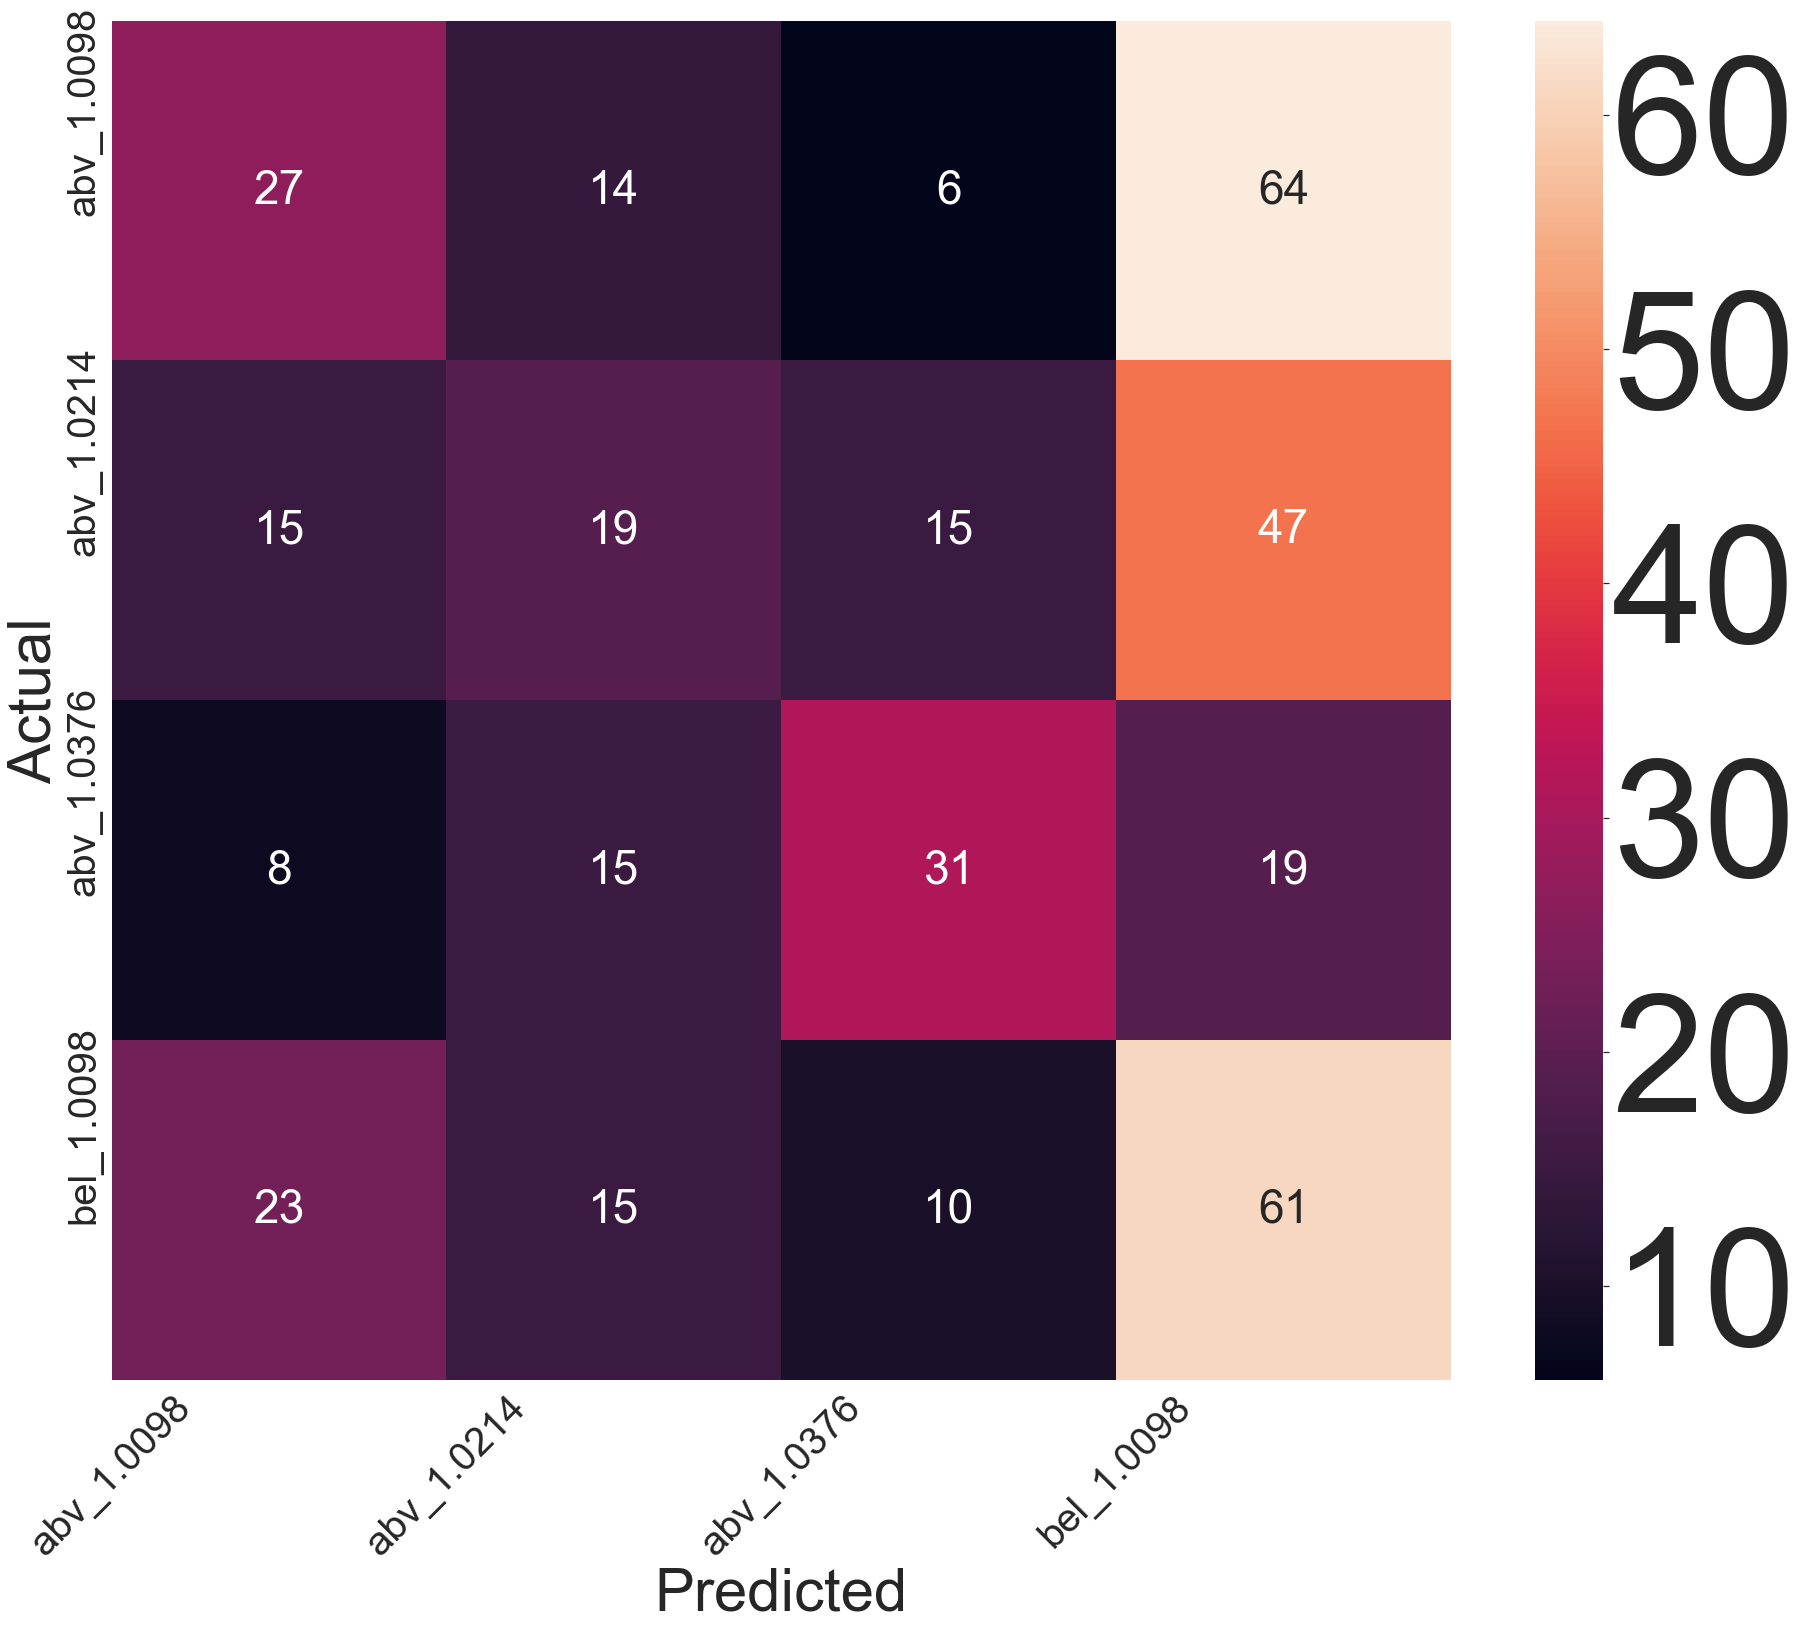

In [14]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [15]:
#Set stock or dataframe
df_cln = NVDA
stop = round(.80*len(df_cln))


#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                           n_jobs=-1)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
#rf.feature_importances_ 
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?


print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.29947089947089944 
Cohans Kappa: 0.03592975859332259


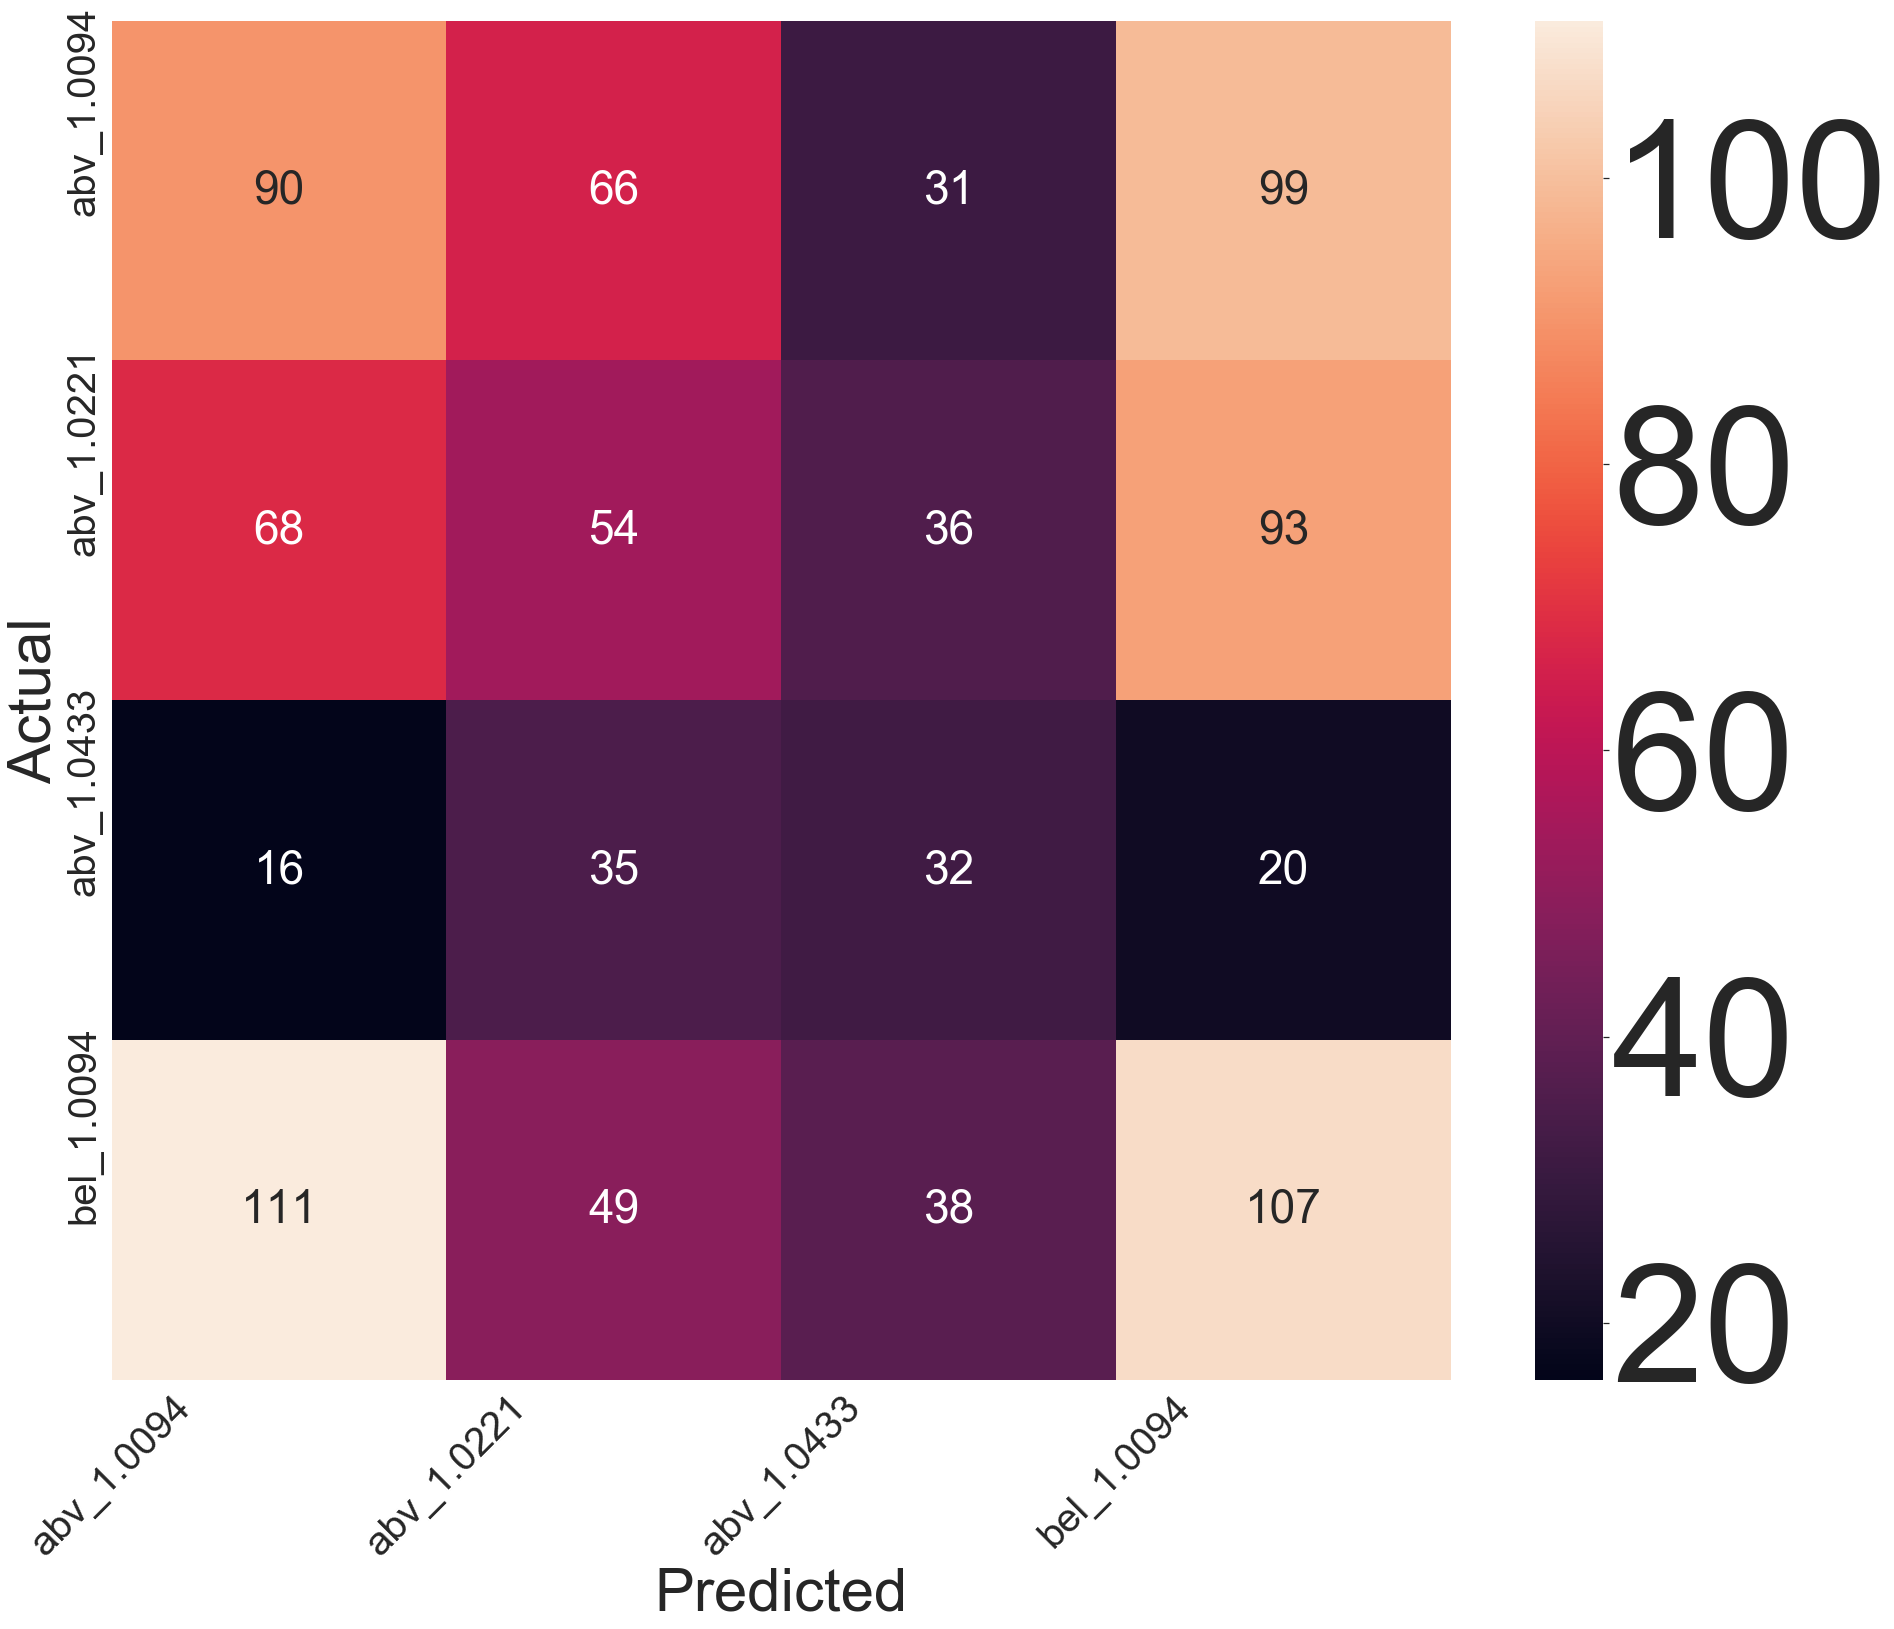

In [16]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [17]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0094 61.05%
abv_1.0221 75.98%
abv_1.0433 72.26%
bel_1.0094 66.46%


In [18]:
#Set stock or dataframe
df_cln = AMZN
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                           n_jobs=-1)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
#rf.feature_importances_ 
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?


print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.3786407766990291 
Cohans Kappa: 0.0501605159564964


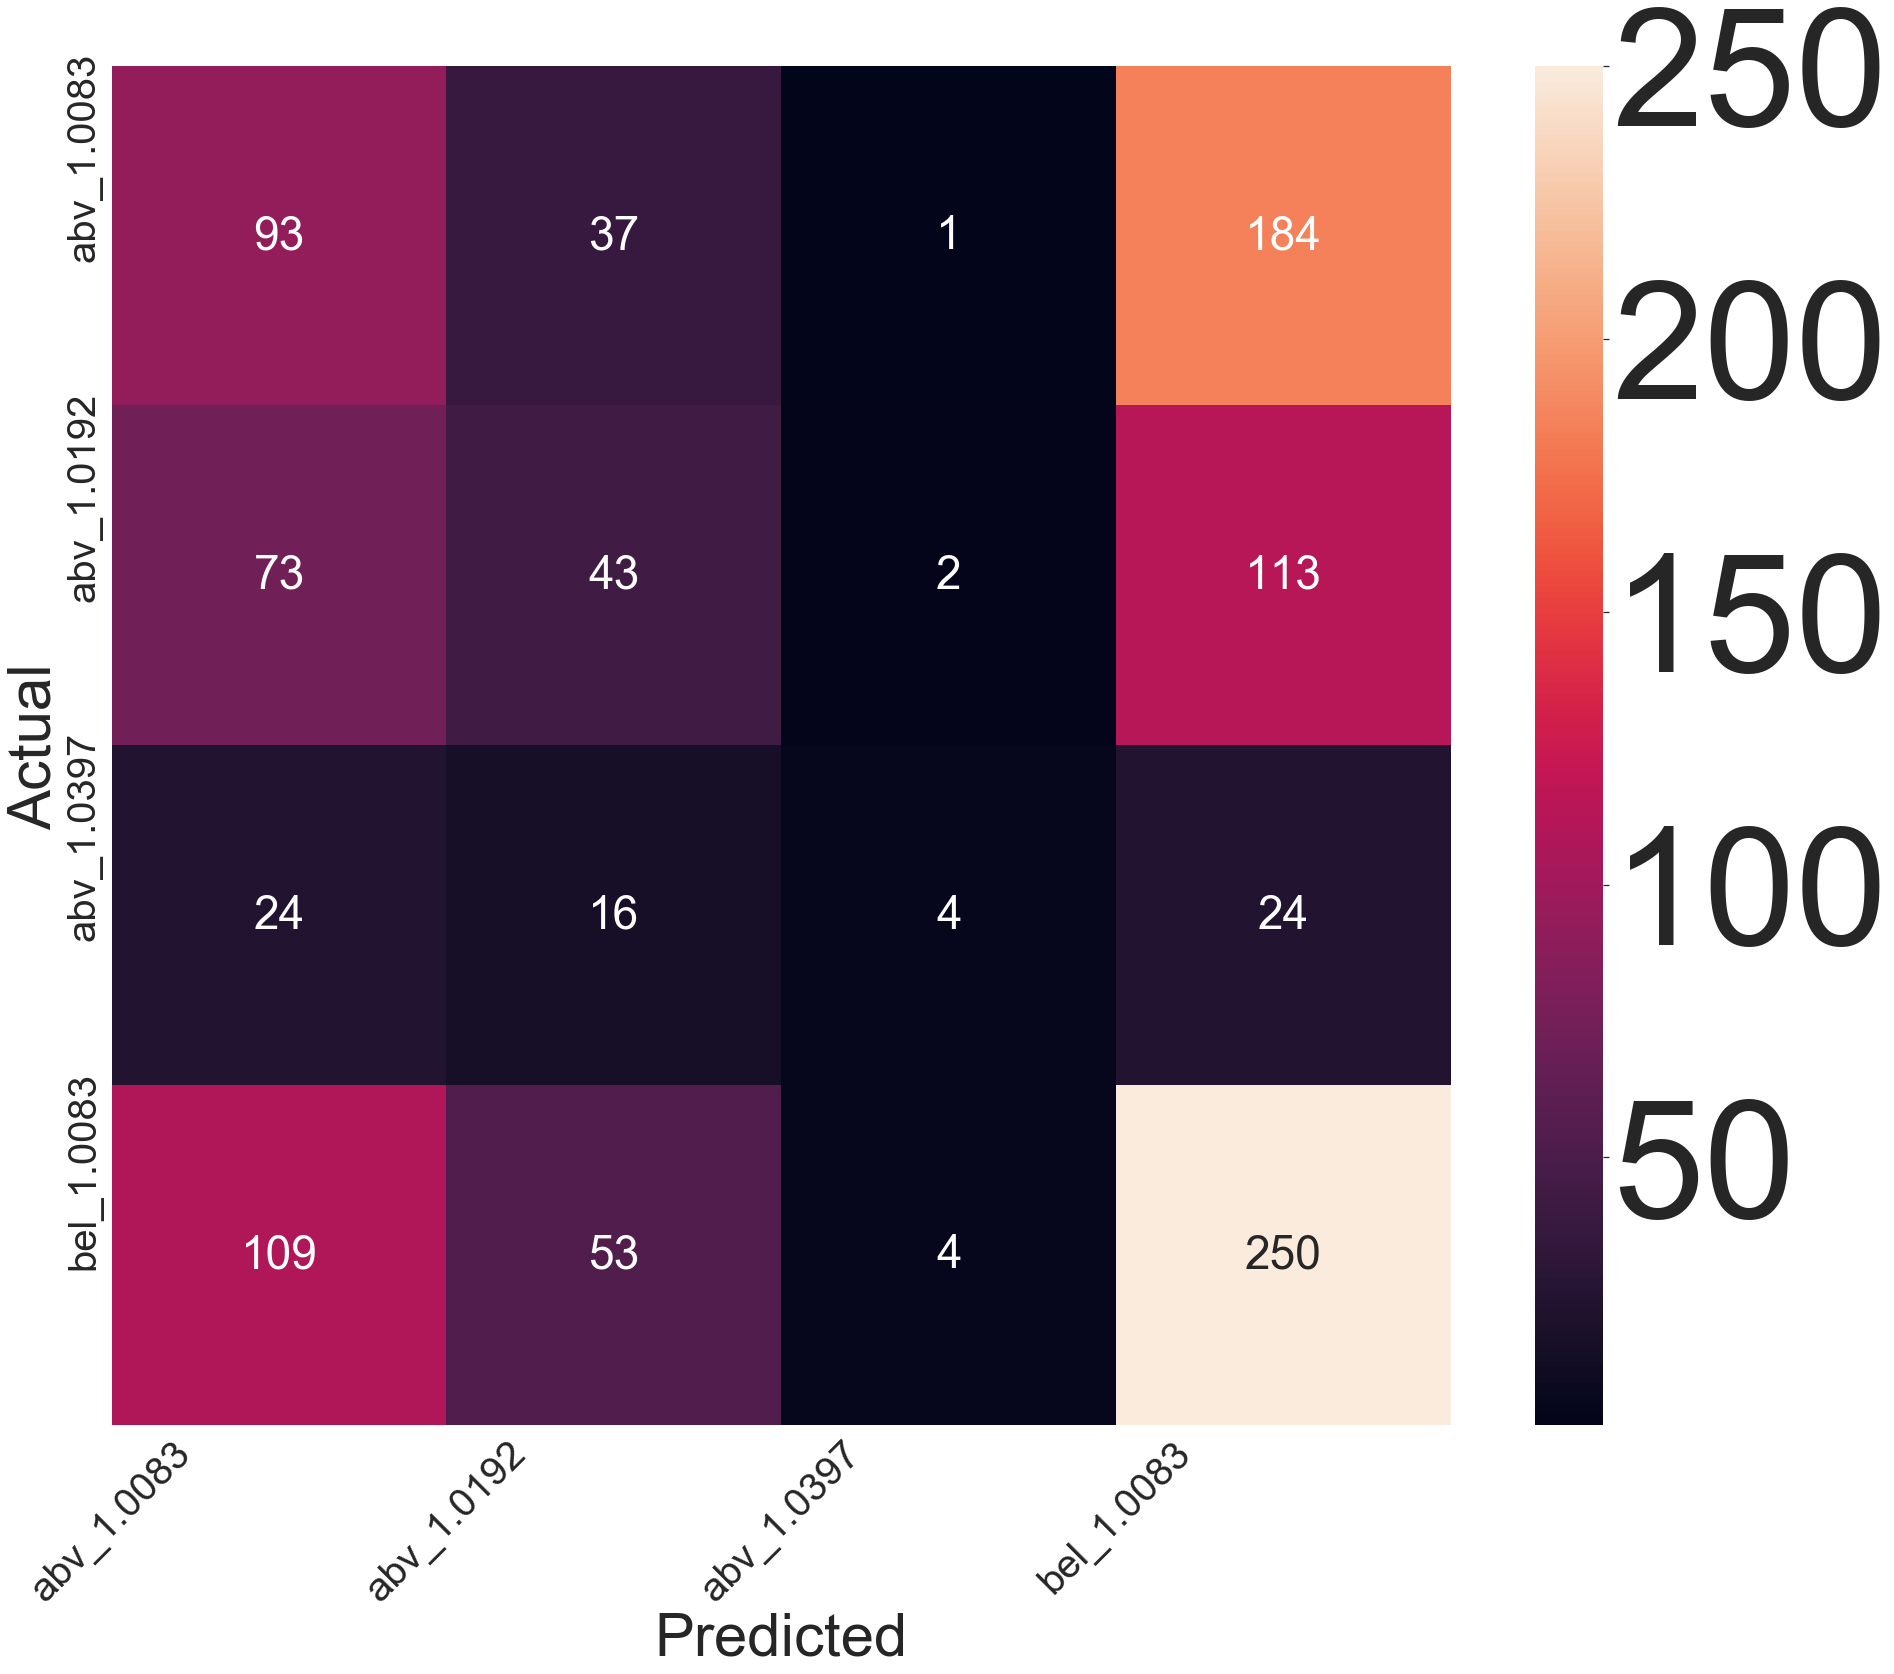

In [19]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [20]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0083 63.55%
abv_1.0192 64.43%
abv_1.0397 63.64%
bel_1.0083 56.22%


In [21]:
df_cln = TQQQ
stop = round(.80*len(df_cln))
#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            n_jobs=-1)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:17: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.3444730077120823 
Cohans Kappa: 0.11261104103486219


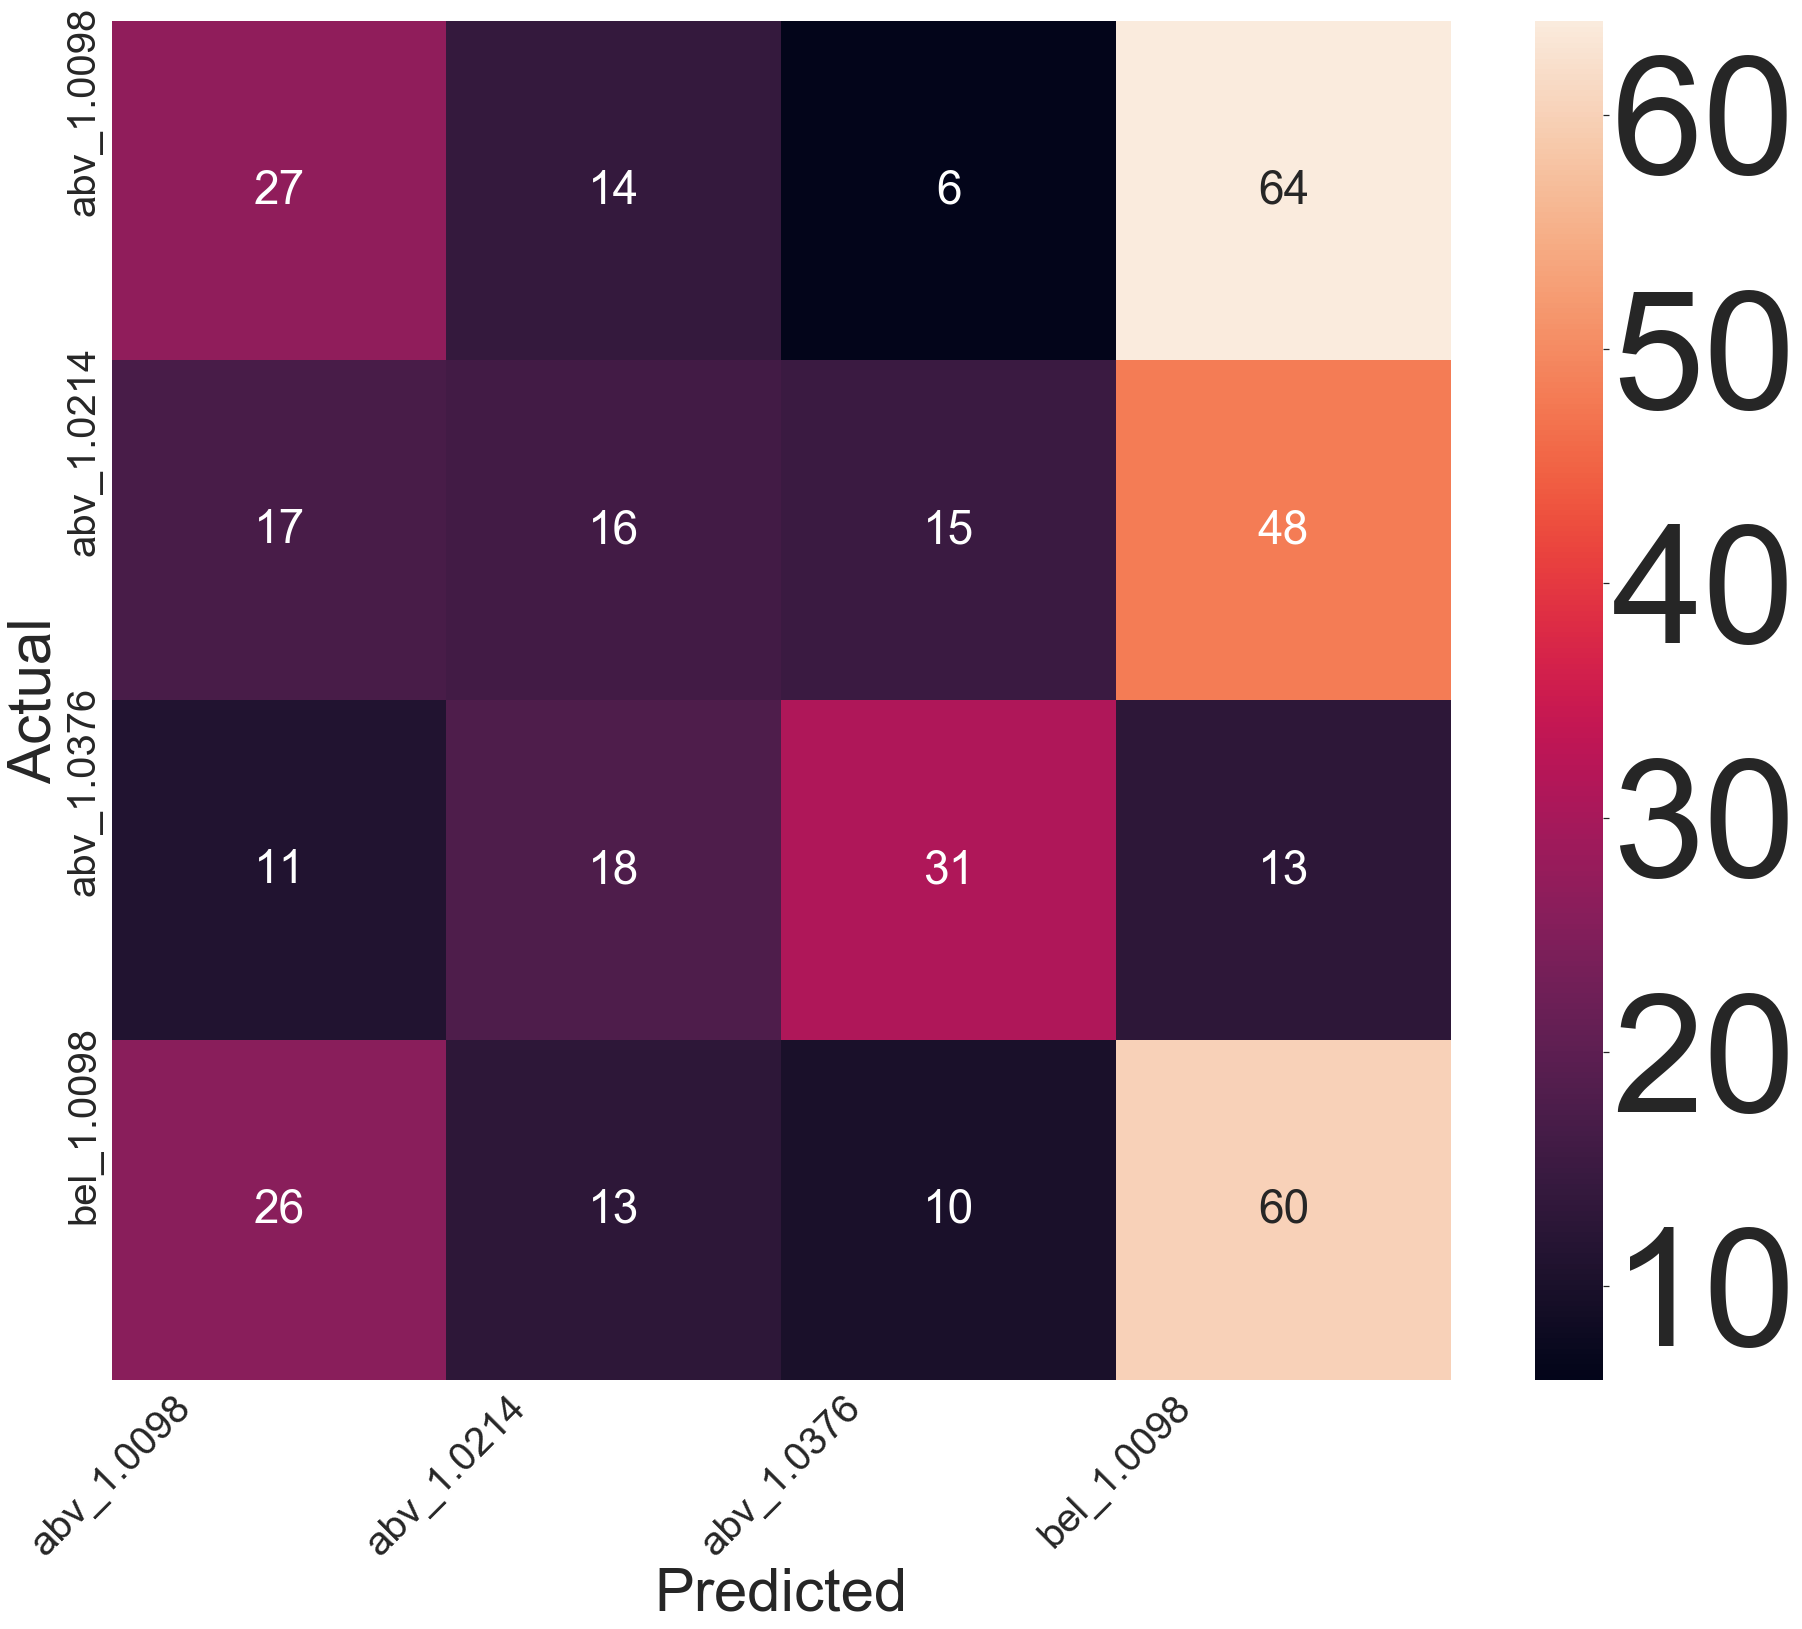

In [22]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [23]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0098 67.9%
abv_1.0214 78.69%
abv_1.0376 83.87%
bel_1.0098 67.57%


In [24]:
df_cln = SOXL
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            max_features=5)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.2779220779220779 
Cohans Kappa: 0.040571551507762926


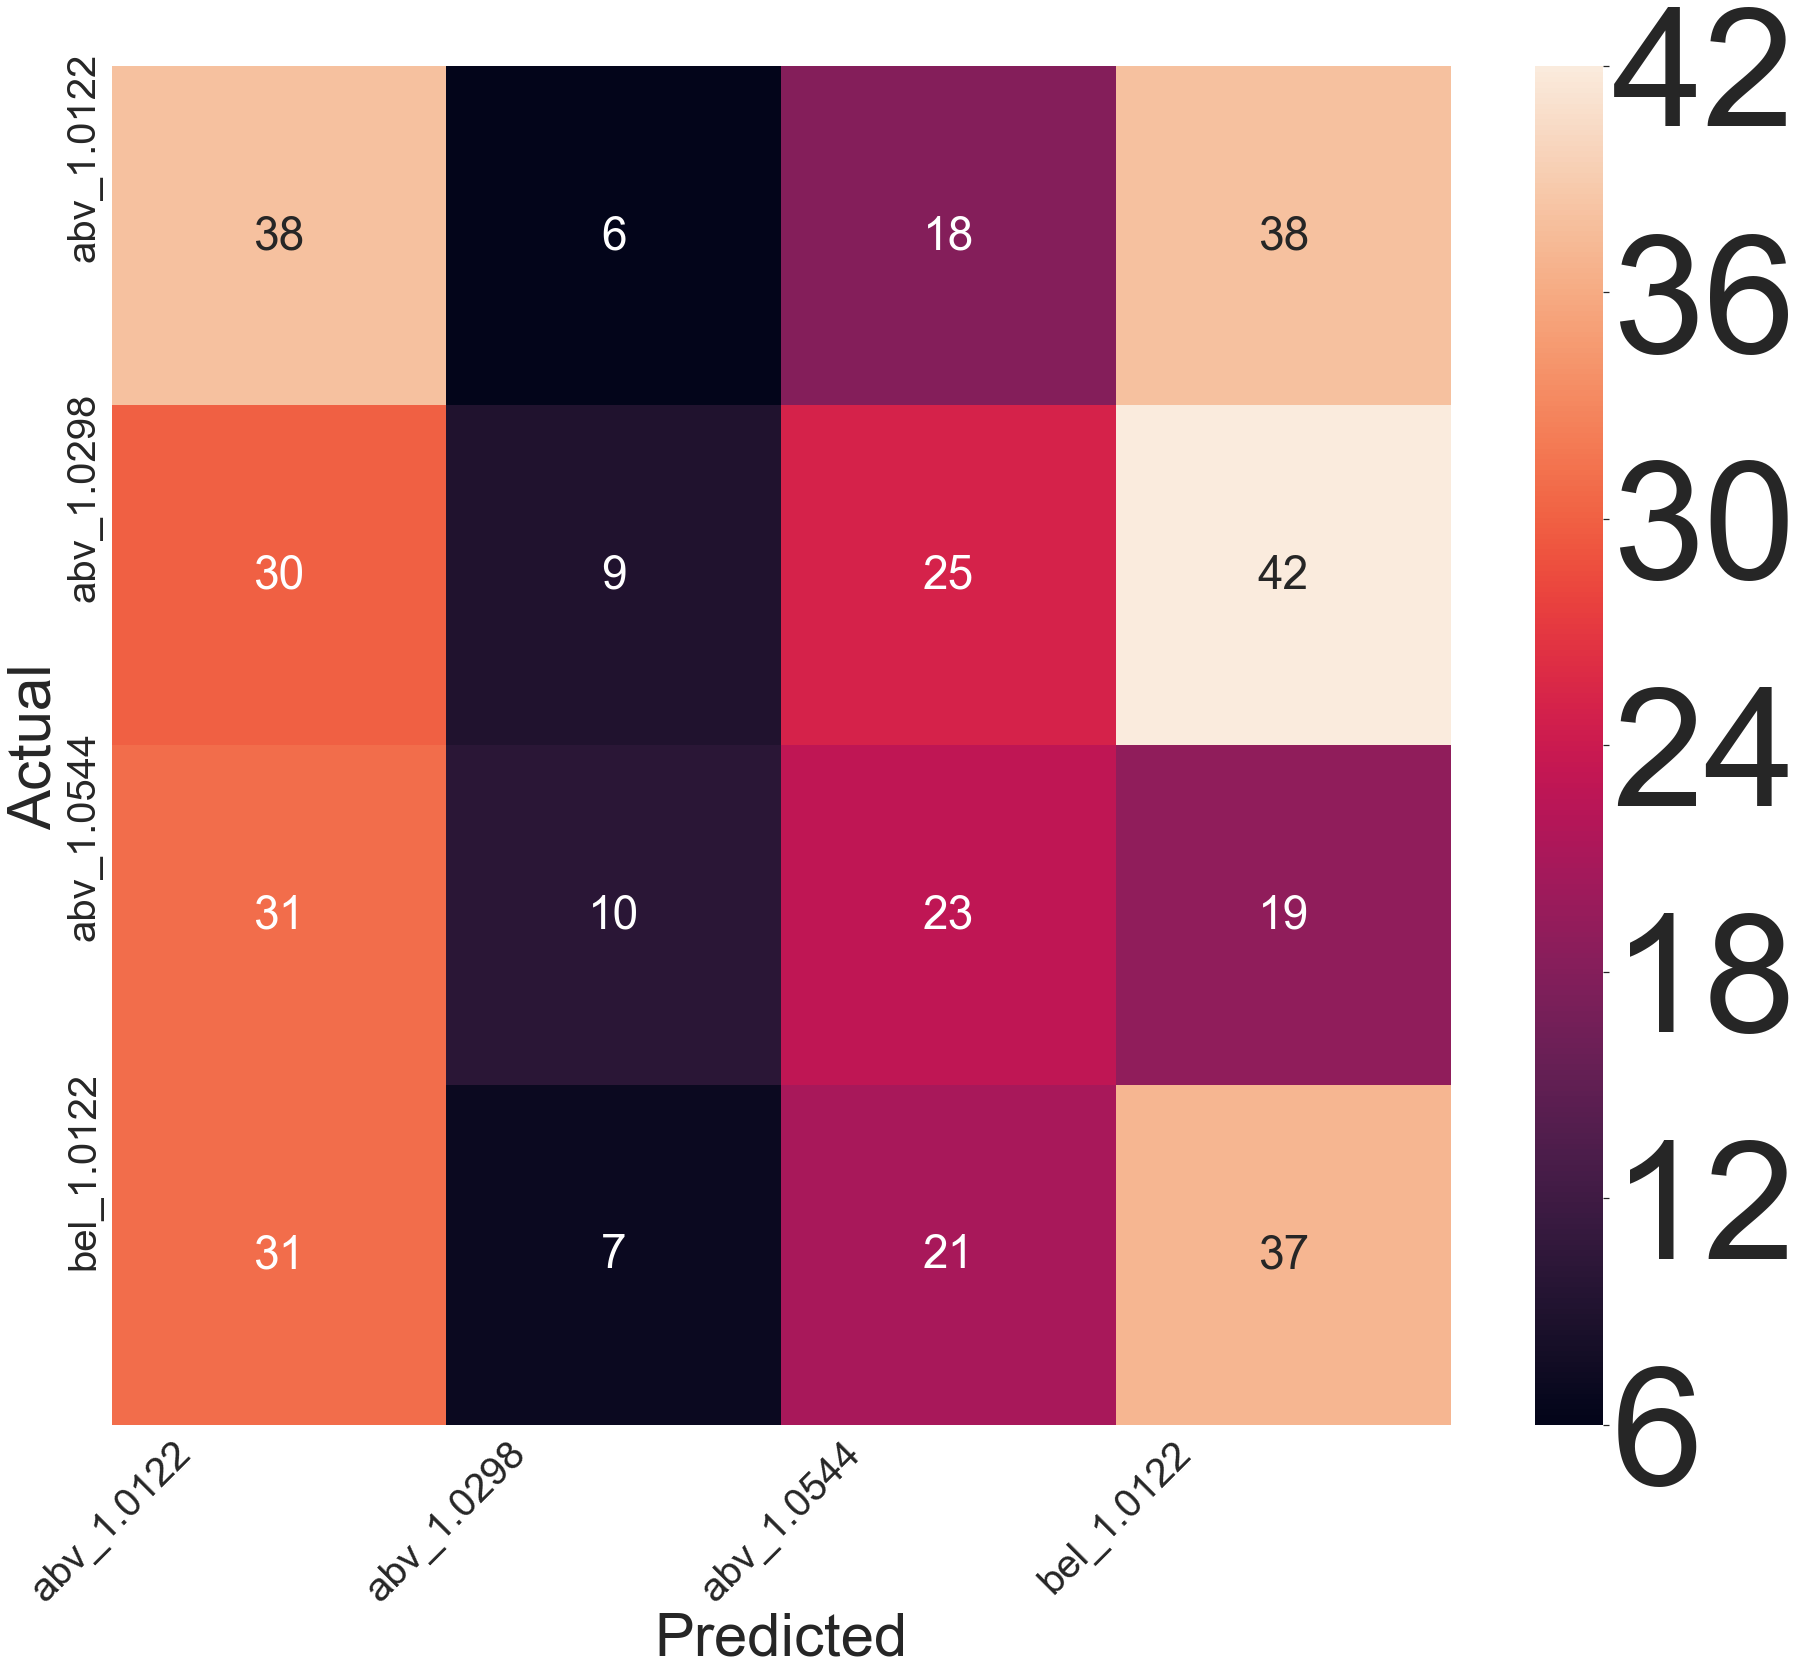

In [25]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [26]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0122 76.15%
abv_1.0298 78.12%
abv_1.0544 75.86%
bel_1.0122 72.79%


In [27]:
df_cln = Nasdaq
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            max_features=5)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.3438781487990627 
Cohans Kappa: 0.08430159460765596


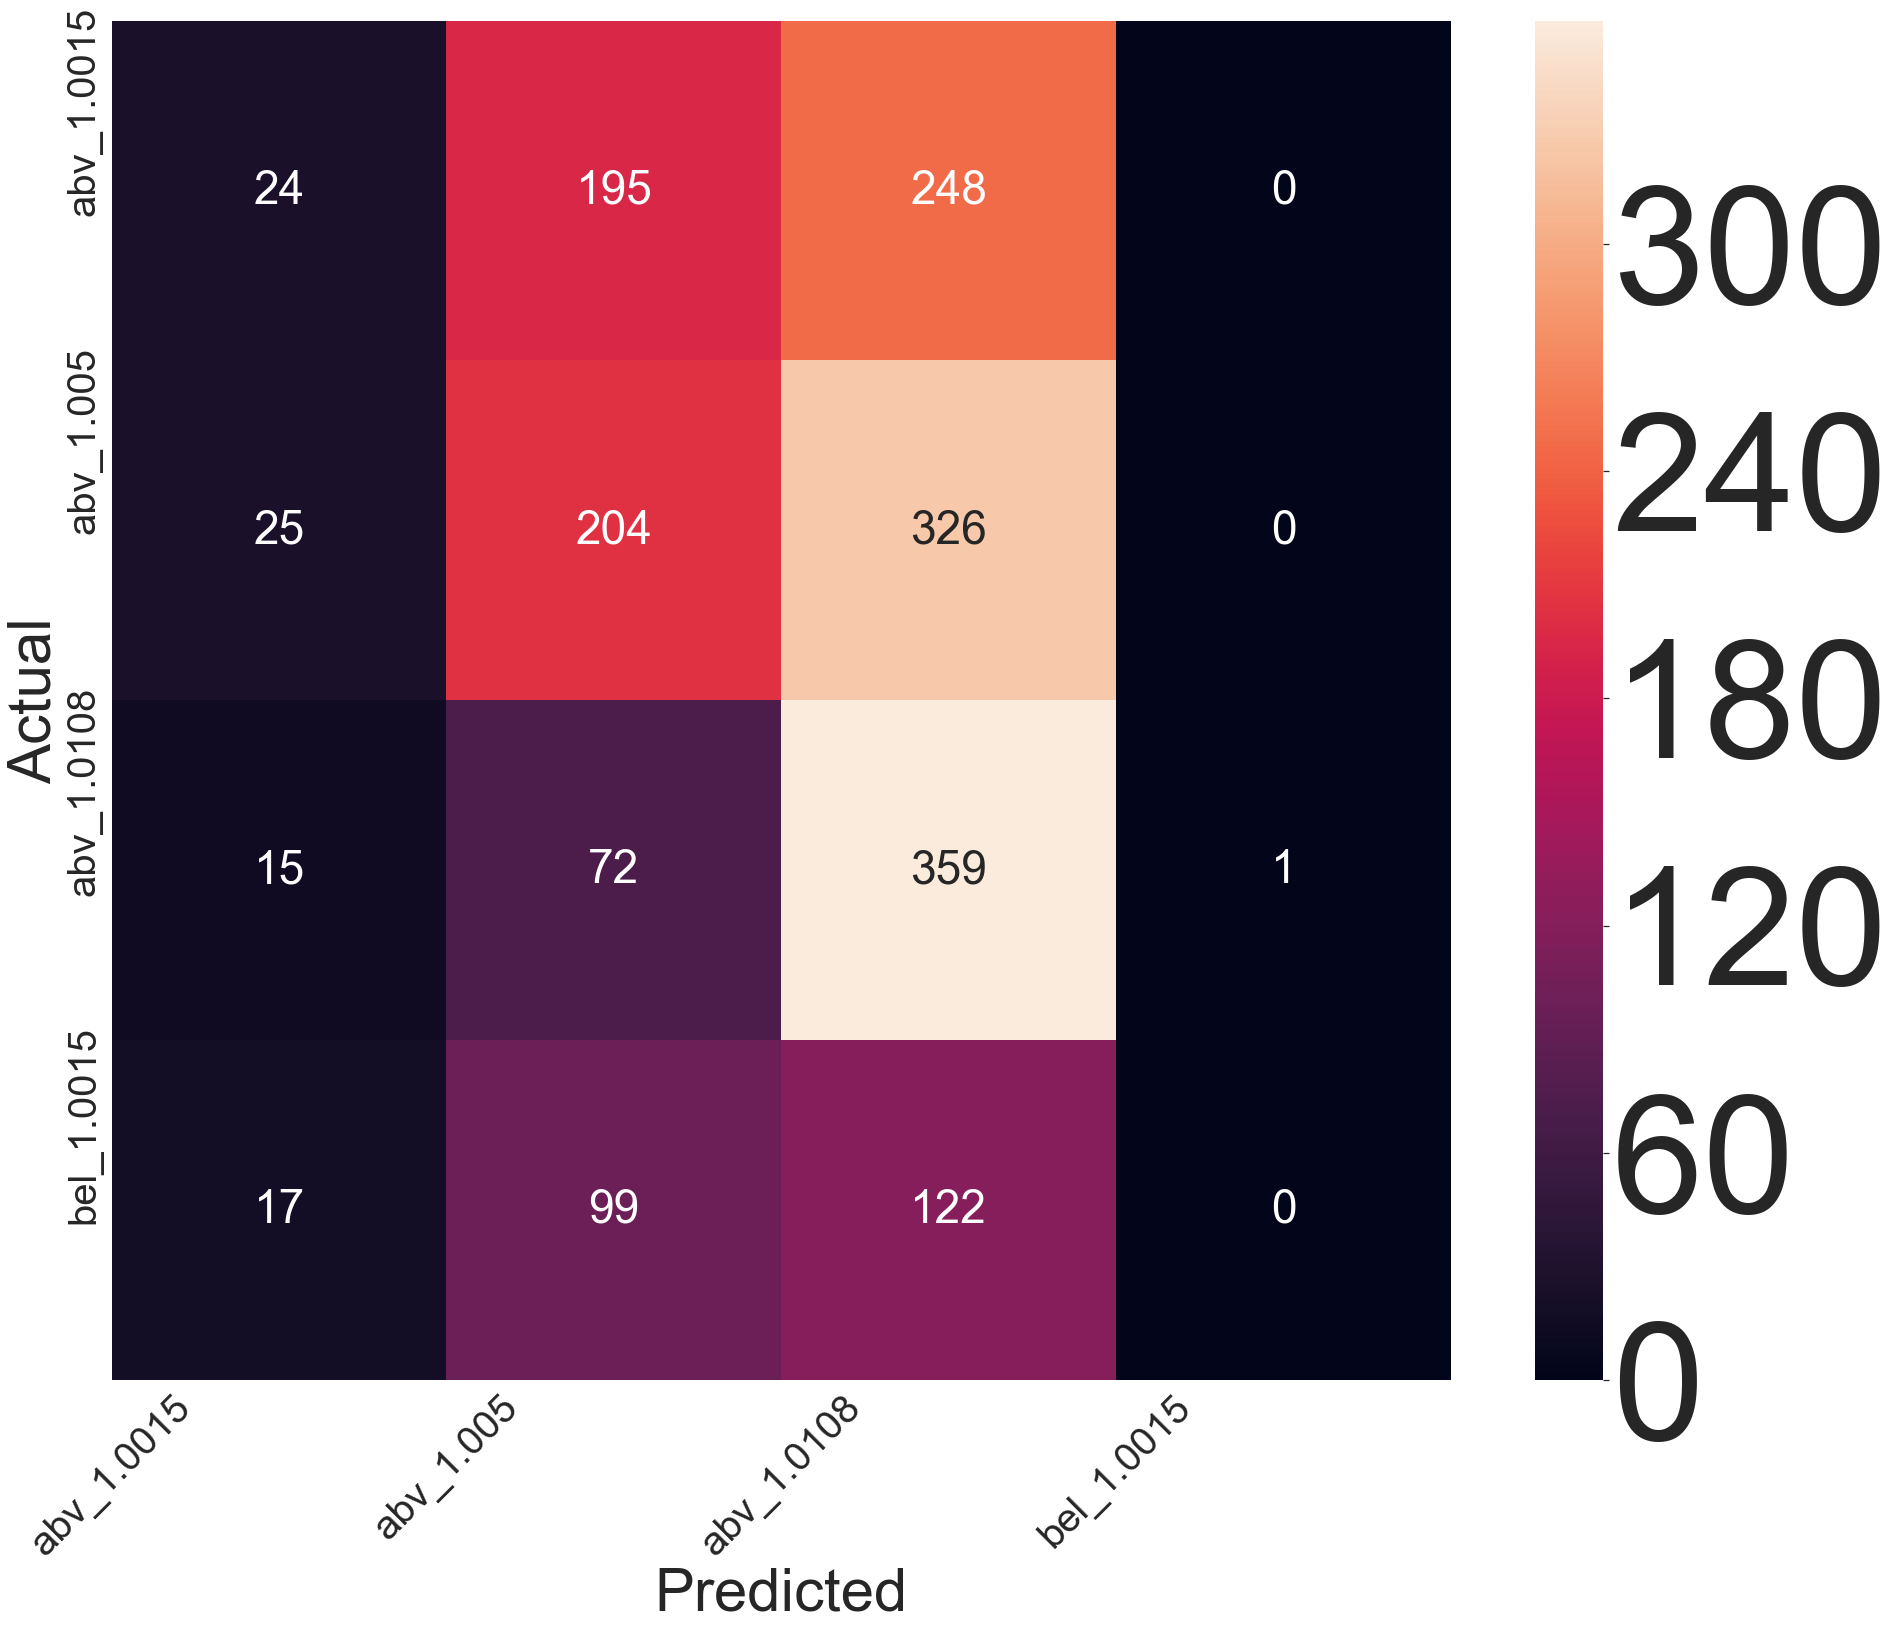

In [28]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [29]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0015 79.01%
abv_1.005 82.63%
abv_1.0108 88.44%
bel_1.0015 100.0%


In [30]:
df_cln = AMD
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            max_features=5)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.2608008429926238 
Cohans Kappa: 0.03304236300010632


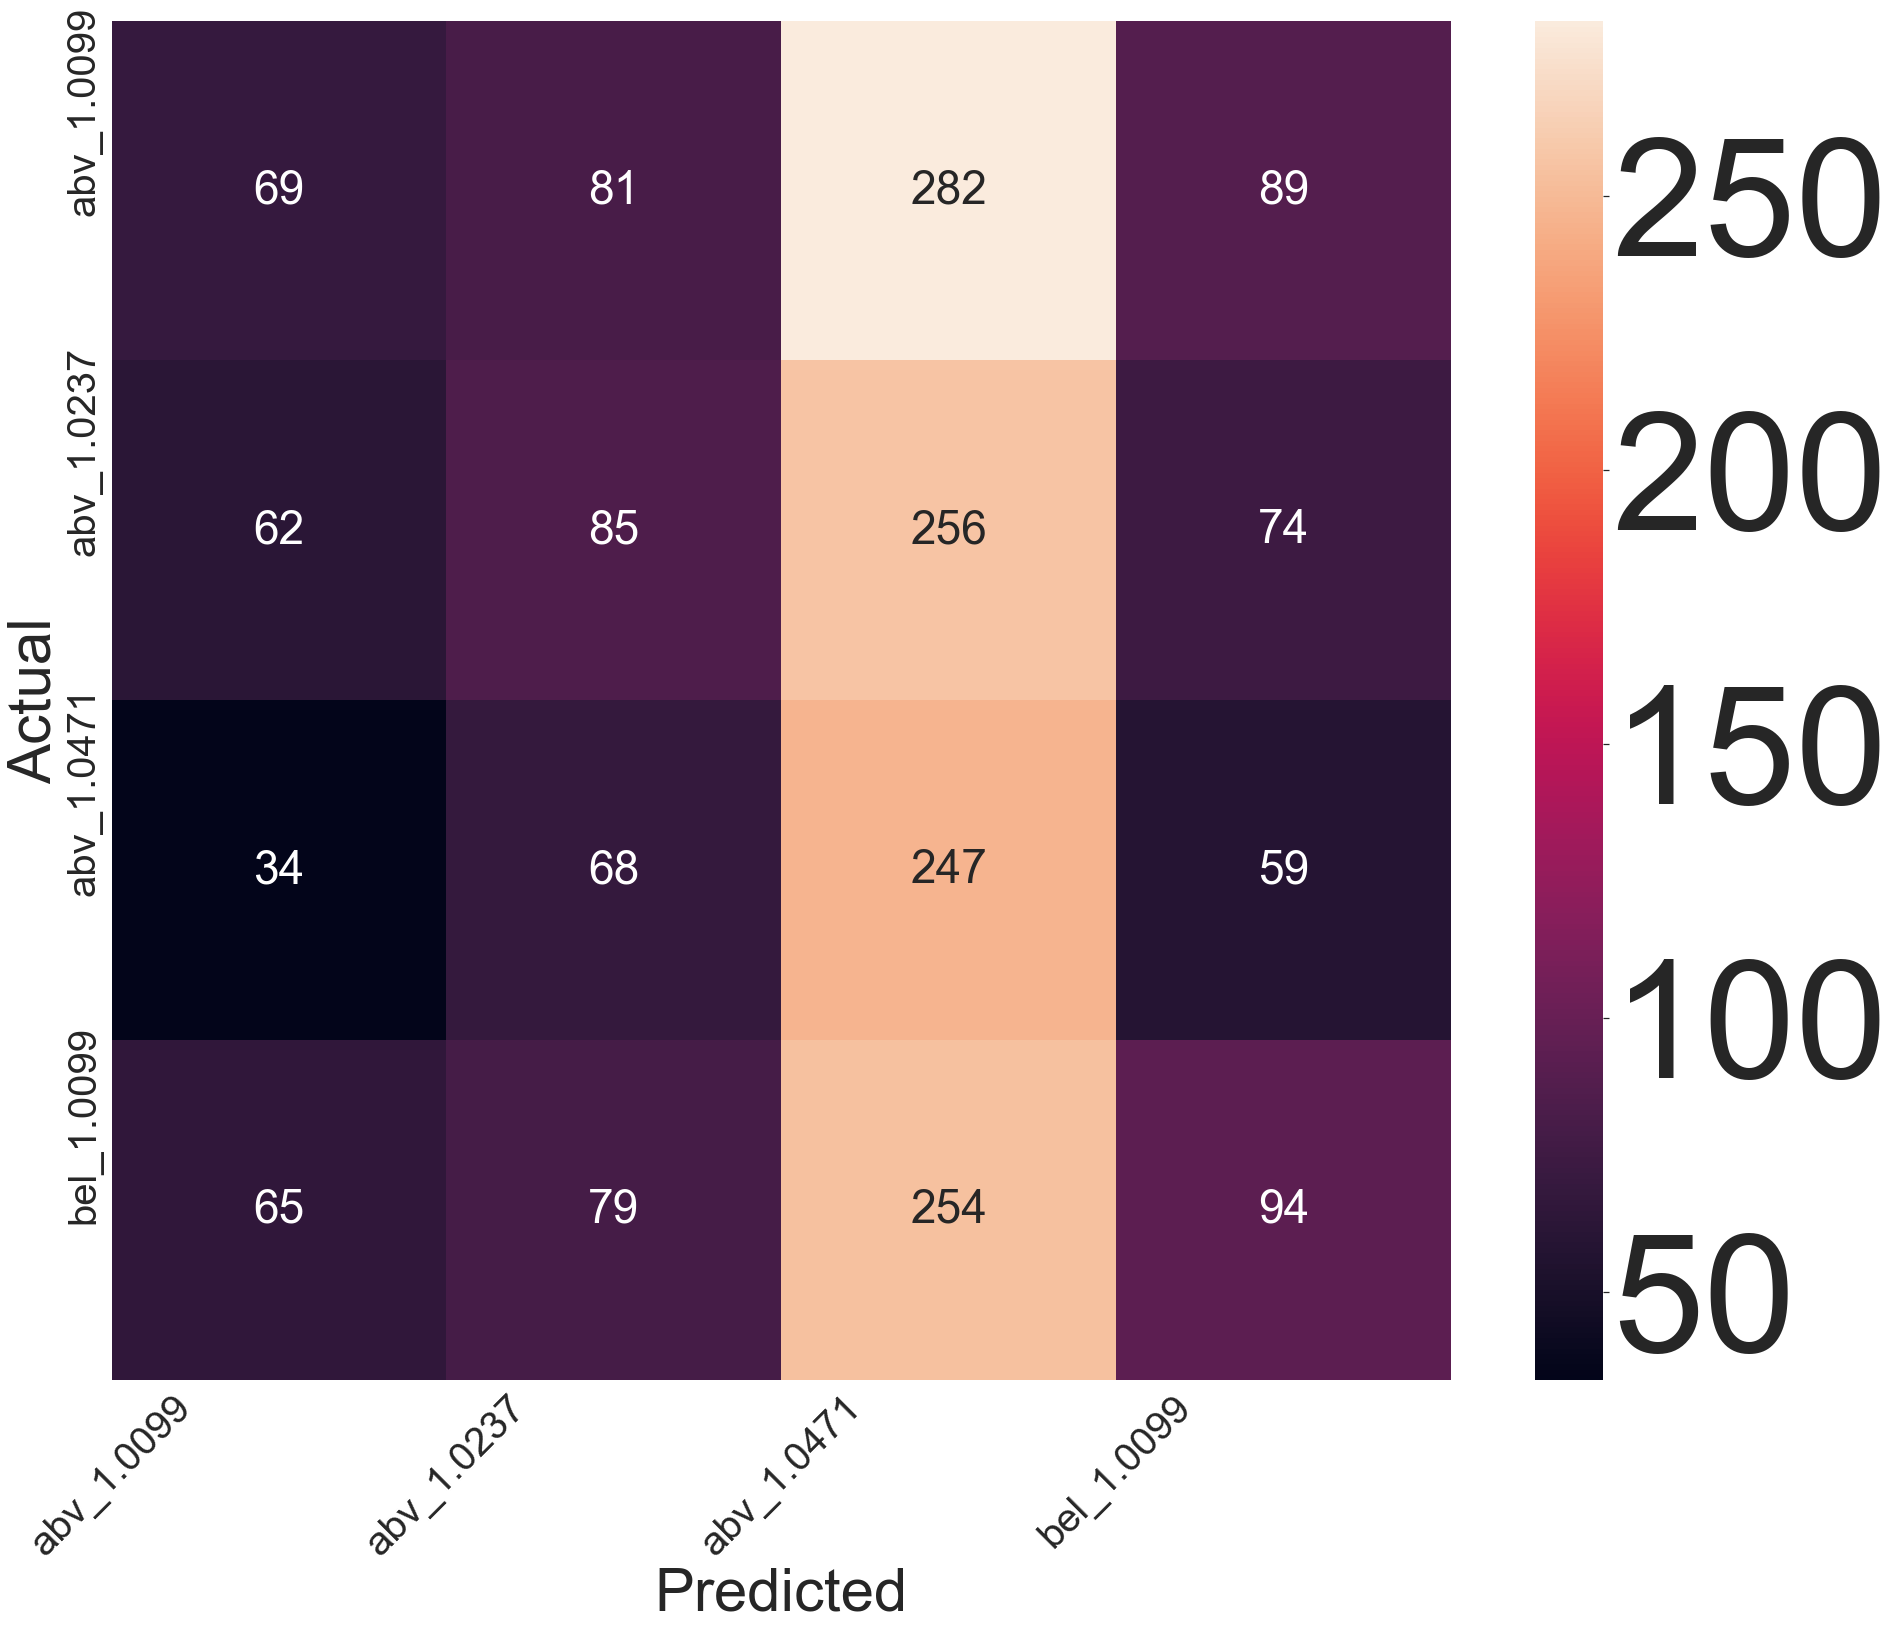

In [31]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [32]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0099 71.74%
abv_1.0237 74.76%
abv_1.0471 75.55%
bel_1.0099 70.25%


In [33]:
df_cln = F
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            max_features=10)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



percent_down        0.031081
r_sqr_5             0.030229
r_sqr_10            0.029997
Day_previous_roi    0.029619
tsf20               0.029535
r_sqr_60            0.029463
close_H_ratio       0.029447
obv                 0.028835
close_L_ratio       0.028708
leadsine            0.028587
open_L_ratio        0.028461
tsf200              0.028253
ma200               0.028245
slope60             0.028155
slope5              0.028080
sine                0.028056
open_H_ratio        0.027795
tsf10               0.027700
rsi200              0.027243
tsf60               0.027064
macd_diff_hist      0.026395
slope10             0.026300
ma10                0.026165
macd_diff           0.026091
ma60                0.024866
ma20                0.024144
rsi60               0.024070
rsi10               0.023228
rsi20               0.022394
ma_chg10            0.021569
ma_chg20            0.020389
rsi_chg10           0.020139
ma_chg60            0.019825
aroon_diff          0.019747
ma_chg200     

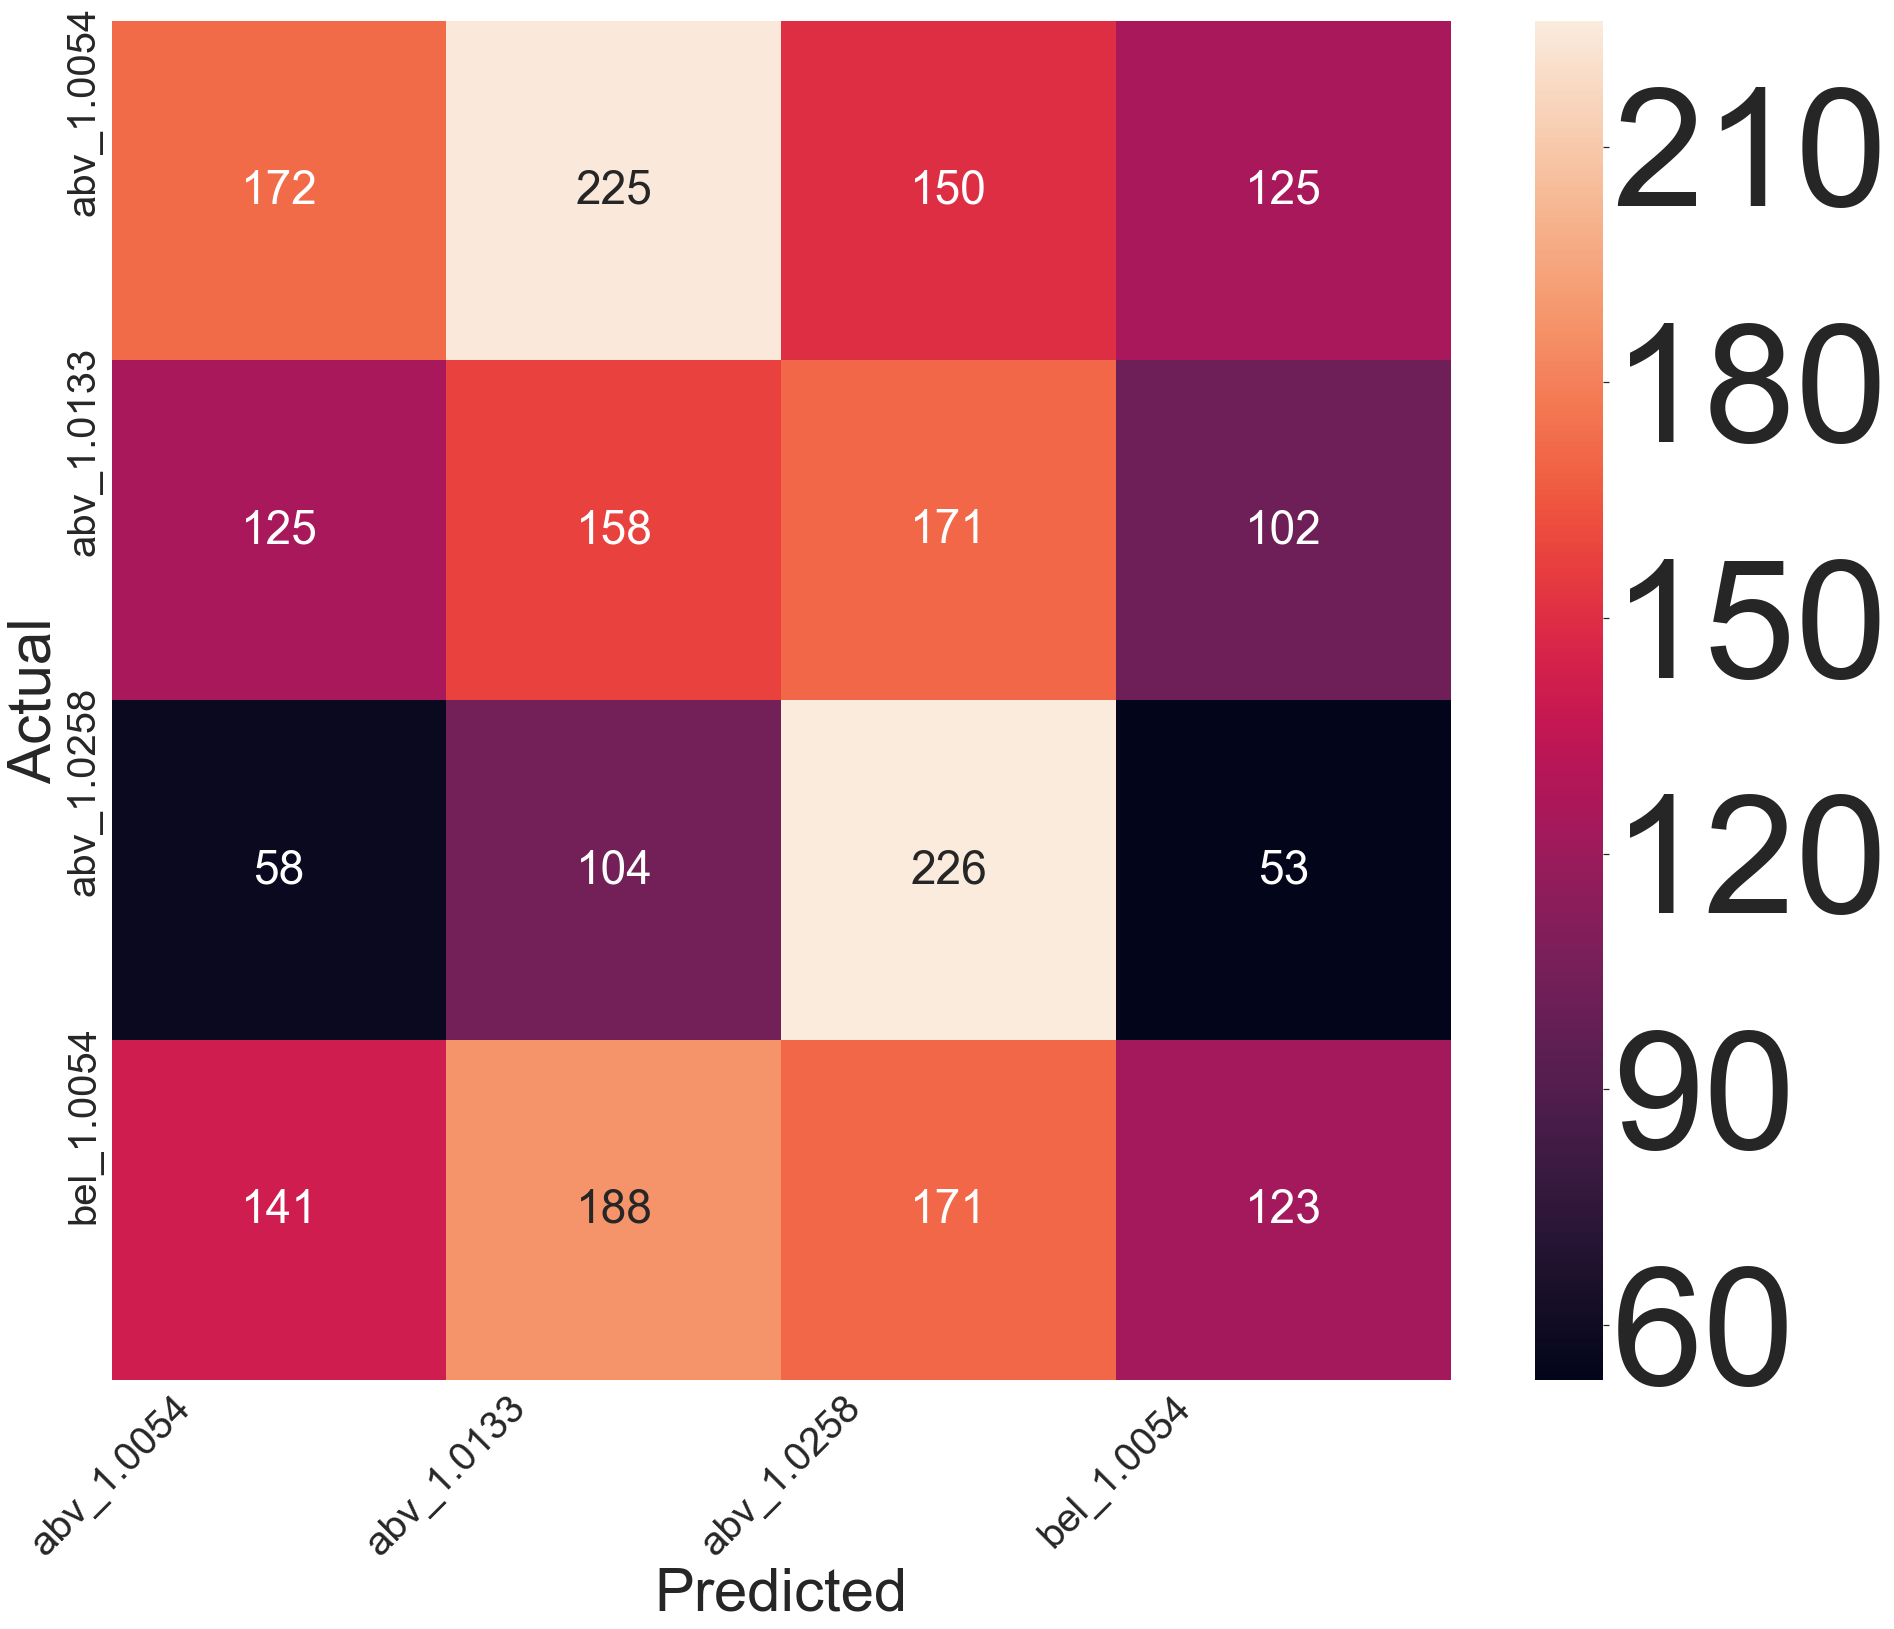

In [34]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [35]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0054 71.57%
abv_1.0133 72.15%
abv_1.0258 76.18%
bel_1.0054 69.48%


In [36]:
df_cln = WTW
stop = round(.80*len(df_cln))
#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.31592039800995025 
Cohans Kappa: 0.017774243561778813


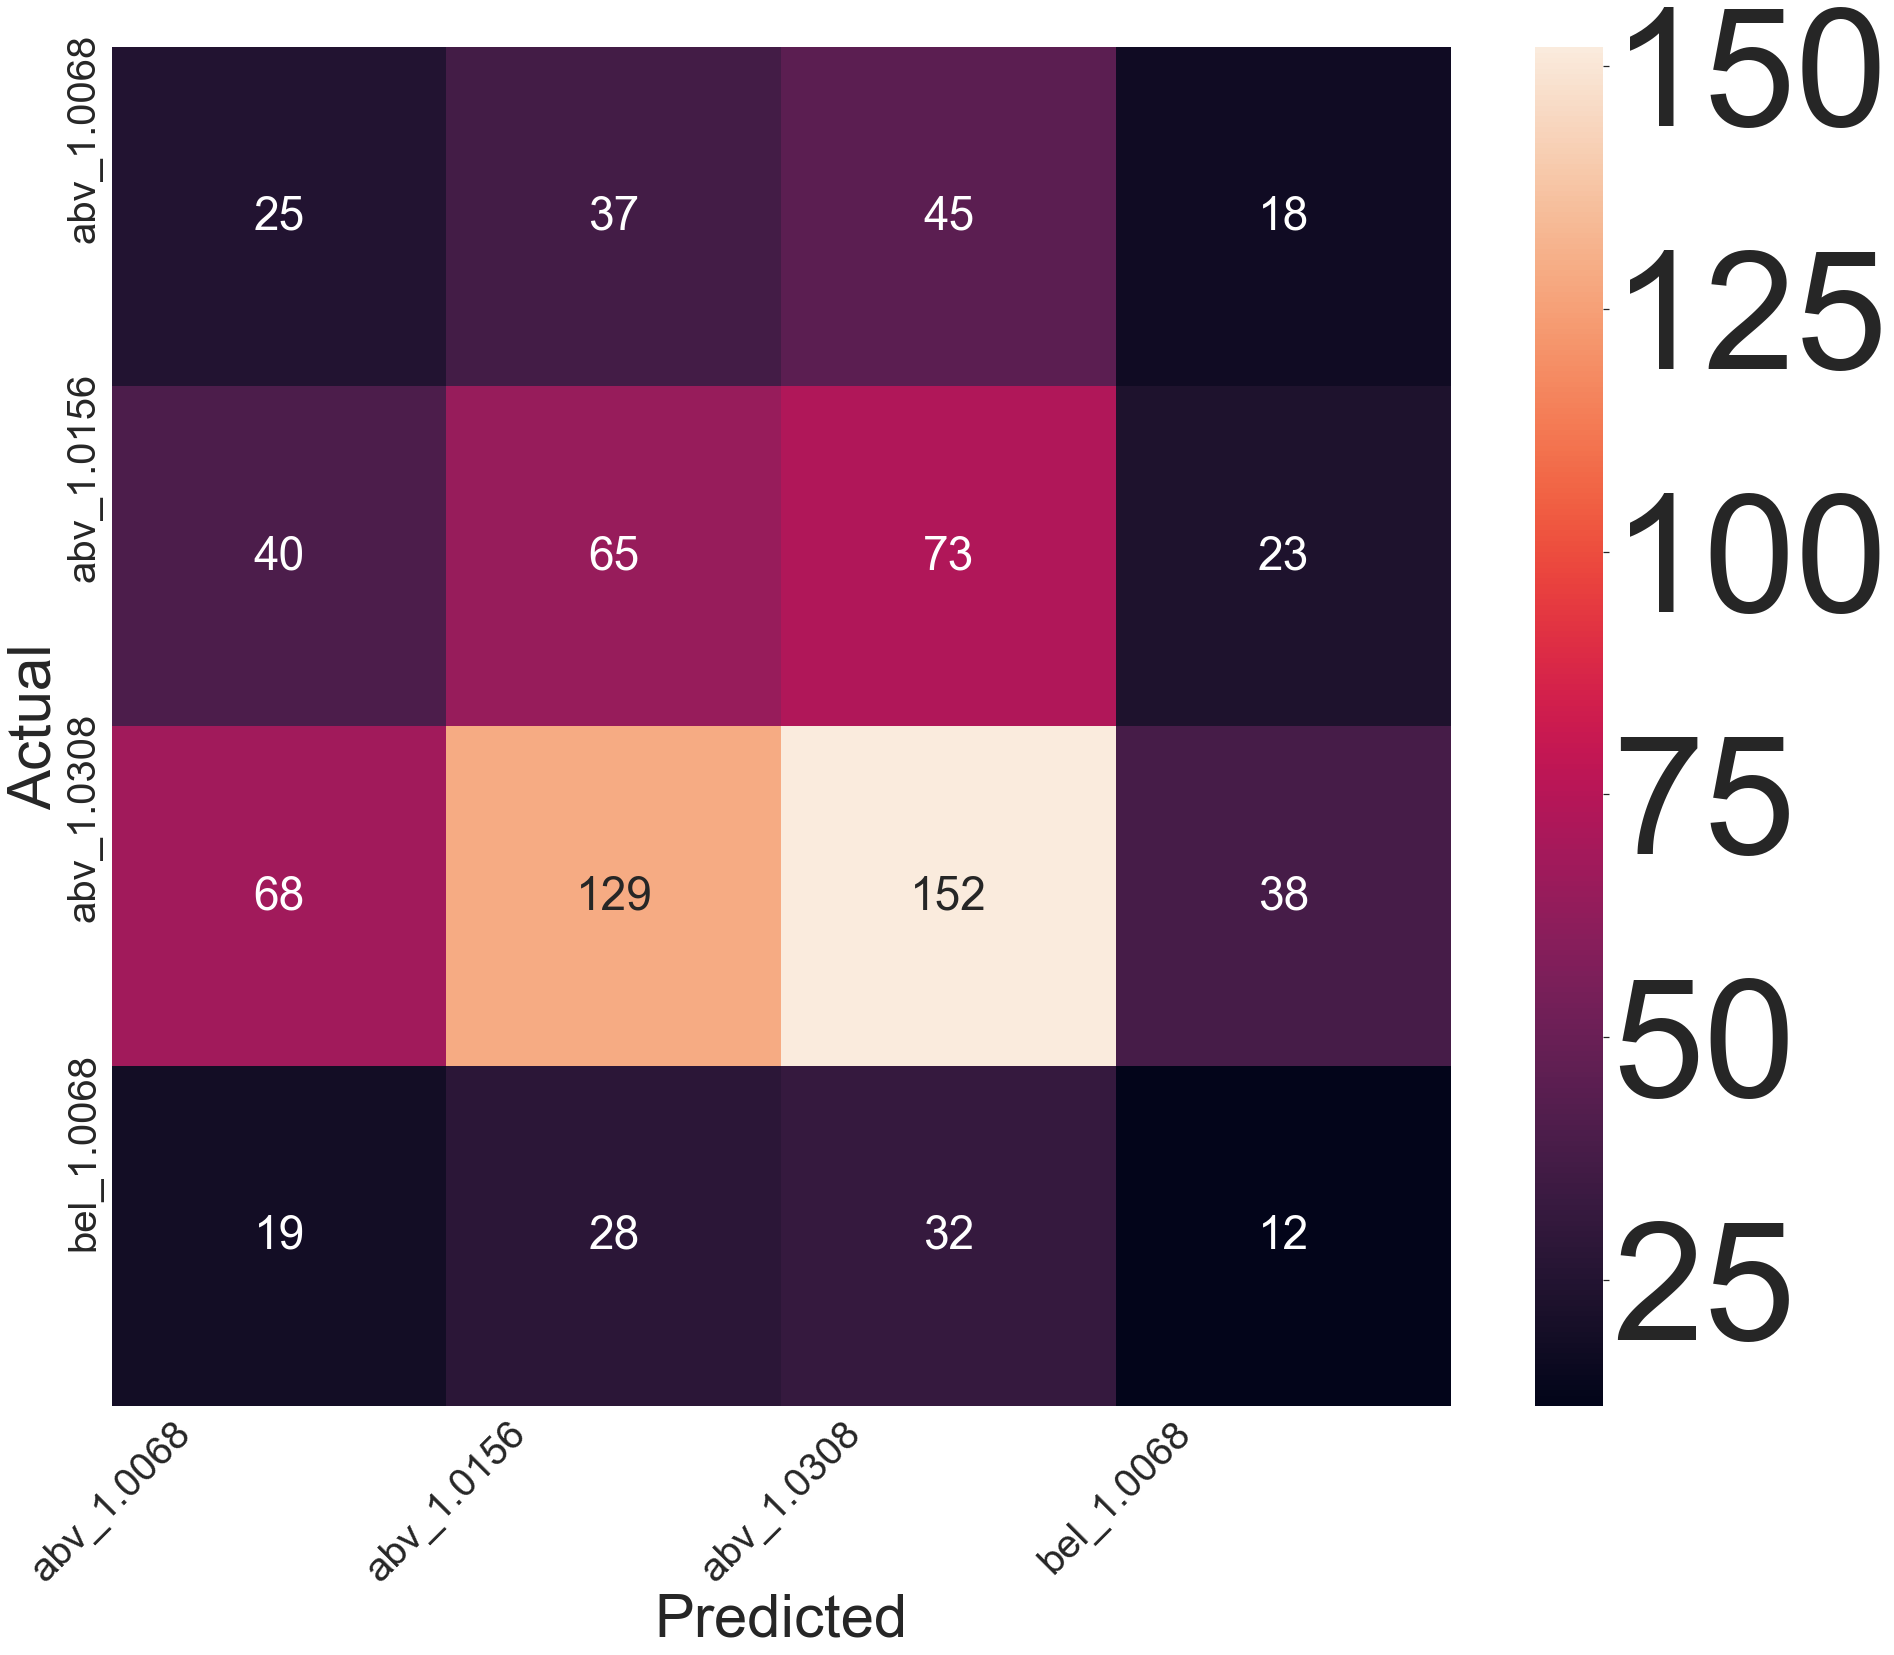

In [37]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [38]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0068 87.5%
abv_1.0156 89.19%
abv_1.0308 89.4%
bel_1.0068 86.81%


In [39]:
df_cln = HNGR
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            max_features=5)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



close_H_ratio       0.035284
close_L_ratio       0.033504
r_sqr_5             0.031943
percent_down        0.030110
open_H_ratio        0.029721
ma200               0.029186
r_sqr_60            0.028949
r_sqr_10            0.028669
tsf200              0.028618
sine                0.028310
leadsine            0.027490
tsf20               0.027441
tsf60               0.026755
slope60             0.026237
rsi200              0.026094
ma_chg200           0.025950
open_L_ratio        0.025879
macd_diff           0.025792
ma60                0.025701
macd_diff_hist      0.025439
rsi60               0.025246
tsf10               0.025096
ma_chg60            0.024824
ma20                0.024352
slope10             0.024333
ma_chg20            0.024187
Day_previous_roi    0.024181
rsi10               0.024133
ma10                0.024004
obv                 0.023510
rsi20               0.023304
slope5              0.023149
ma_chg10            0.023143
aroon_diff          0.020511
rsi_chg10     

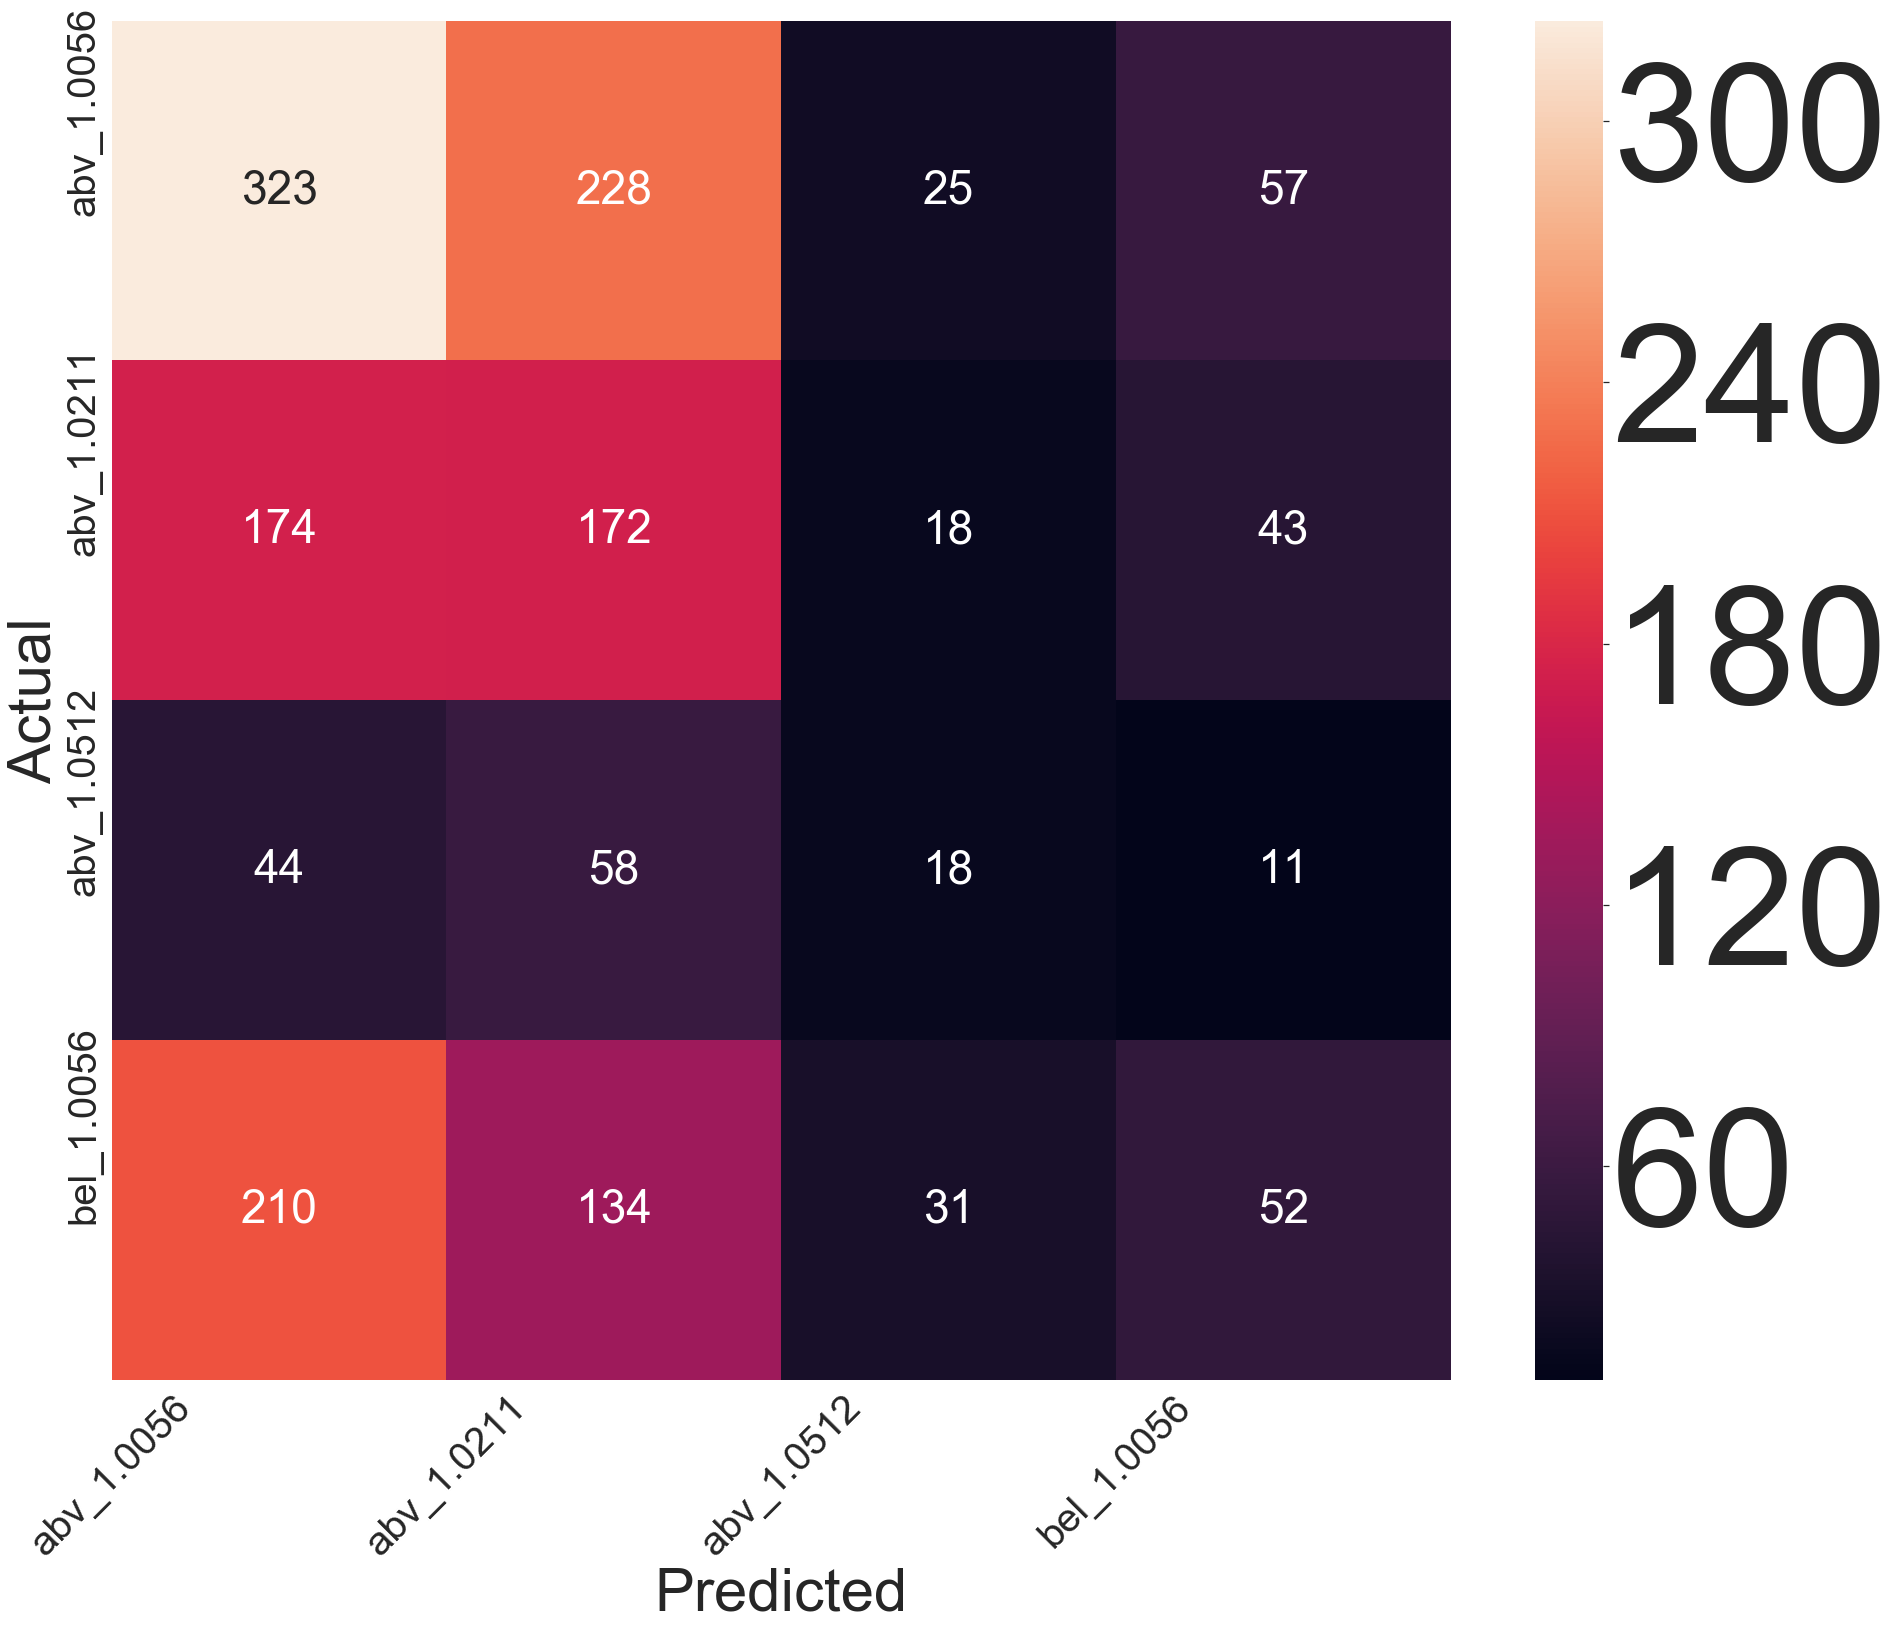

In [40]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [41]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0056 72.04%
abv_1.0211 77.36%
abv_1.0512 66.3%
bel_1.0056 68.1%


In [42]:
df_cln = MSFT
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            max_features=5)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.31892230576441105 
Cohans Kappa: 0.05449206359587466


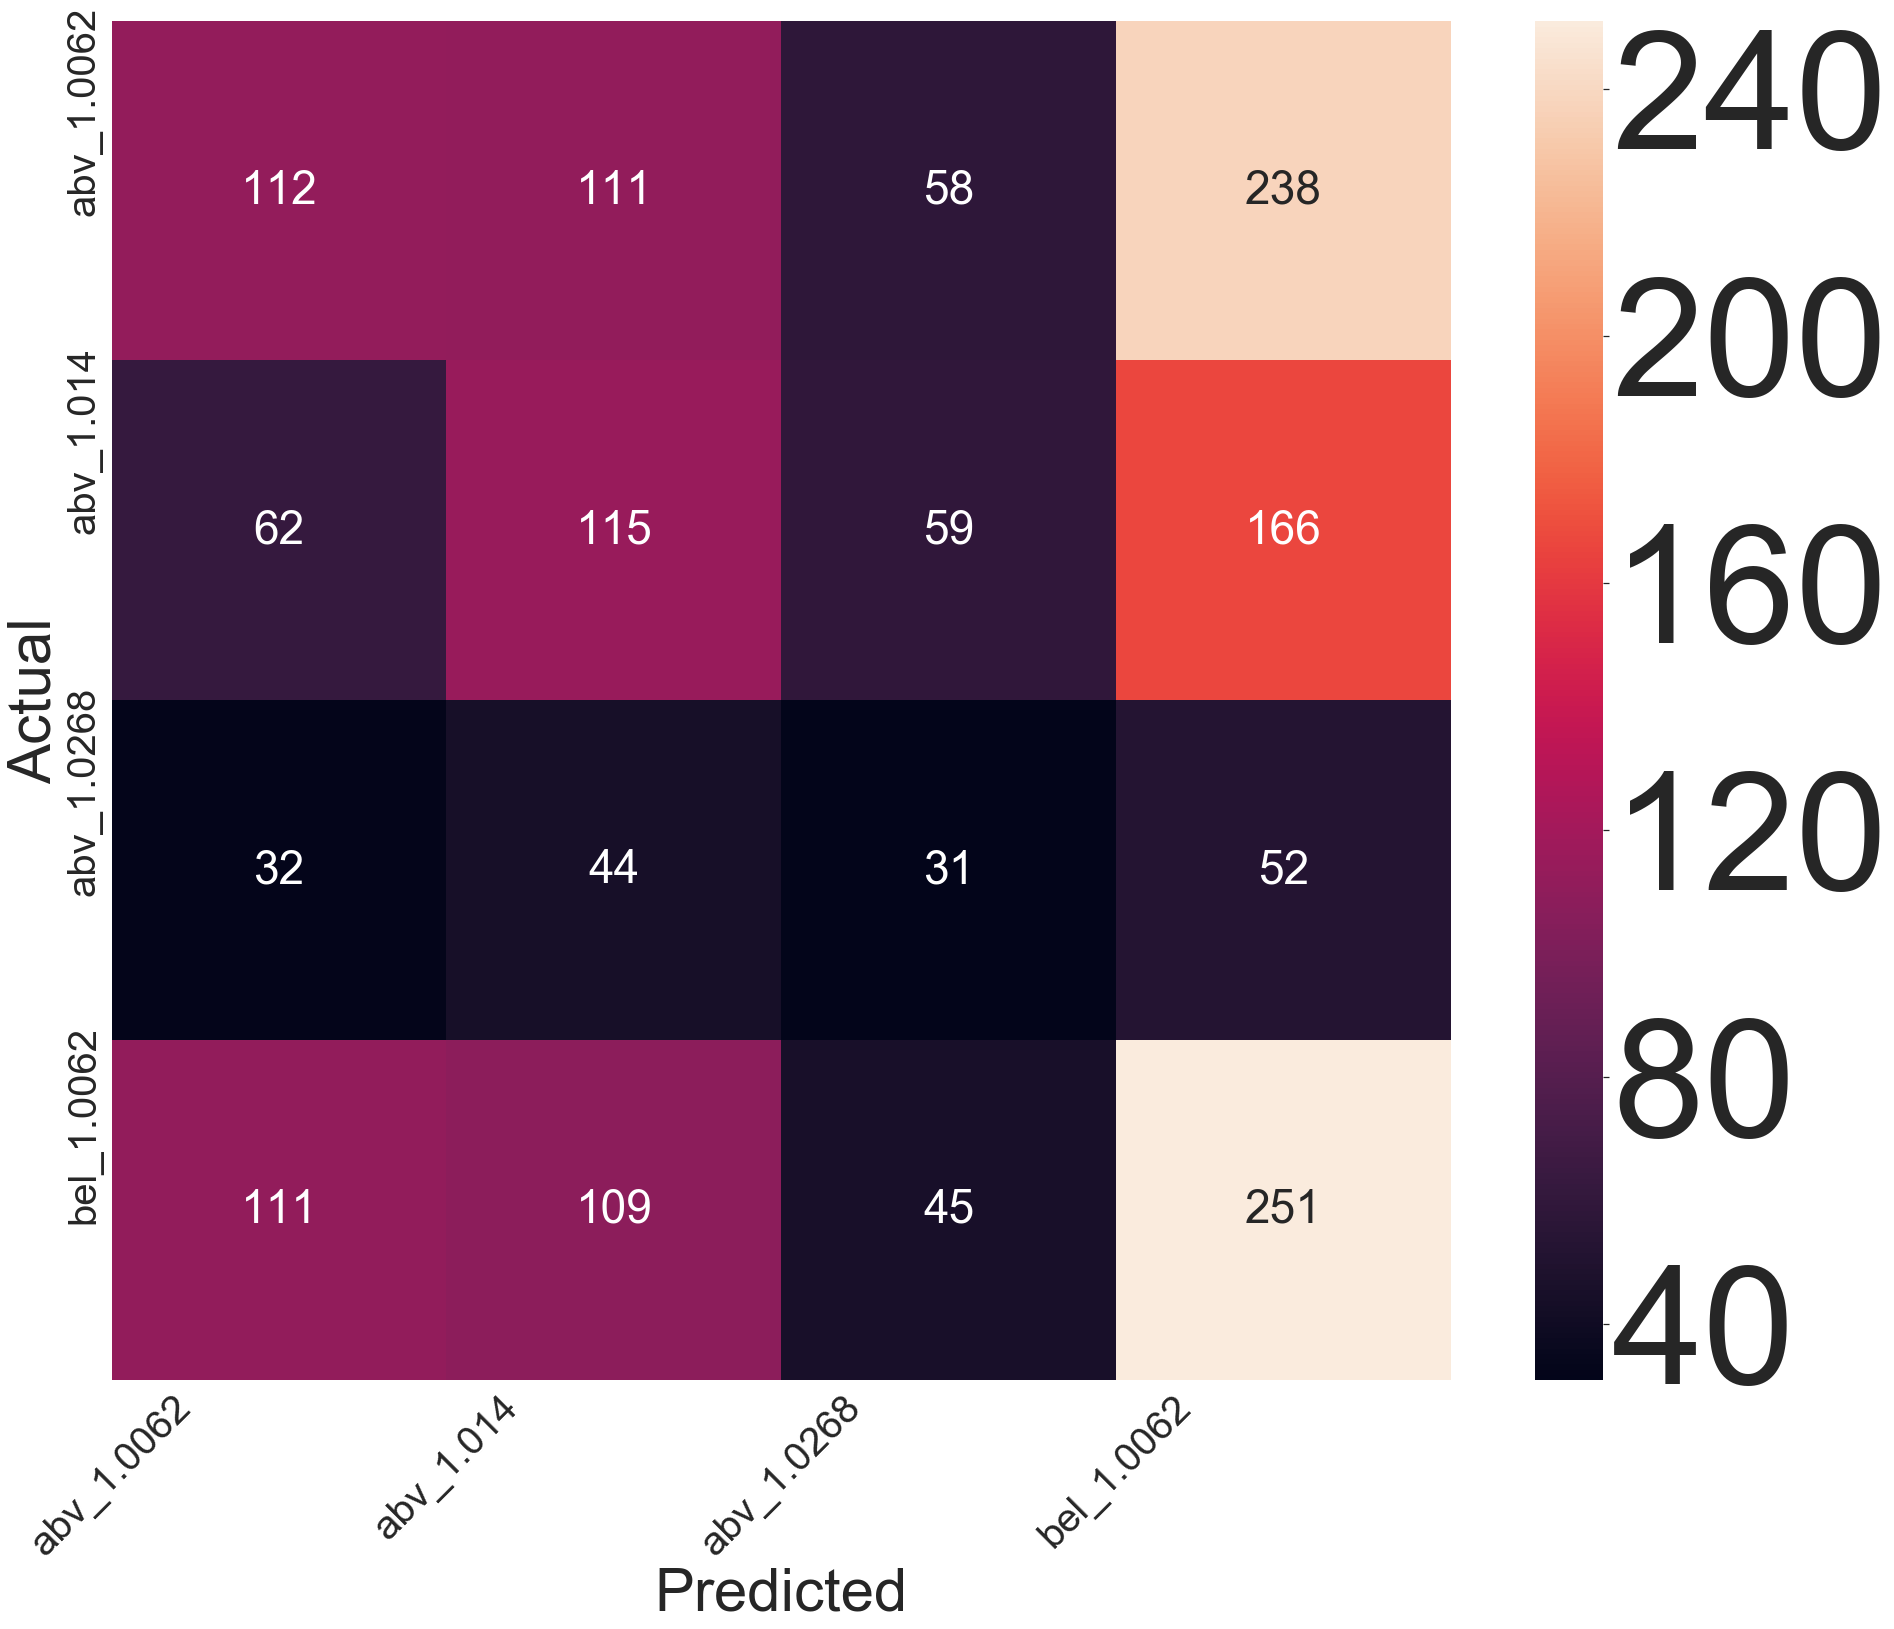

In [43]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [44]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0062 64.98%
abv_1.014 71.24%
abv_1.0268 76.68%
bel_1.0062 64.5%


In [45]:
df_cln = TQQQ
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features_2]
feature_test = df_cln.loc[stop:,features_2]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1100,
                            max_depth=15,
                            n_jobs=-1,
                            max_features=4,
                            random_state=42)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features_2).sort_values(ascending=False)
print(feature_imp)
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



rsi20               0.040505
tsf200              0.037699
rsi10               0.037080
ma60                0.036297
close_H_ratio       0.035290
ma20                0.034839
open_L_ratio        0.034695
rsi200              0.034513
rsi60               0.034461
Day_previous_roi    0.034134
percent_down        0.033955
close_L_ratio       0.033686
macd_diff_hist      0.033331
ma200               0.033282
r_sqr_5             0.033172
slope60             0.033153
ma10                0.033081
r_sqr_10            0.032939
open_H_ratio        0.032853
slope10             0.032419
obv                 0.032415
slope5              0.032293
tsf60               0.032236
tsf20               0.032024
macd_diff           0.031606
leadsine            0.031475
sine                0.031424
tsf10               0.030928
r_sqr_60            0.030756
aroon_diff          0.023458
dtype: float64
Accuracy: 0.35989717223650386 
Cohans Kappa: 0.13322714297219662


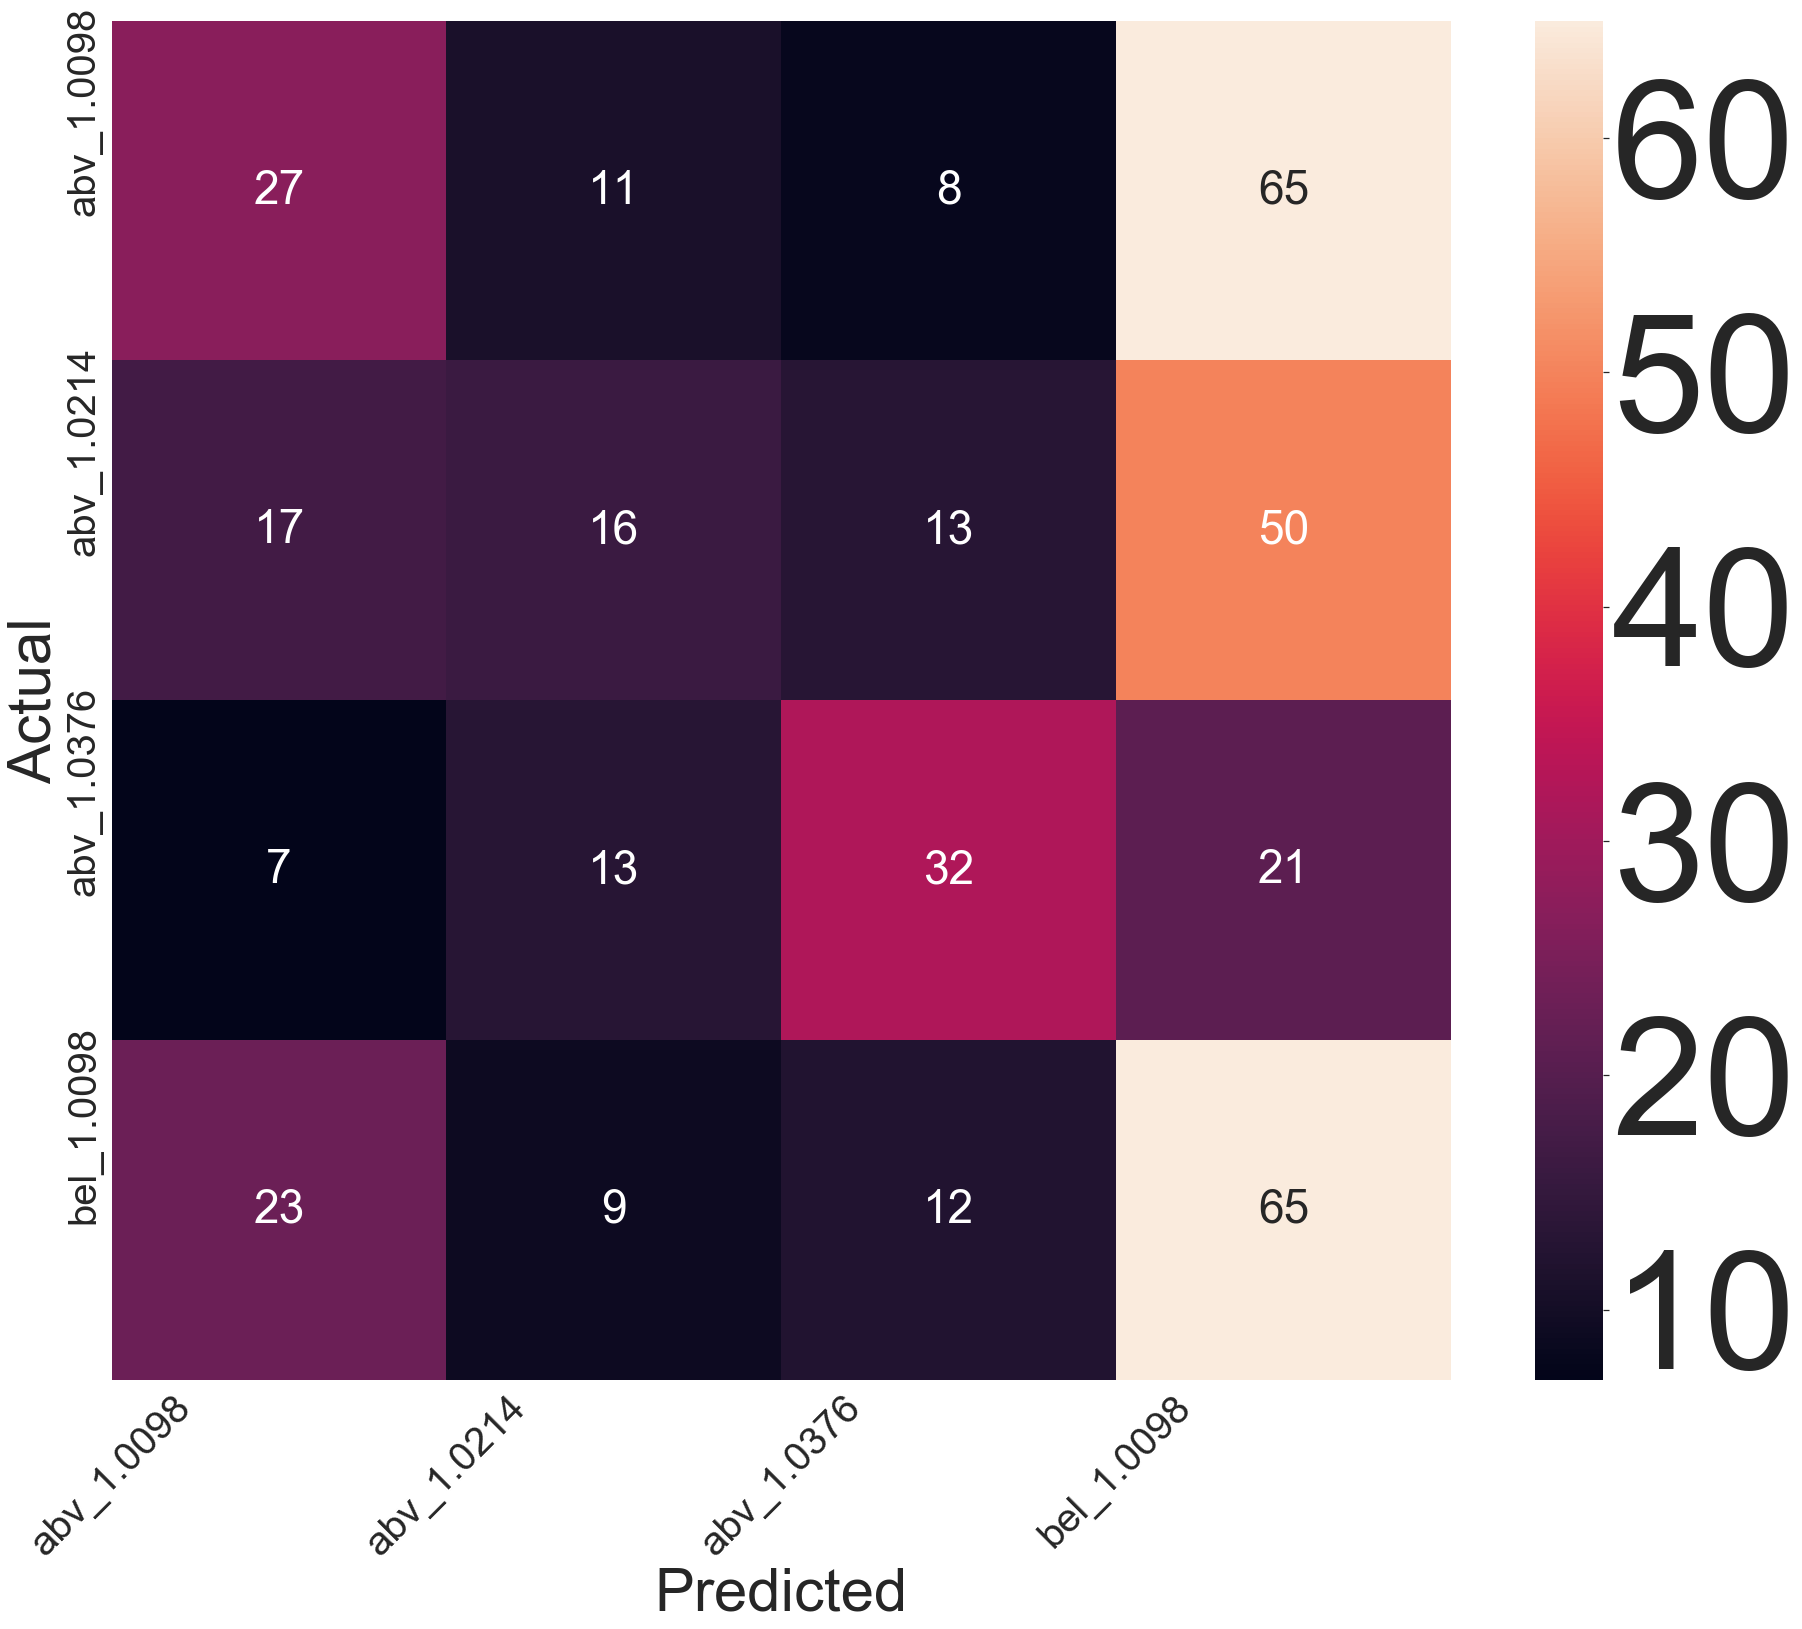

In [46]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [47]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0098 68.92%
abv_1.0214 81.63%
abv_1.0376 81.54%
bel_1.0098 67.66%


In [48]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[900,1000], 'max_depth': [12,13], 'max_features': [5,6], 'random_state': [42], 'n_jobs':[-1]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rf2.set_params(**g)  # ** is "unpacking" the dictionary
    rf2.fit(feature_train, target_train)
    test_scores.append(rf2.score(feature_train, target_train))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: DataConversionWarning:

A column-vector y was p

1.0 {'random_state': 42, 'n_jobs': -1, 'n_estimators': 900, 'max_depth': 13, 'max_features': 5}


In [49]:
from pandas_ml import ConfusionMatrix

tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
print("Confusion matrix:\n%s" % confusion_matrix)


Confusion matrix:
Predicted   abv_1.0098  abv_1.0214  abv_1.0376  bel_1.0098  __all__
Actual                                                             
abv_1.0098          27          11           8          65      111
abv_1.0214          17          16          13          50       96
abv_1.0376           7          13          32          21       73
bel_1.0098          23           9          12          65      109
__all__             74          49          65         201      389


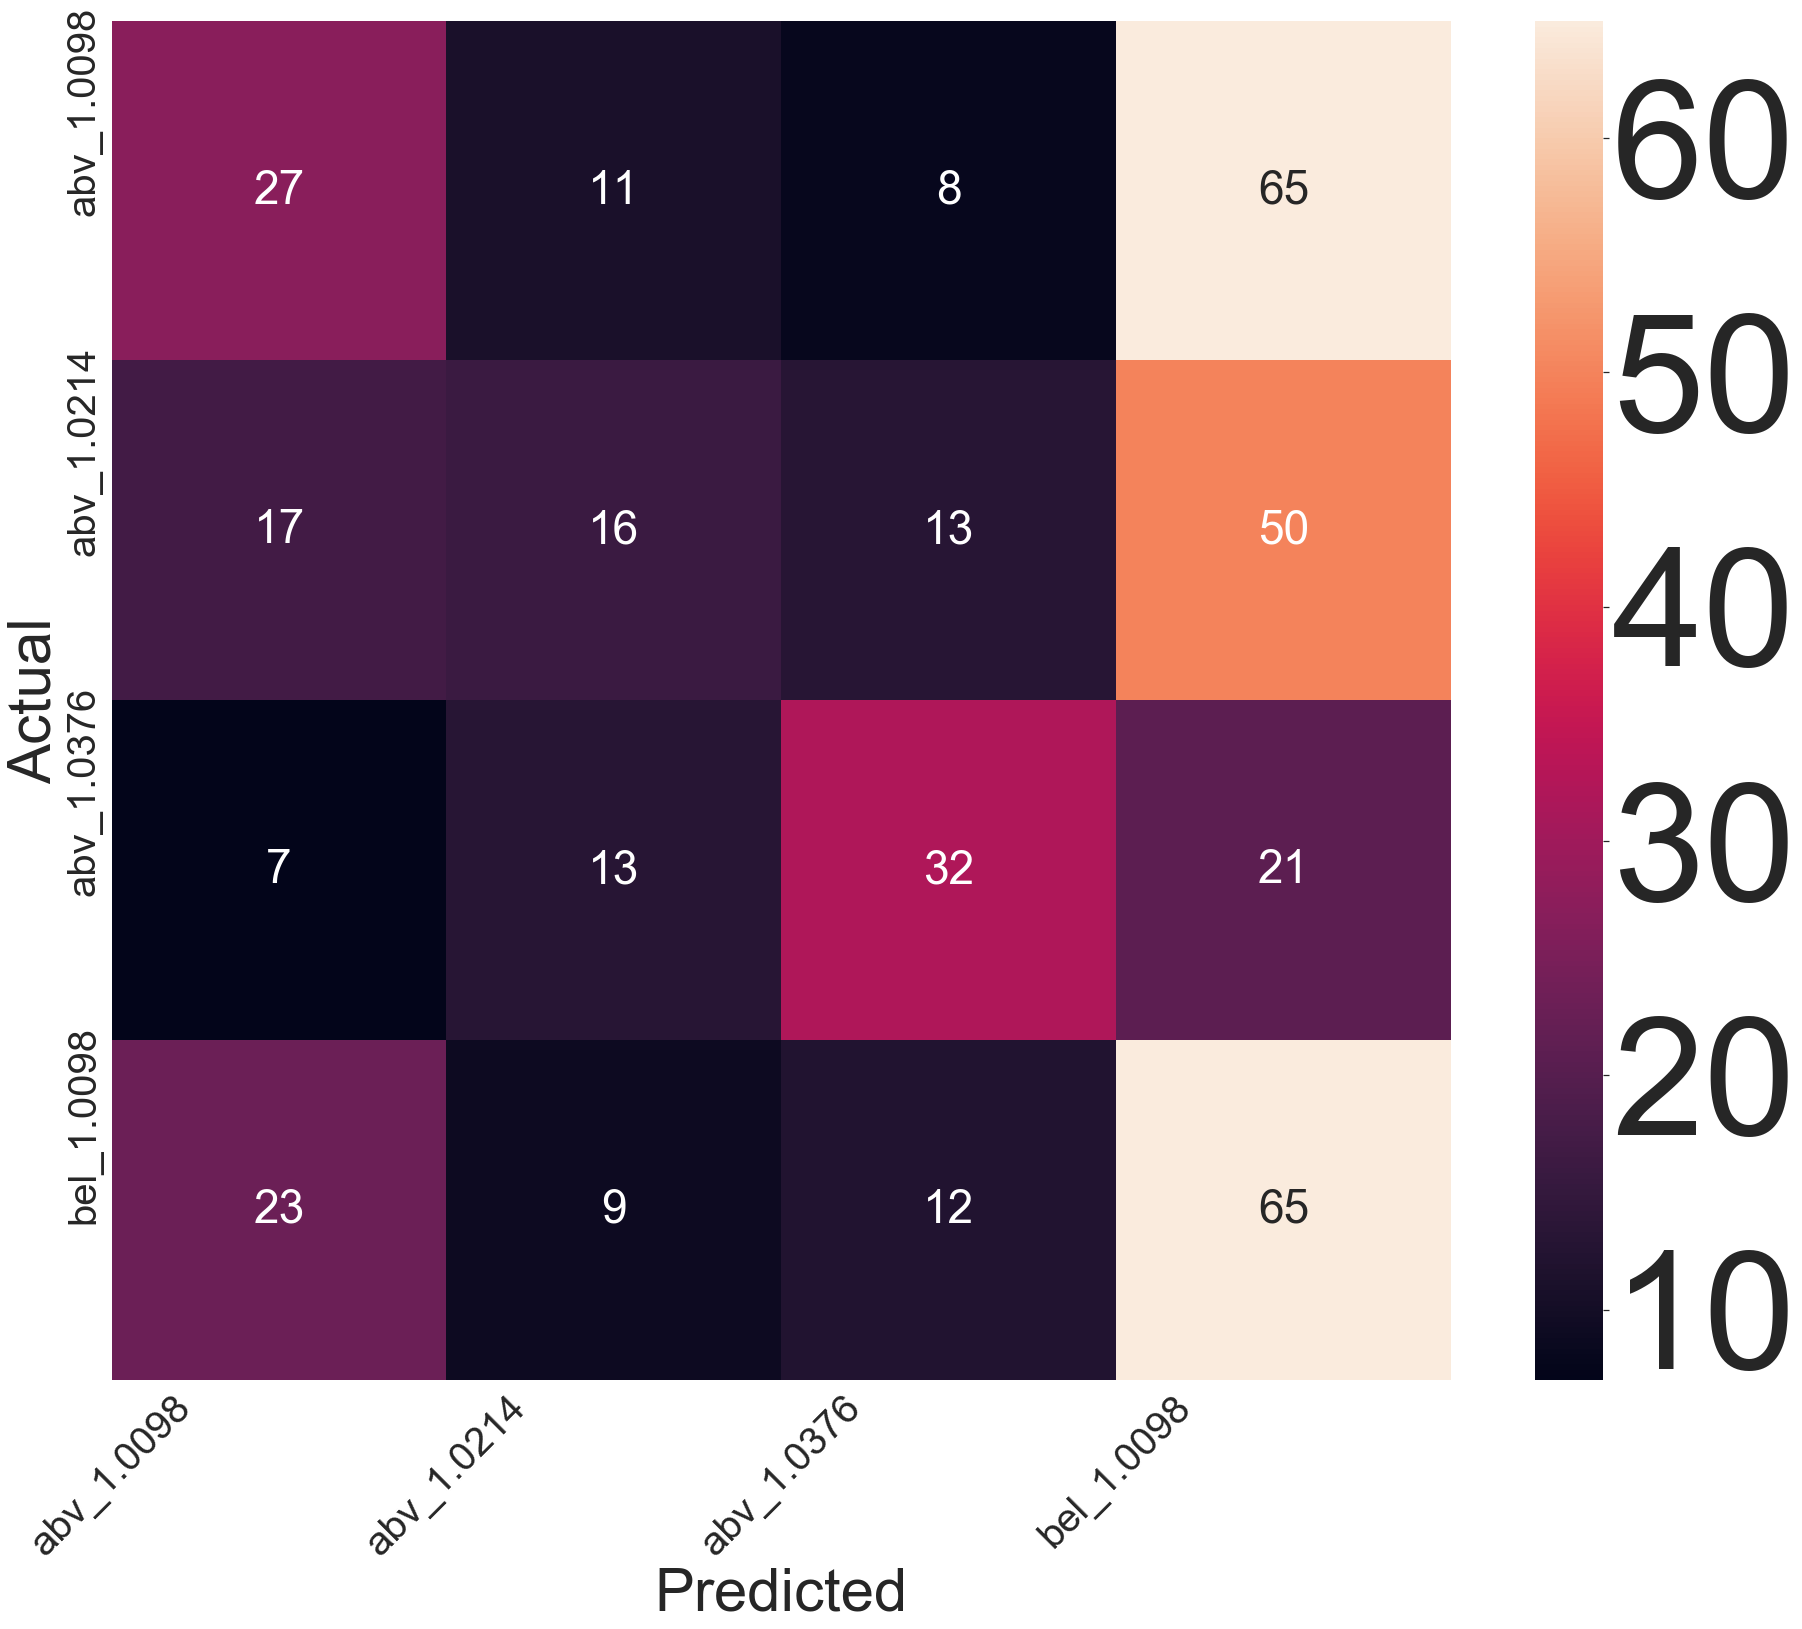

In [50]:
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)



In [51]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0098 68.92%
abv_1.0214 81.63%
abv_1.0376 81.54%
bel_1.0098 67.66%


In [52]:
df_cln = NVDA
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            max_features=5)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.31746031746031744 
Cohans Kappa: 0.06355144494461429


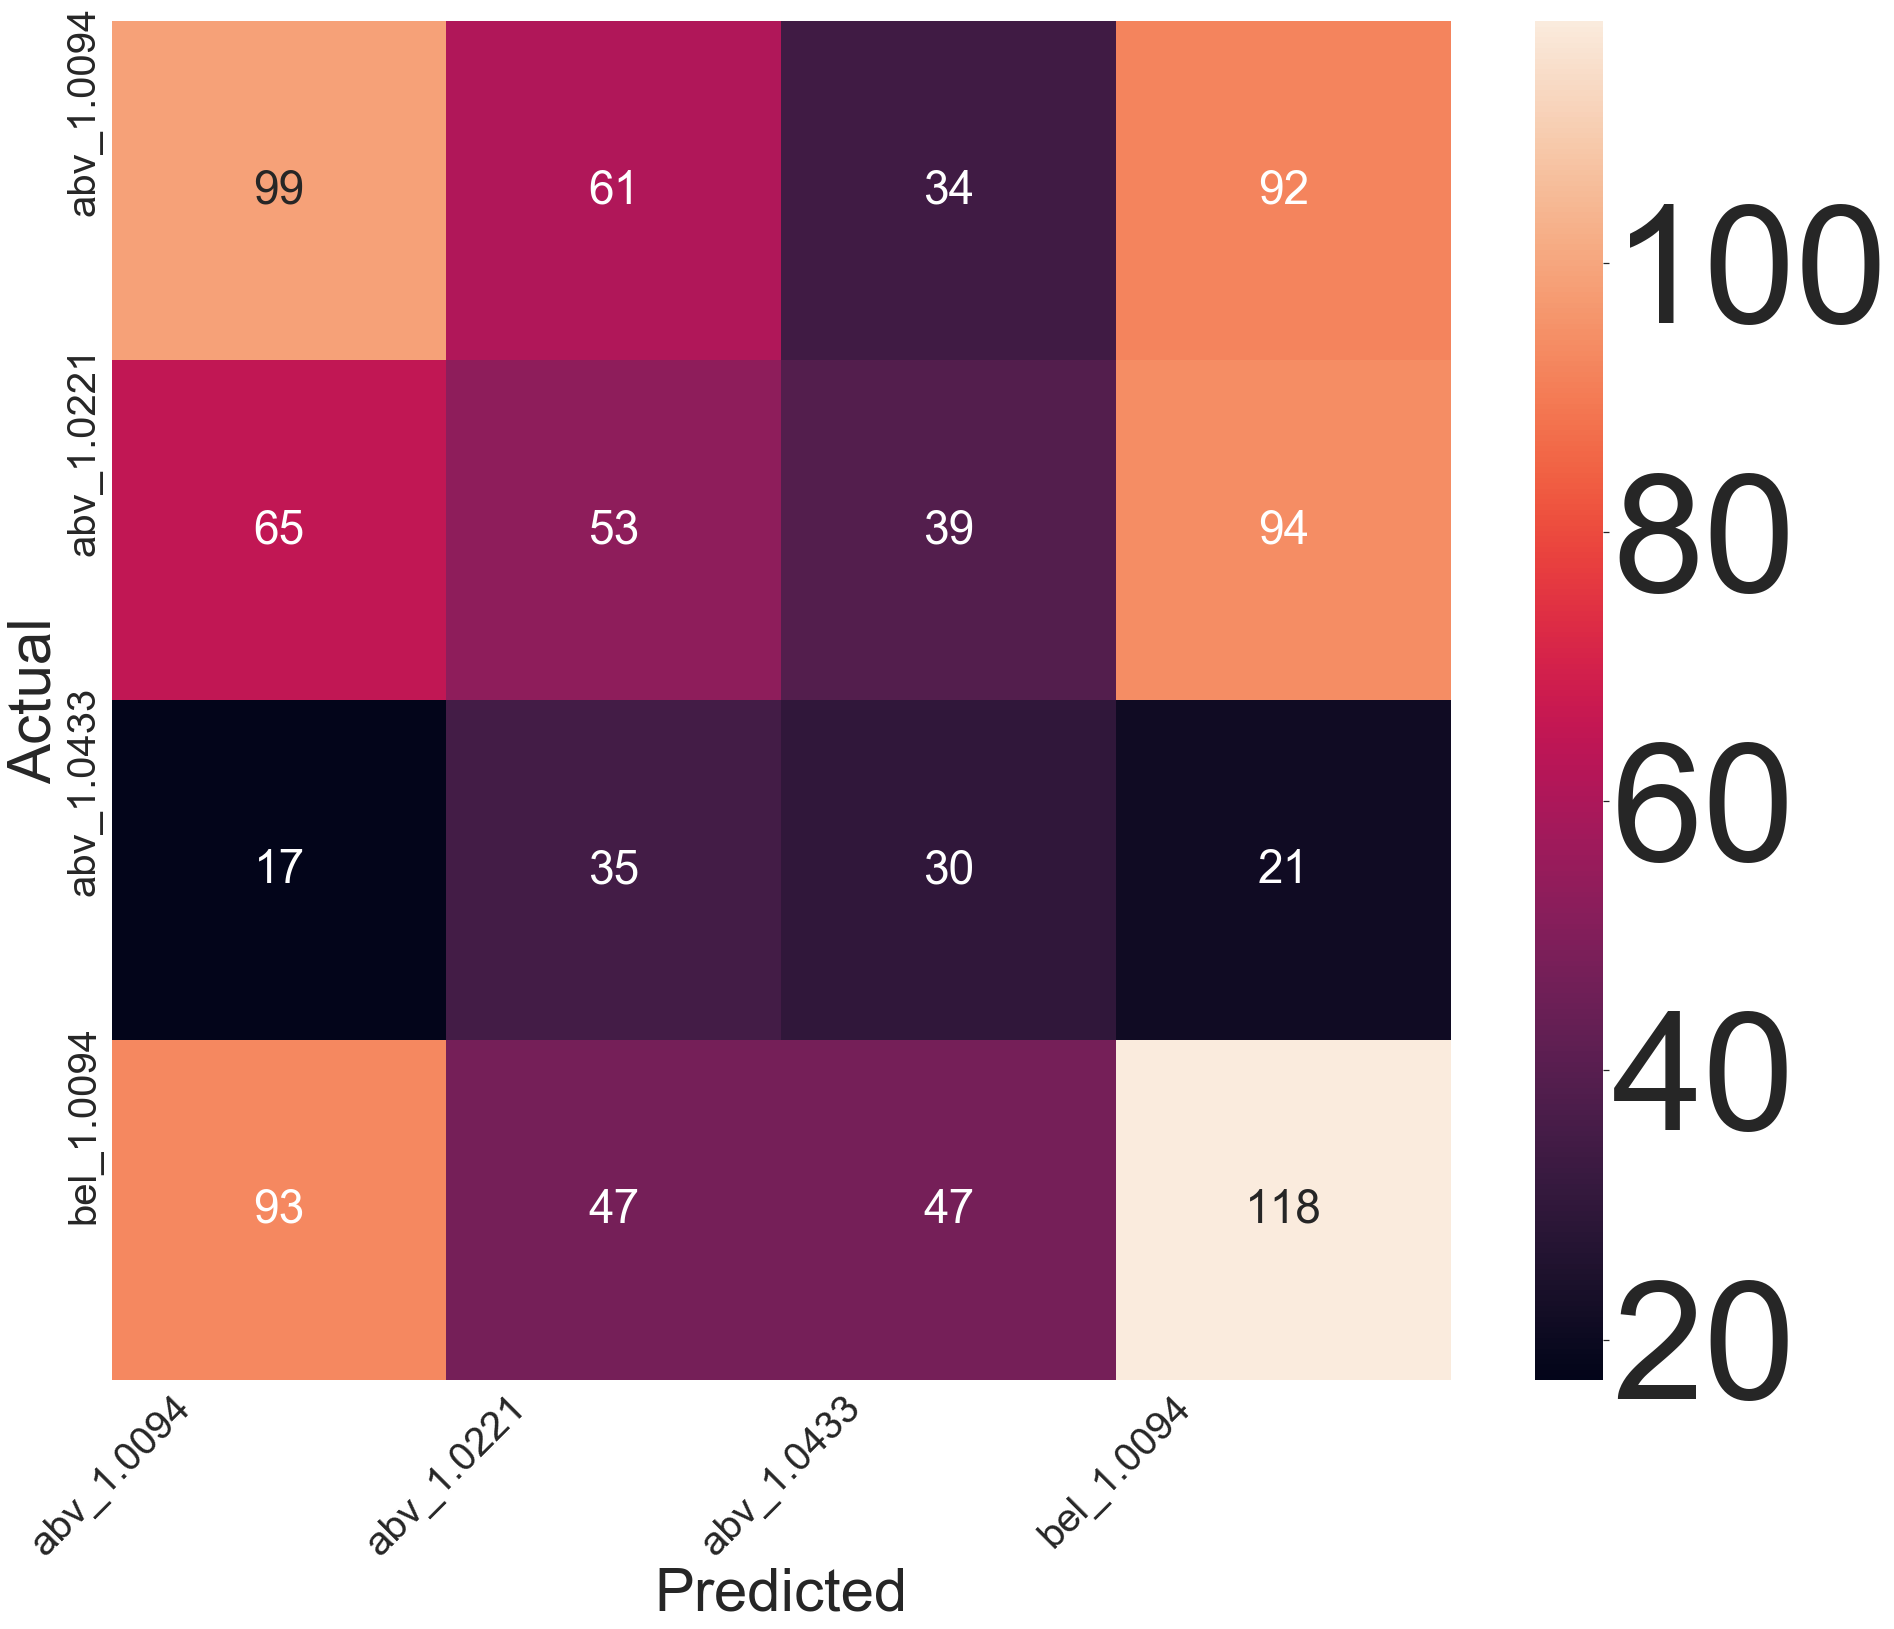

In [53]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [54]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0094 66.06%
abv_1.0221 76.02%
abv_1.0433 68.67%
bel_1.0094 63.69%


In [55]:
df_cln = YINN
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1000,
                            max_features=5)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
#feature_imp
# prediction on test set
target_pred=rf2.predict(feature_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(target_test, target_pred),'\n'
      'Cohans Kappa:', metrics.cohen_kappa_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy: 0.3007518796992481 
Cohans Kappa: 0.0544702464878456


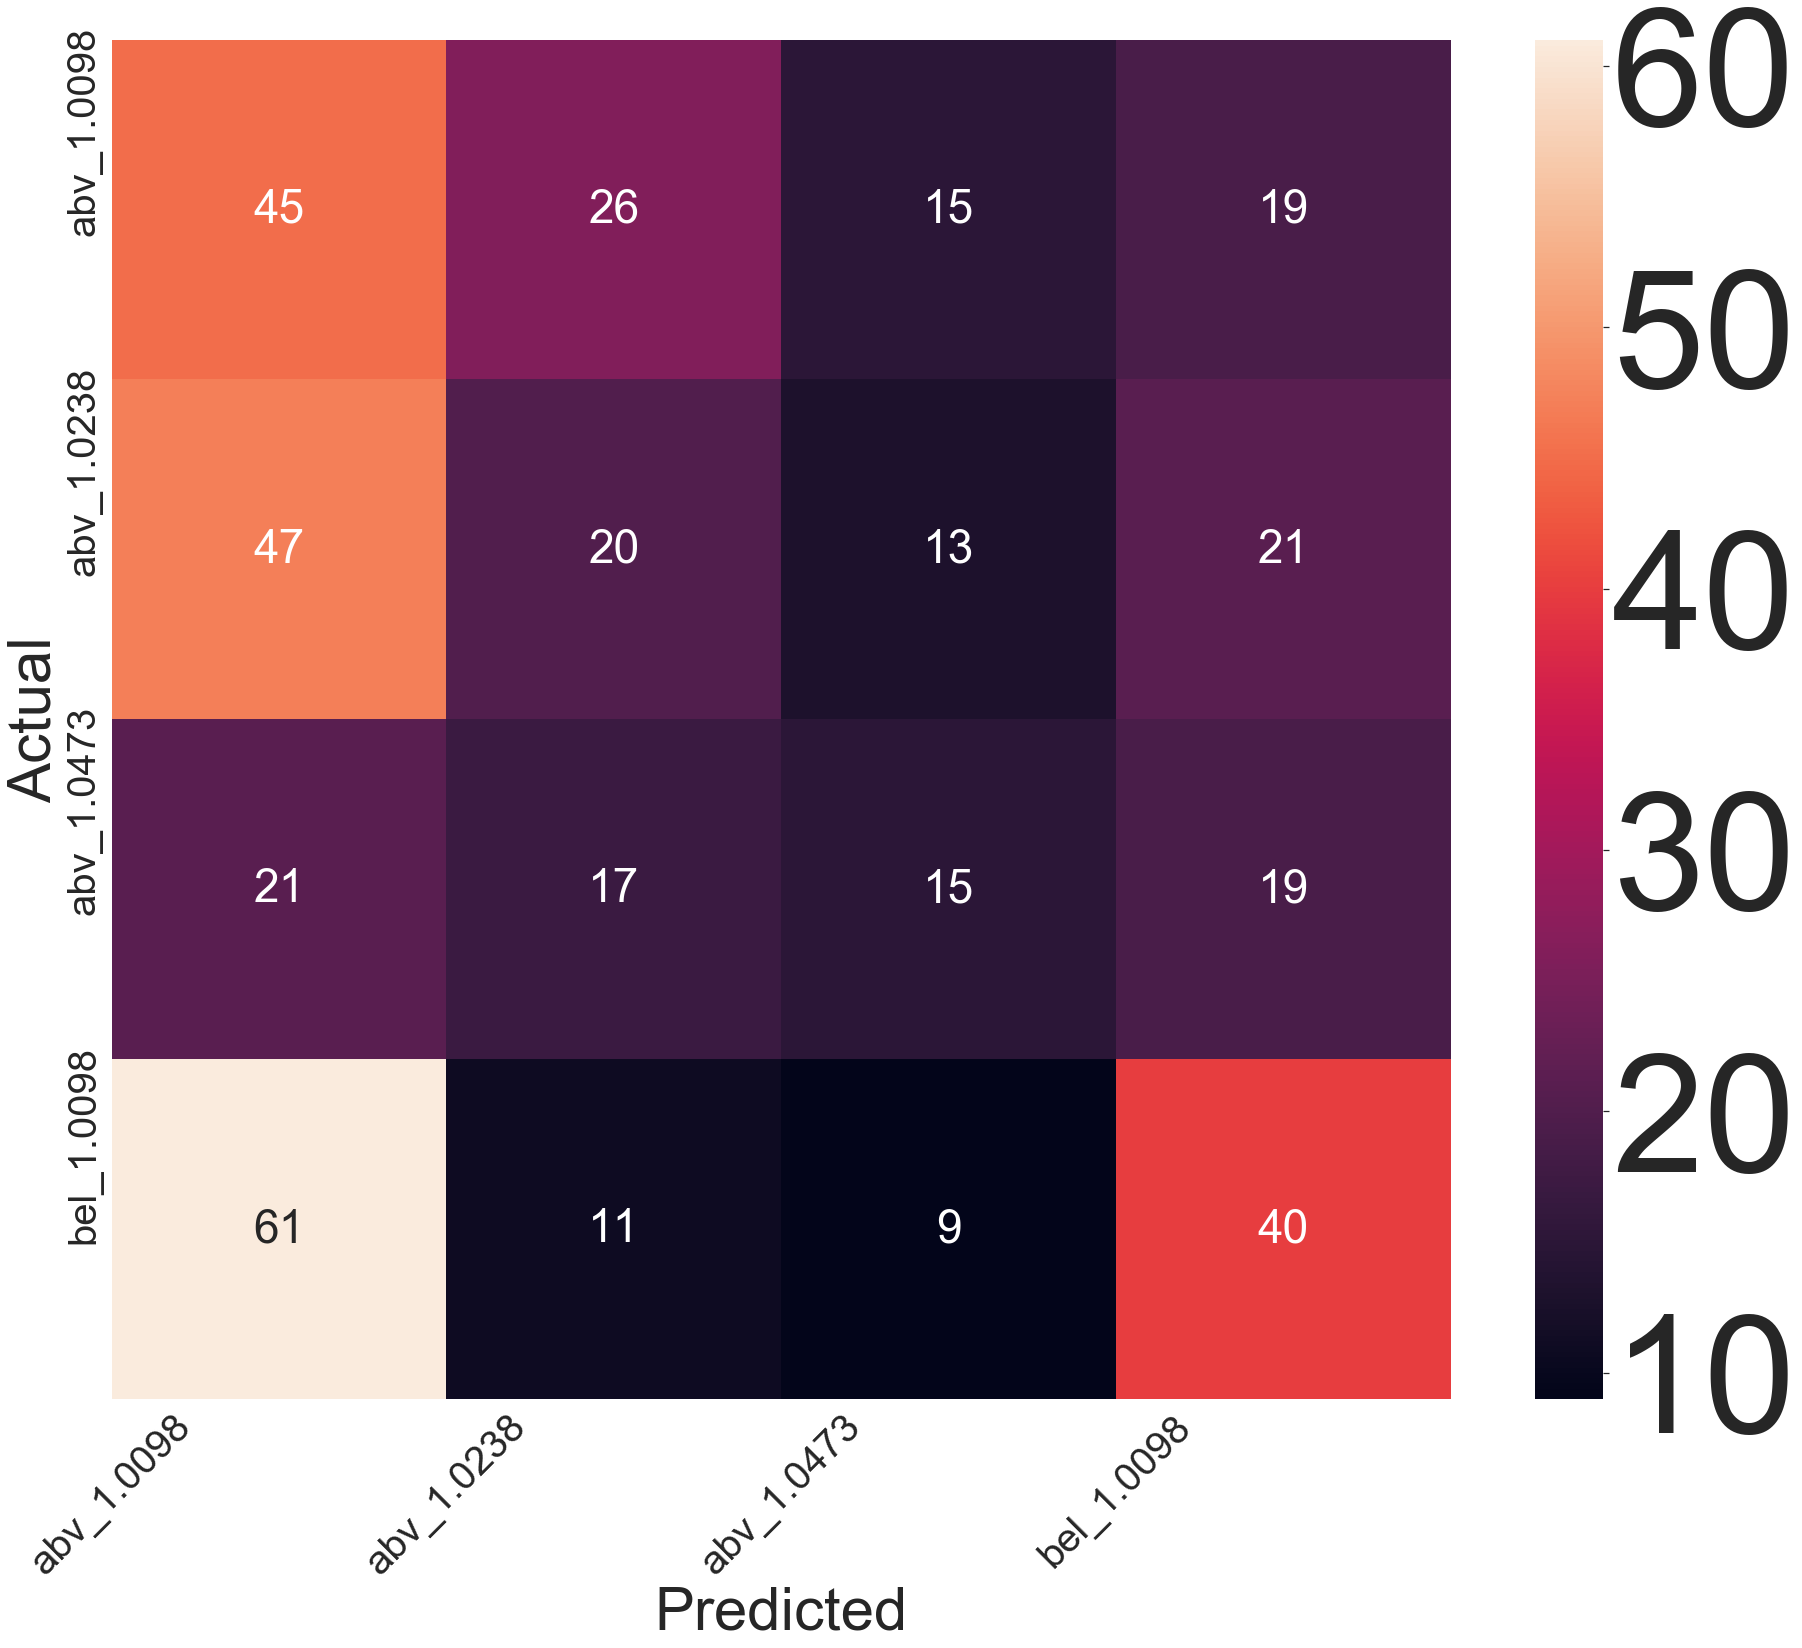

In [56]:
tar_true = target_test[target_name].values.tolist()

confusion_matrix = ConfusionMatrix(tar_true,target_pred)
matrix = metrics.confusion_matrix(target_test, target_pred)
type(confusion_matrix)
plt.subplots(figsize=(30,25))

ax =sns.heatmap(matrix, annot=True,annot_kws={"size": 46},fmt="d")# font size
tick_marks = np.arange(len(confusion_matrix.classes.values))
plt.xticks(tick_marks, confusion_matrix.classes.values, rotation=45, fontsize=40)
plt.yticks(tick_marks, confusion_matrix.classes.values, fontsize=40)
plt.xlabel( confusion_matrix.pred_name, fontsize=60)
plt.ylabel( confusion_matrix.true_name, fontsize=60)

In [57]:
for r in range(matrix.shape[0]):
    tot = sum(matrix[:,r])
    top = sum(matrix[:3,r])
    perc = str(round(100*top/tot,2))+'%'
    print(confusion_matrix.classes[r],perc)

abv_1.0098 64.94%
abv_1.0238 85.14%
abv_1.0473 82.69%
bel_1.0098 59.6%


//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



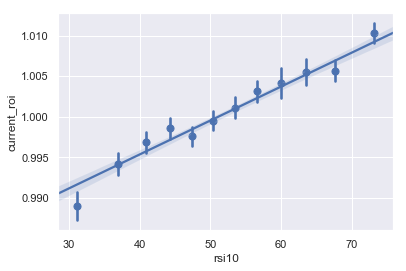

In [58]:
sns.set(color_codes=True)
sns.regplot(F['rsi10'],F['current_roi'],
           x_bins=12)

In [59]:
df_test = F
end = df_test.shape[0] 
arr = []
for i in range(end):
    if df_test['rsi10'][i] > 60:
        arr.append('buy')
    elif df_test['rsi10'][i] > 40:
        arr.append('hold')
    
    else:
        arr.append('sell')
df_test['cat'] = arr

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



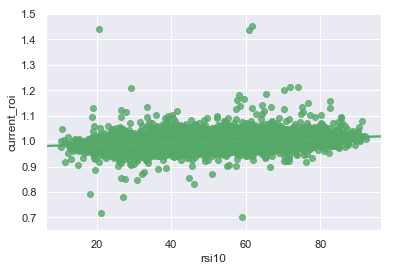

In [60]:
sns.regplot(F['rsi10'],F['current_roi'],
           color='g')



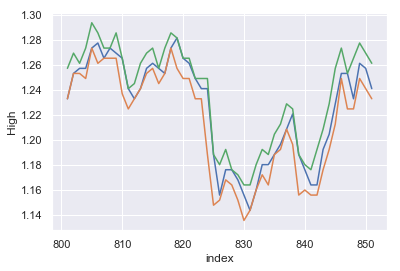

In [61]:
sns.set()
test_N=F.loc[600:650]

ax = sns.lineplot(x="index", y="Open", data=test_N)
ax = sns.lineplot(x="index", y="Low", data=test_N)
ax = sns.lineplot(x="index", y="High", data=test_N)

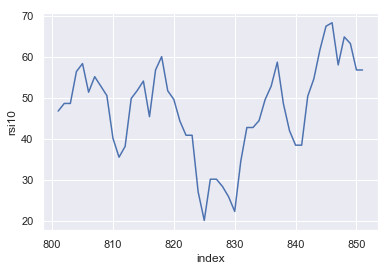

In [62]:
ax = sns.lineplot(x="index", y="rsi10", data=test_N, )

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



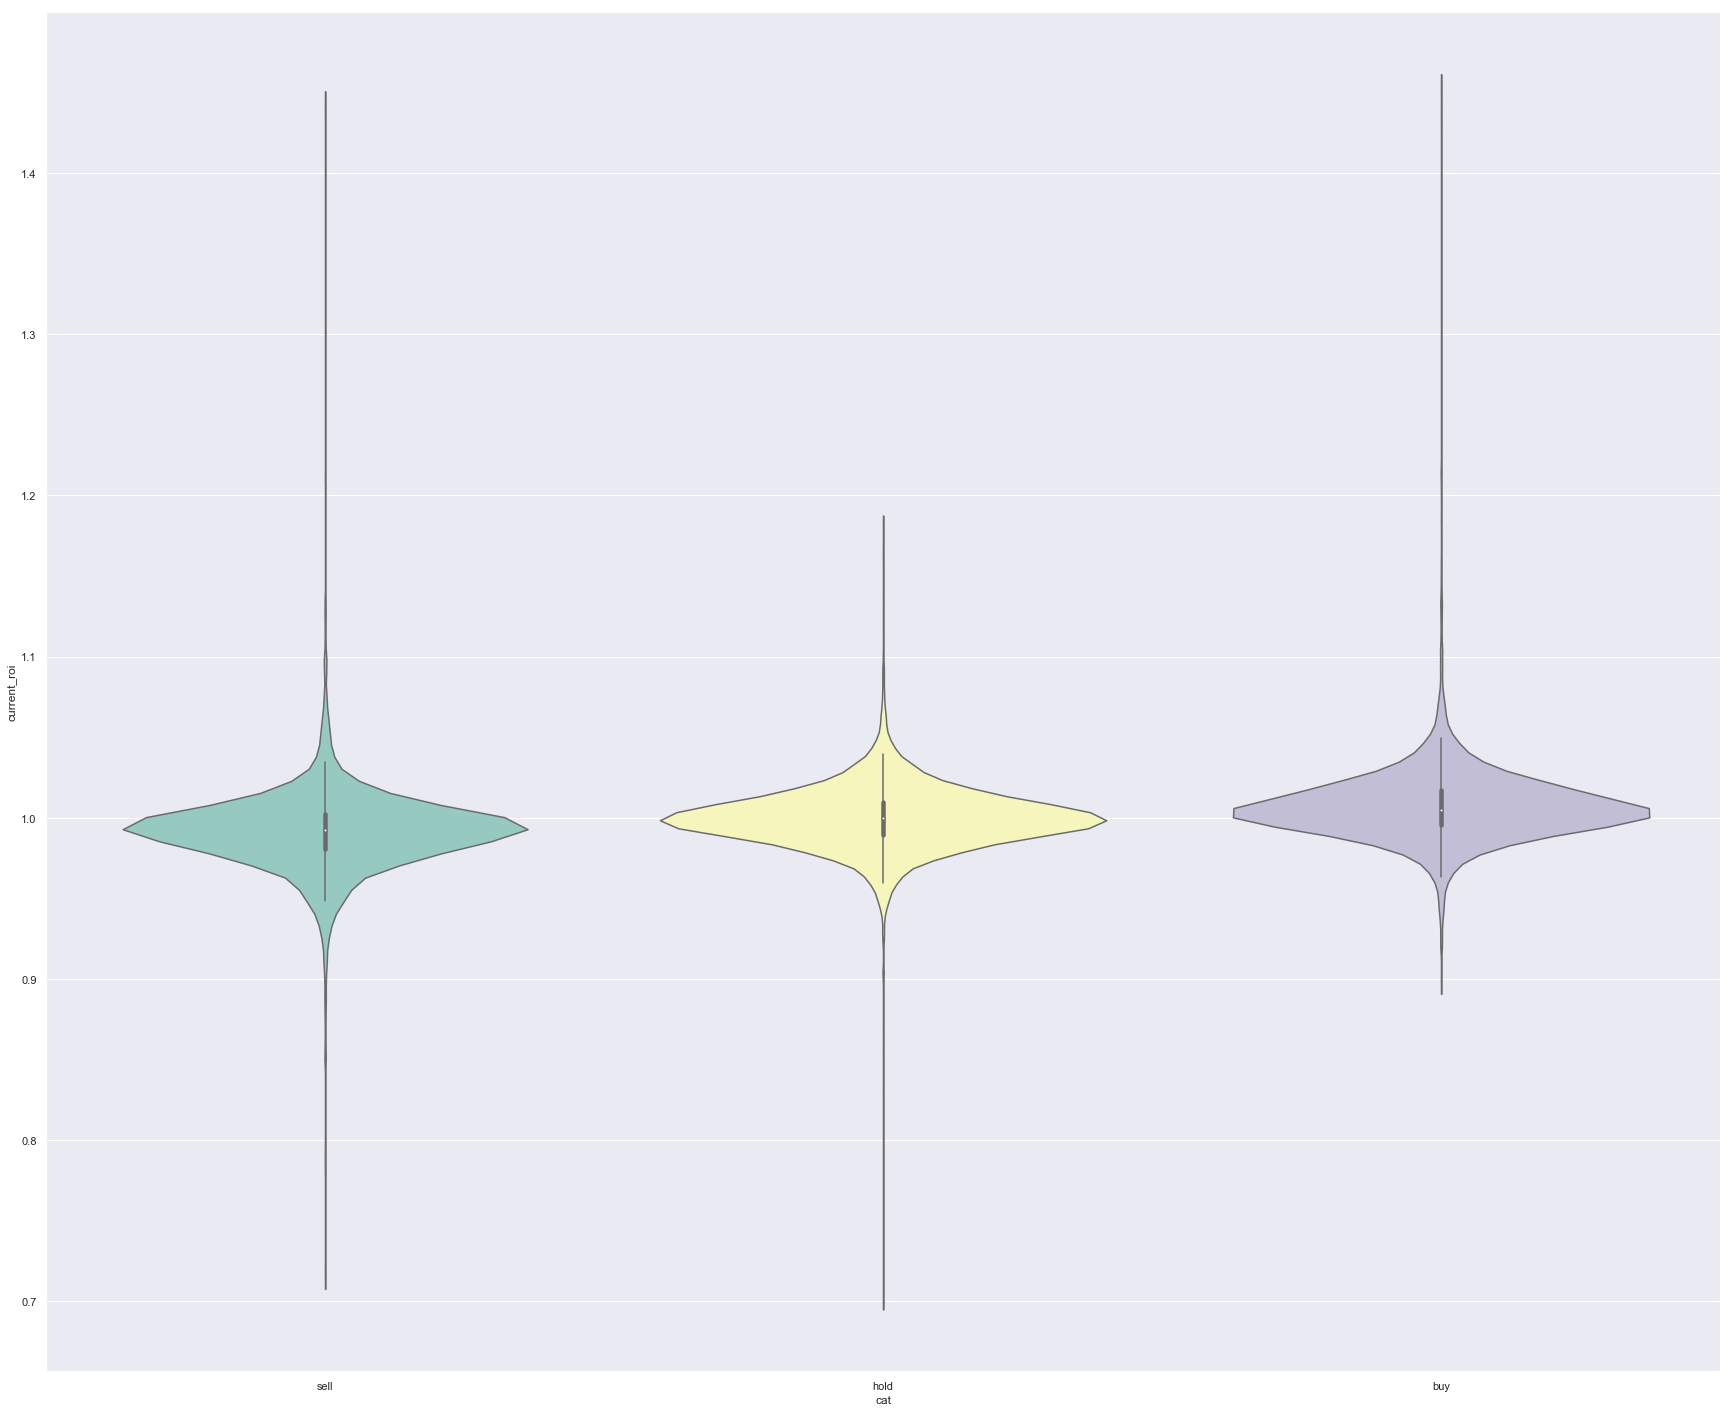

In [63]:
sns.set()
plt.subplots(figsize=(30,25))
#sns.set(style="whitegrid")
ax = sns.violinplot(x="cat", y="current_roi", data=df_test,palette="Set3")



//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



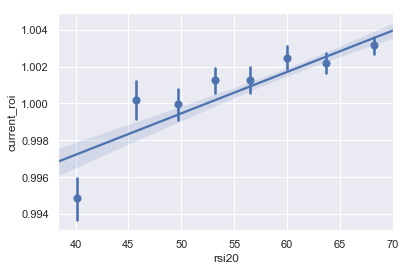

In [64]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['rsi20'],Nasdaq['current_roi'],
           x_bins=8)



//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



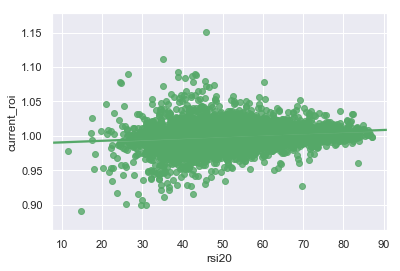

In [65]:
sns.regplot(Nasdaq['rsi20'],Nasdaq['current_roi'],
           color='g')




//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



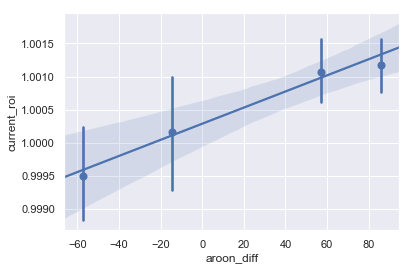

In [66]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['aroon_diff'],Nasdaq['current_roi'],
           x_bins=4)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



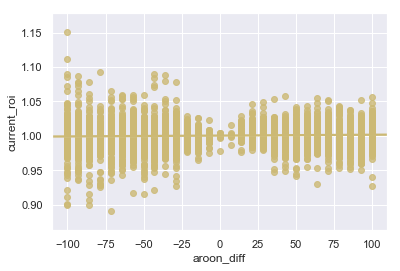

In [67]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['aroon_diff'],Nasdaq['current_roi'],
           color='y')

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



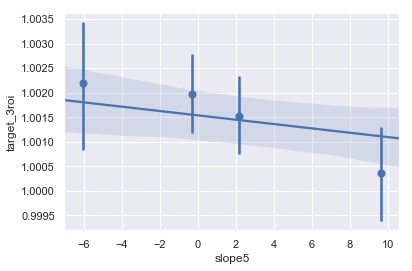

In [68]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['slope5'],Nasdaq['target_3roi'],
           x_bins=4)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



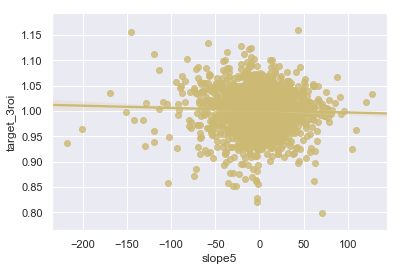

In [69]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['slope5'],Nasdaq['target_3roi'],
           color='y')

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



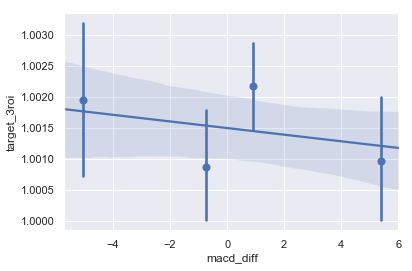

In [70]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['macd_diff'],Nasdaq['target_3roi'],
           x_bins=4)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



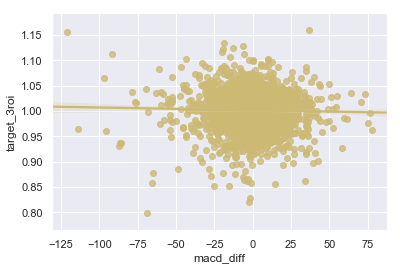

In [71]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['macd_diff'],Nasdaq['target_3roi'],
           color='y')

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



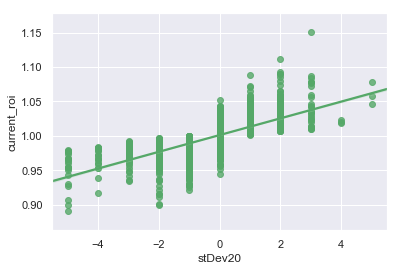

In [72]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['stDev20'],Nasdaq['current_roi'],
         color='g')

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



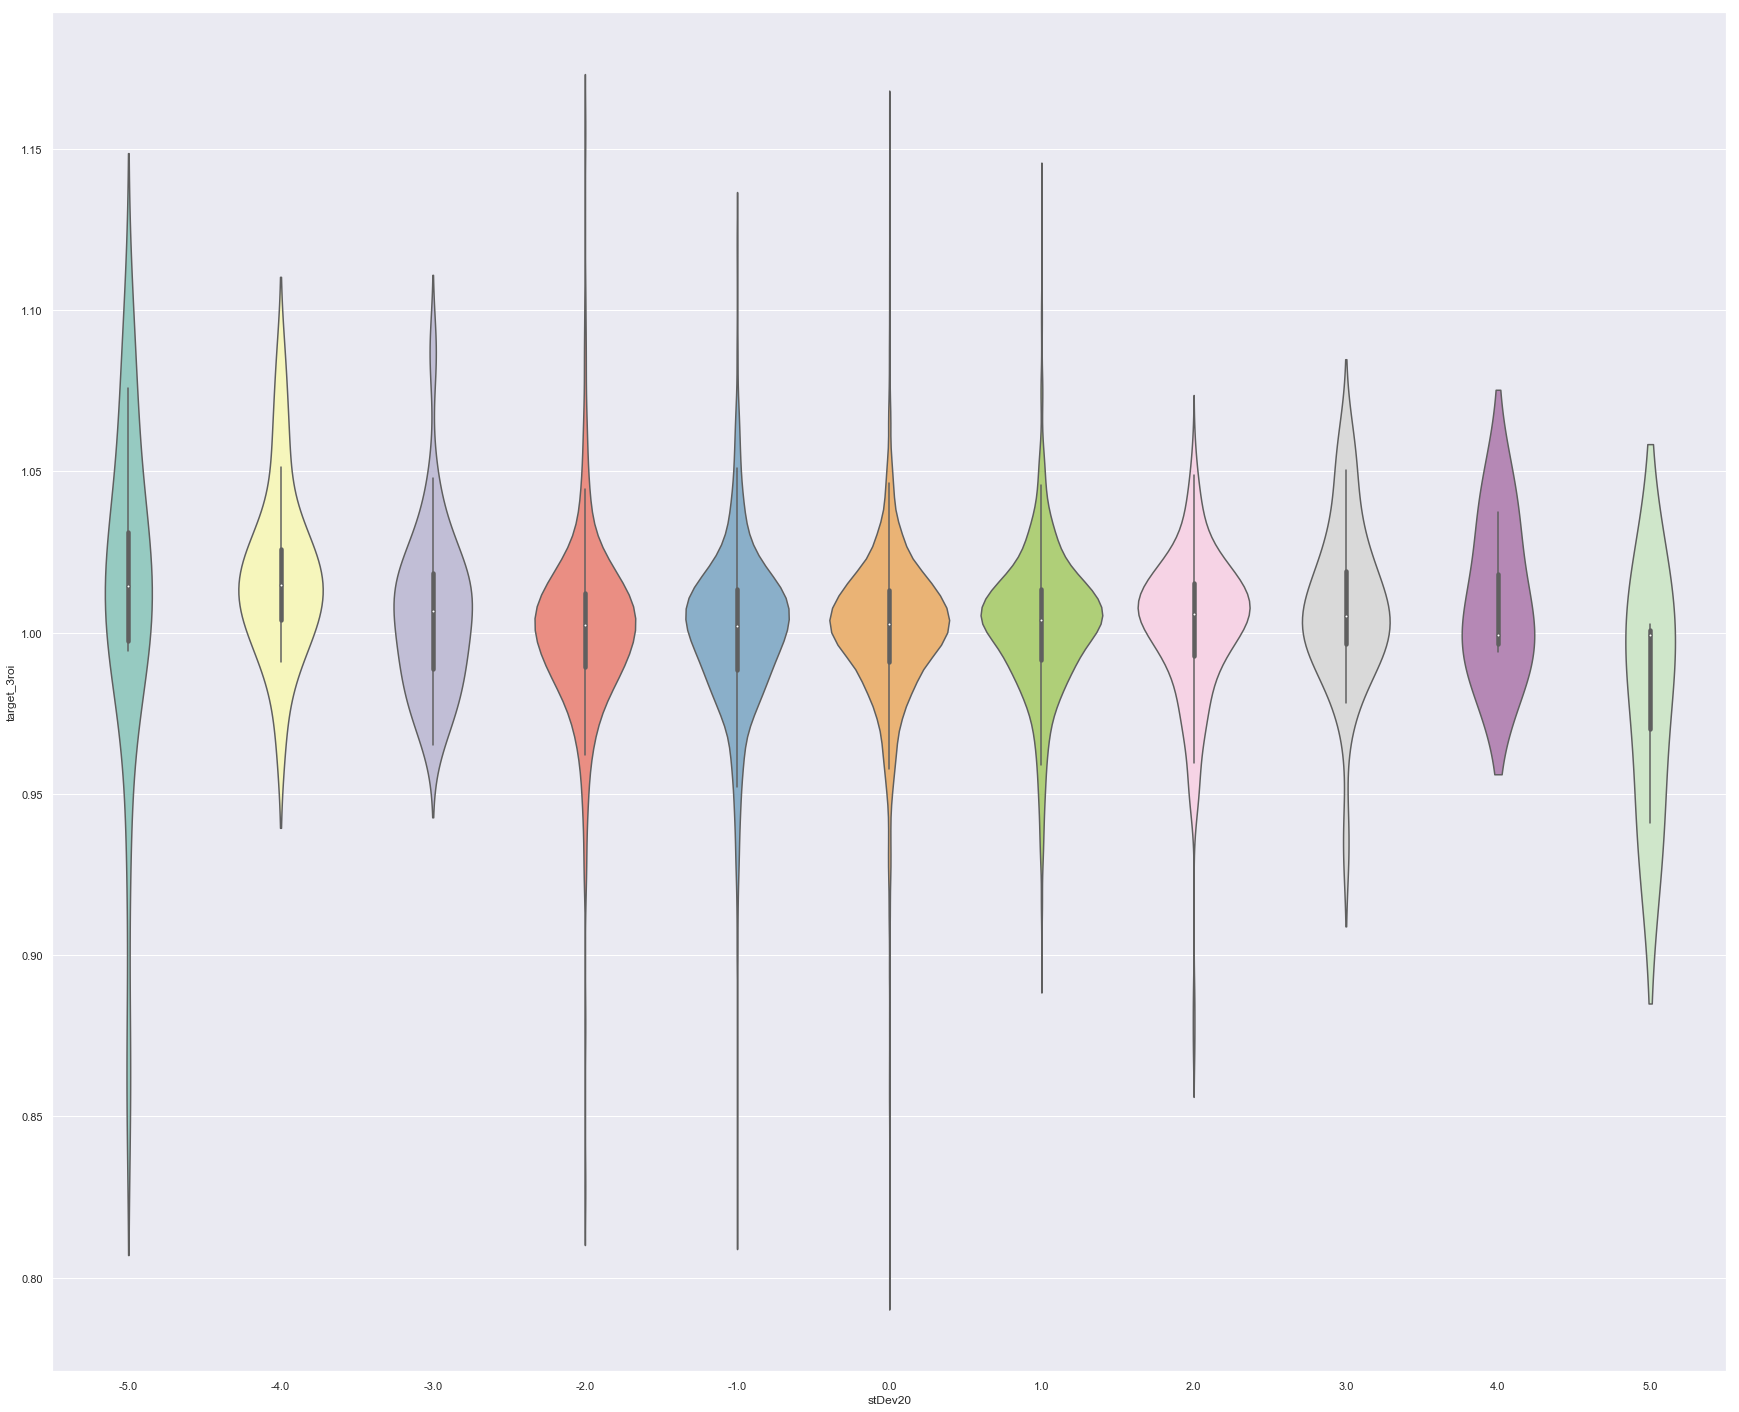

In [73]:
plt.subplots(figsize=(30,25))
sns.set(style="whitegrid")
ax = sns.violinplot(x="stDev20", y="target_3roi", data=Nasdaq,palette="Set3")



//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



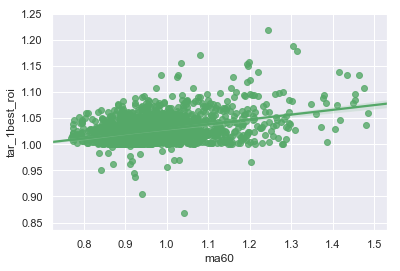

In [74]:
sns.set(color_codes=True)
sns.regplot(TQQQ['ma60'],TQQQ['tar_1best_roi'],
           color='g')

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



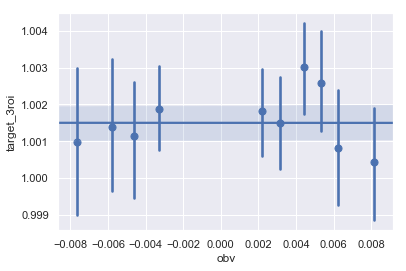

In [75]:
sns.set(color_codes=True)
sns.regplot(Nasdaq['obv'],Nasdaq['target_3roi'],
           x_bins=10)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



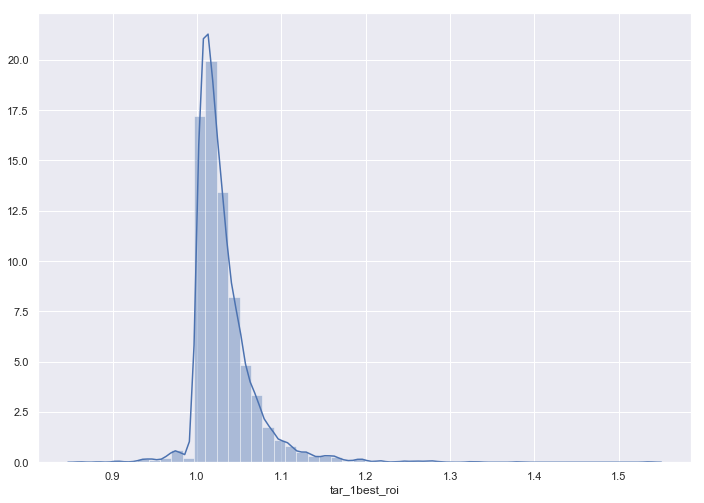

In [76]:
MU.dropna(inplace=True)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.distplot(NFLX['tar_1best_roi'], bins=50, ax=ax);

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



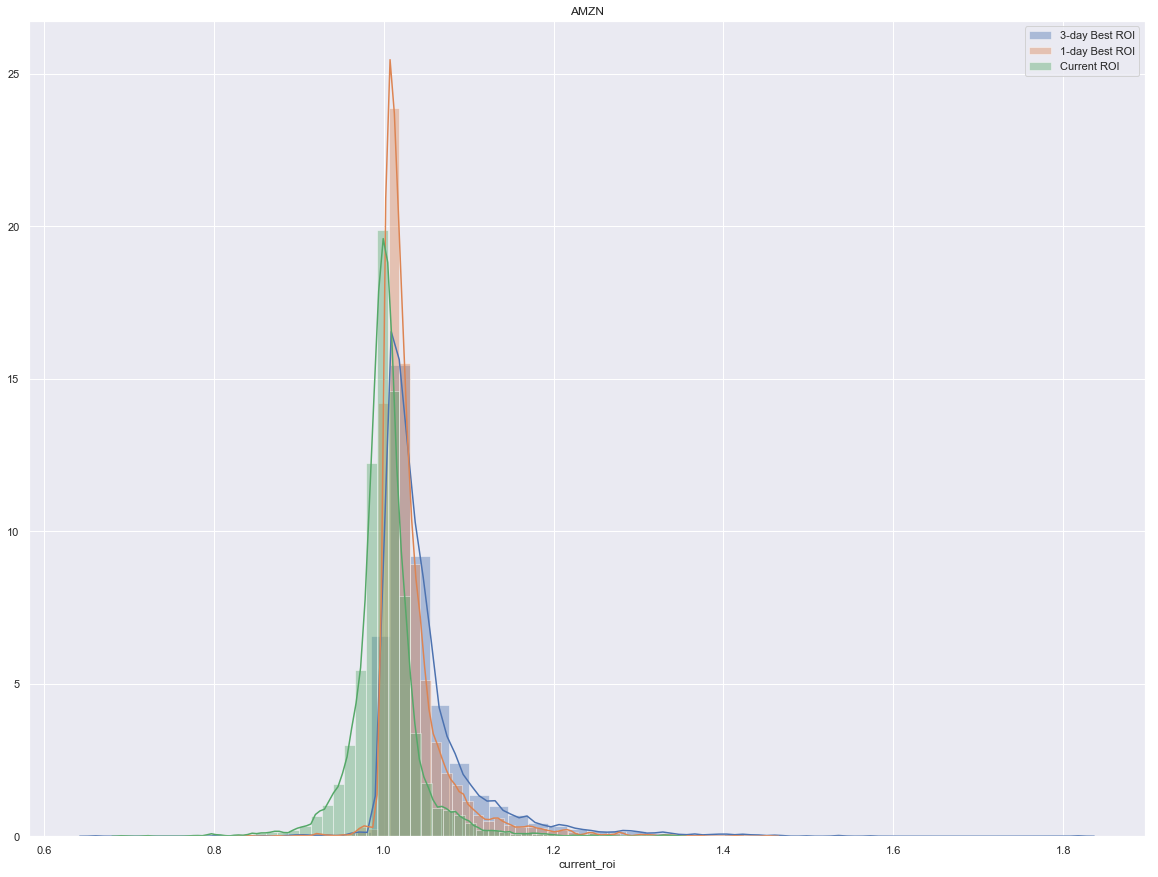

In [77]:
AMZN.dropna(inplace=True)
 
fig, ax = plt.subplots()
ax.set_title('AMZN')
# the size of A4 paper
fig.set_size_inches(20, 15)
sns.distplot(AMZN['tar_3best_roi'], bins=50, ax=ax, label='3-day Best ROI');
sns.distplot(AMZN['tar_1best_roi'], bins=50, ax=ax, label='1-day Best ROI');
sns.distplot(AMZN['current_roi'], bins=50, ax=ax, label='Current ROI');
ax.legend()
#sns.set(font_scale=2)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



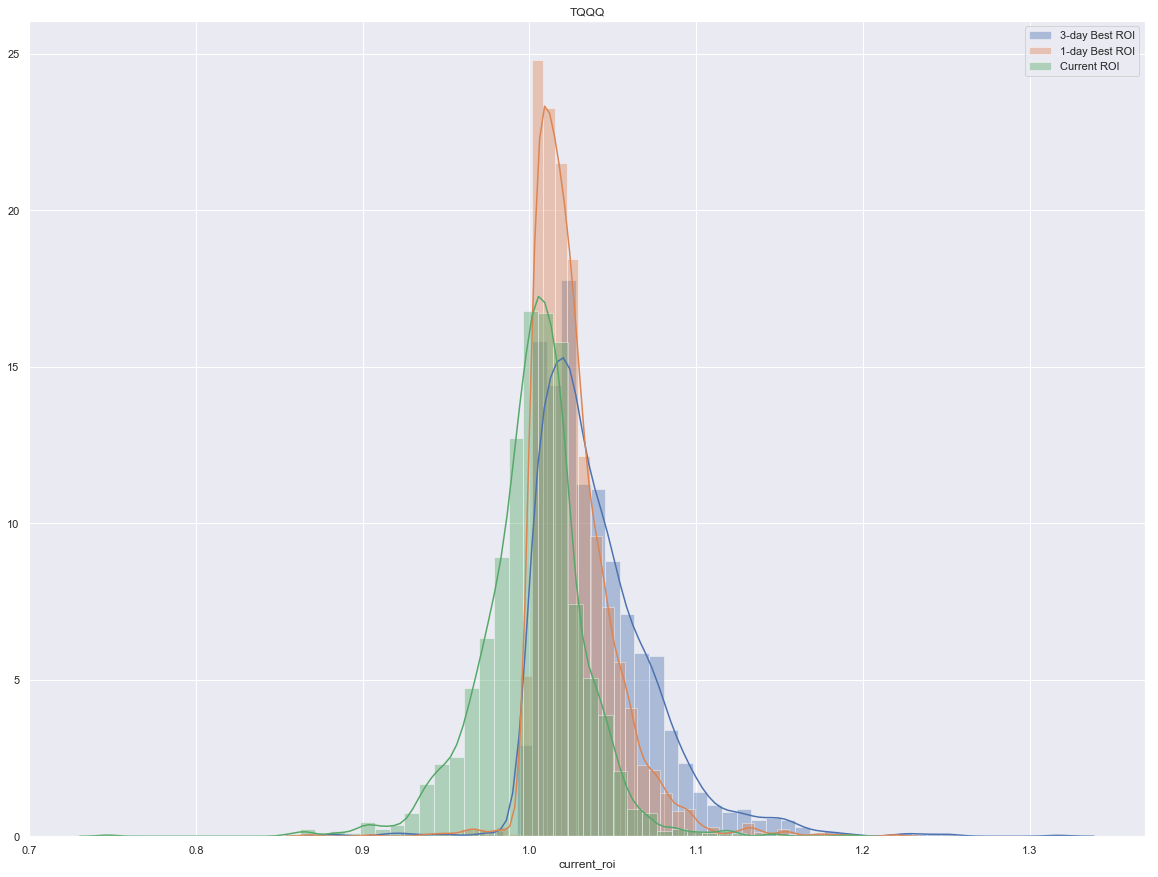

In [78]:
TQQQ.dropna(inplace=True)
 
fig, ax = plt.subplots()
ax.set_title('TQQQ')
# the size of A4 paper
fig.set_size_inches(20, 15)
sns.distplot(TQQQ['tar_3best_roi'], bins=50, ax=ax, label='3-day Best ROI');
sns.distplot(TQQQ['tar_1best_roi'], bins=50, ax=ax, label='1-day Best ROI');
sns.distplot(TQQQ['current_roi'], bins=50, ax=ax, label='Current ROI');
ax.legend()
#sns.set(font_scale=2)

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



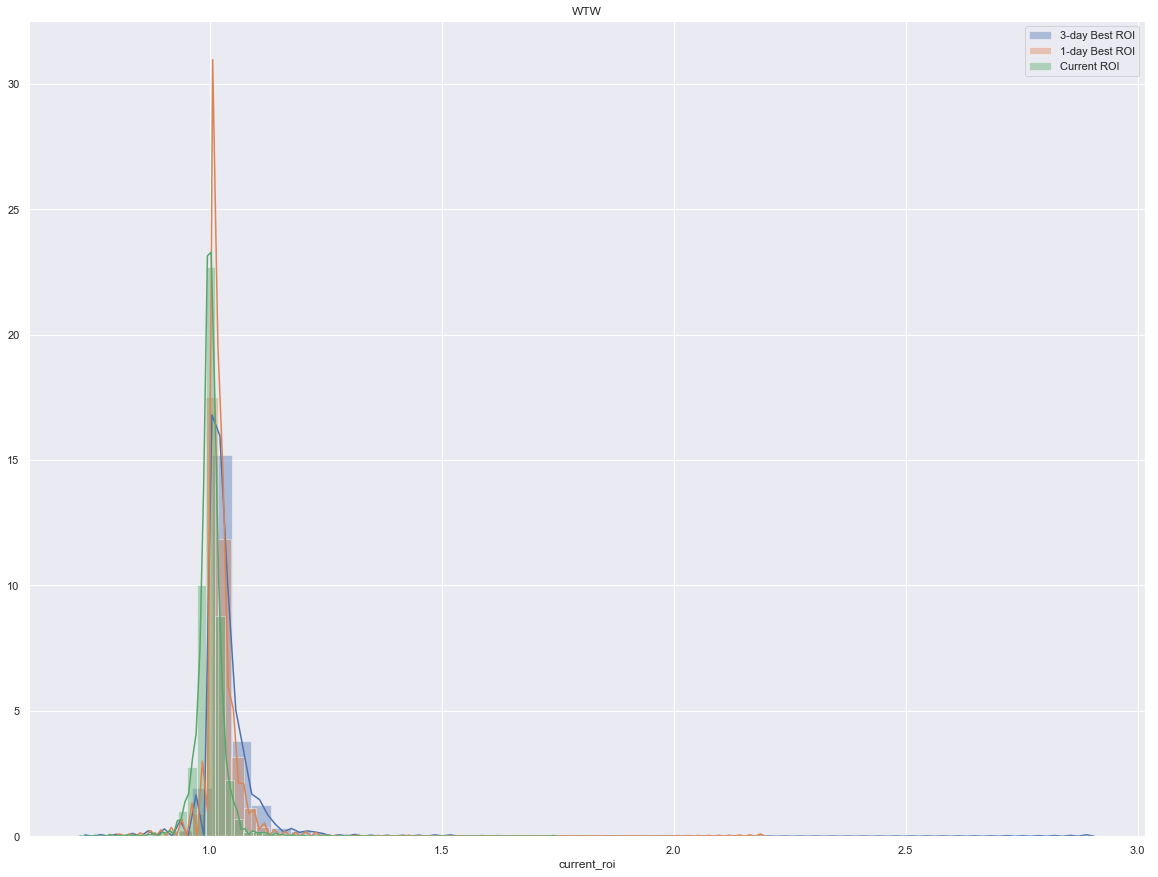

In [79]:
WTW.dropna(inplace=True)
 
fig, ax = plt.subplots()
ax.set_title('WTW')
# the size of A4 paper
fig.set_size_inches(20, 15)
sns.distplot(WTW['tar_3best_roi'], bins=50, ax=ax, label='3-day Best ROI');
sns.distplot(WTW['tar_1best_roi'], bins=50, ax=ax, label='1-day Best ROI');
sns.distplot(WTW['current_roi'], bins=50, ax=ax, label='Current ROI');
ax.legend()
#sns.set(font_scale=2)

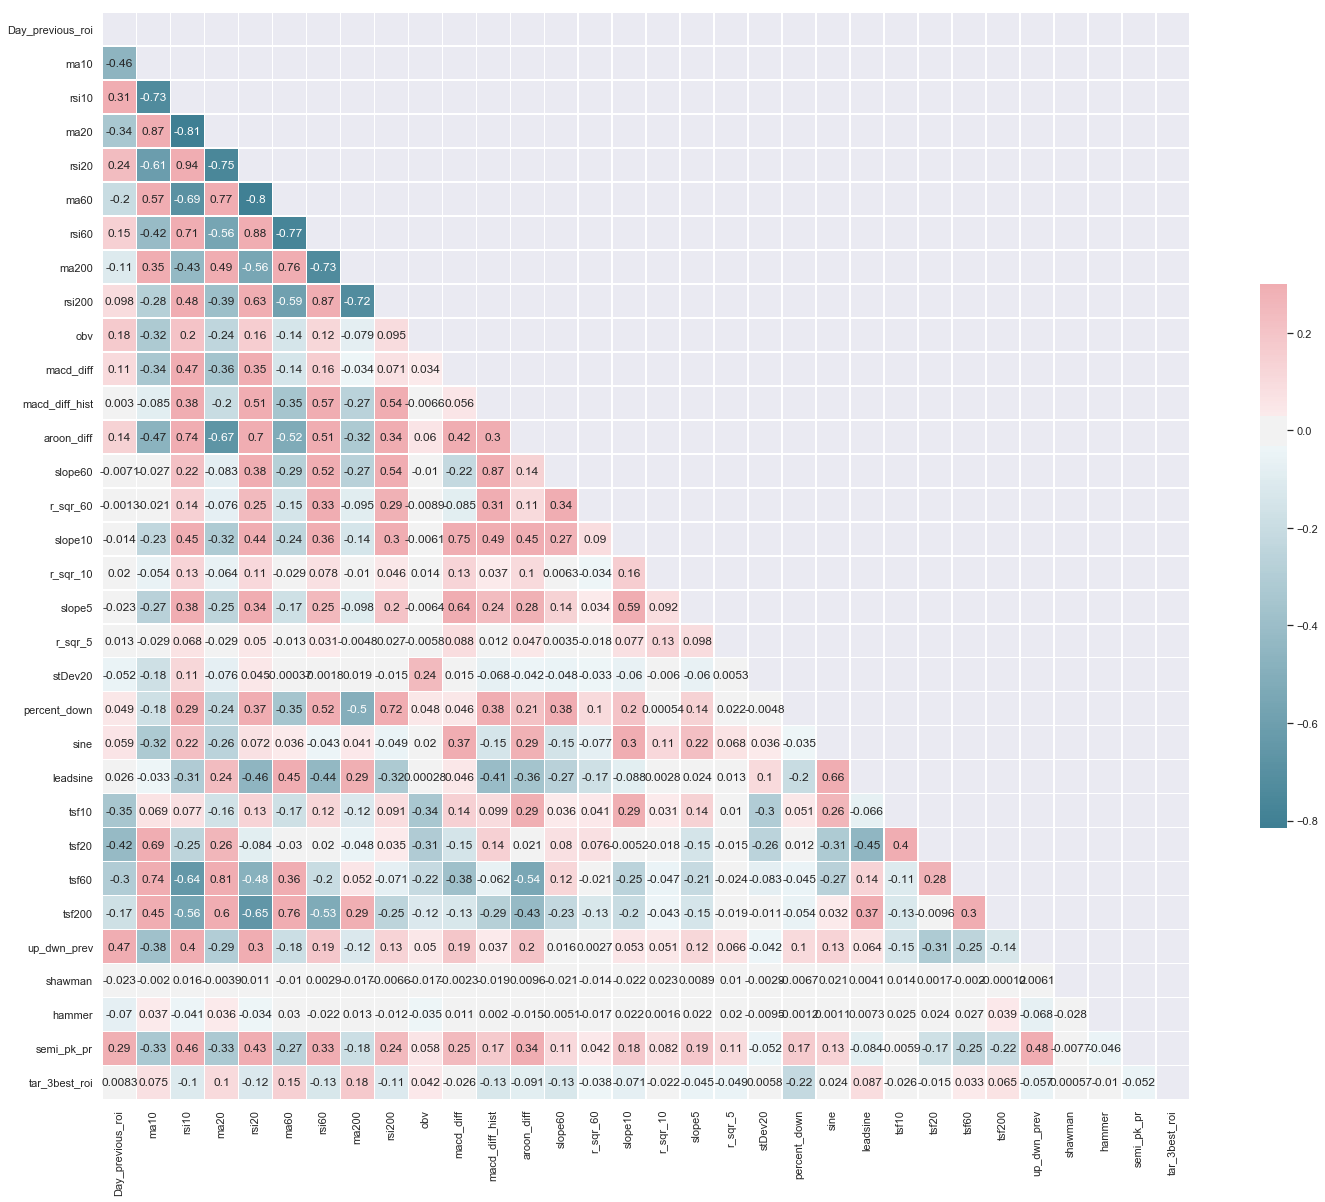

In [80]:
corr = AMZN.loc[:,corr_ft].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot= True,linewidths=.5, cbar_kws={"shrink": .5})

In [81]:
df = AMZN.loc[:,corr_ft].corr()
df['tar_3best_roi'].sort_values(ascending=False)

tar_3best_roi       1.000000
ma200               0.178373
ma60                0.149553
ma20                0.104702
leadsine            0.086853
ma10                0.074658
tsf200              0.064839
obv                 0.041640
tsf60               0.032966
sine                0.023940
Day_previous_roi    0.008252
stDev20             0.005826
shawman             0.000570
hammer             -0.010364
tsf20              -0.014819
r_sqr_10           -0.021716
macd_diff          -0.025501
tsf10              -0.026217
r_sqr_60           -0.038296
slope5             -0.044983
r_sqr_5            -0.048679
semi_pk_pr         -0.052177
up_dwn_prev        -0.056679
slope10            -0.071500
aroon_diff         -0.090615
rsi10              -0.103109
rsi200             -0.113121
rsi20              -0.117625
rsi60              -0.130398
slope60            -0.131031
macd_diff_hist     -0.134660
percent_down       -0.219271
Name: tar_3best_roi, dtype: float64

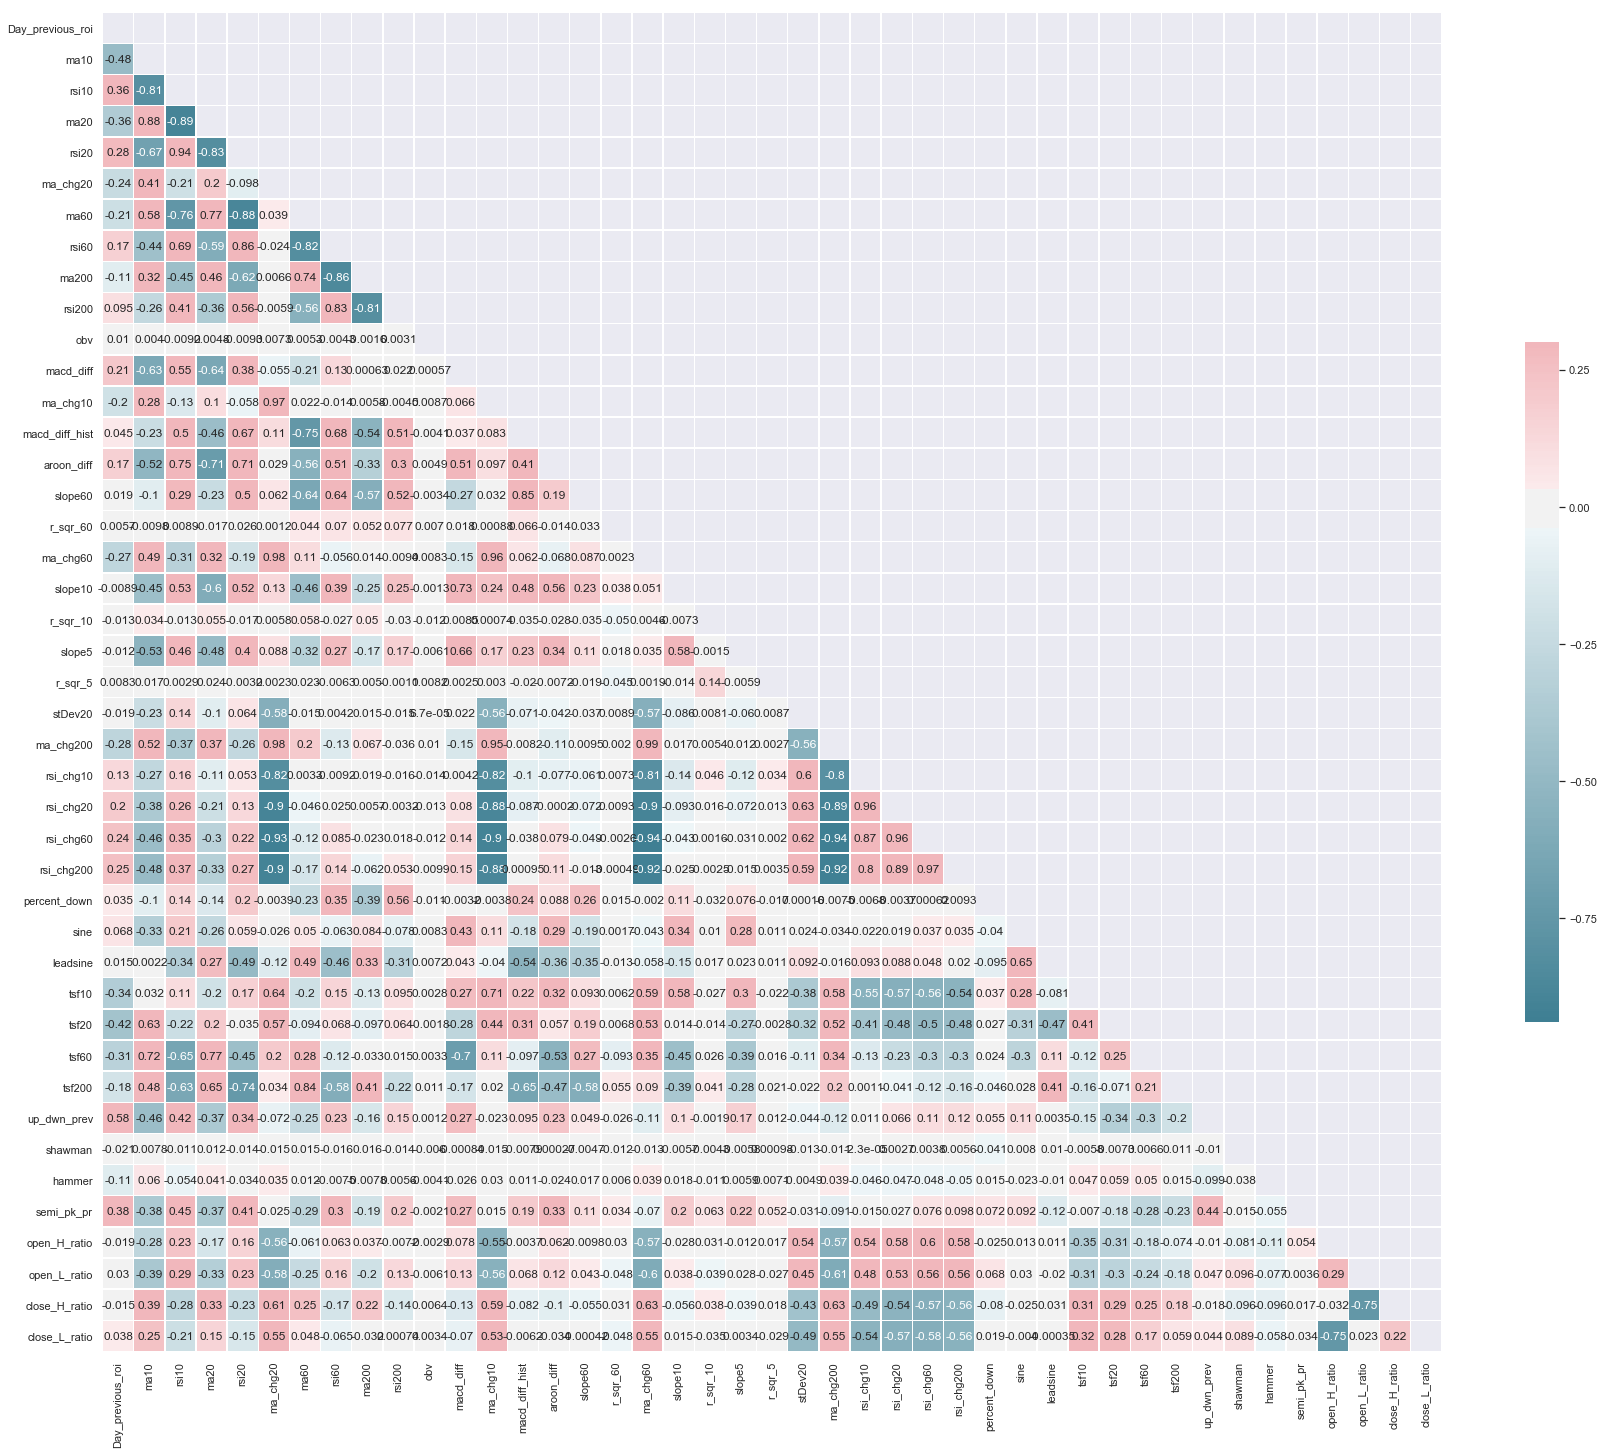

In [82]:
corr = AMD.loc[:,features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot= True,linewidths=.5, cbar_kws={"shrink": .5})

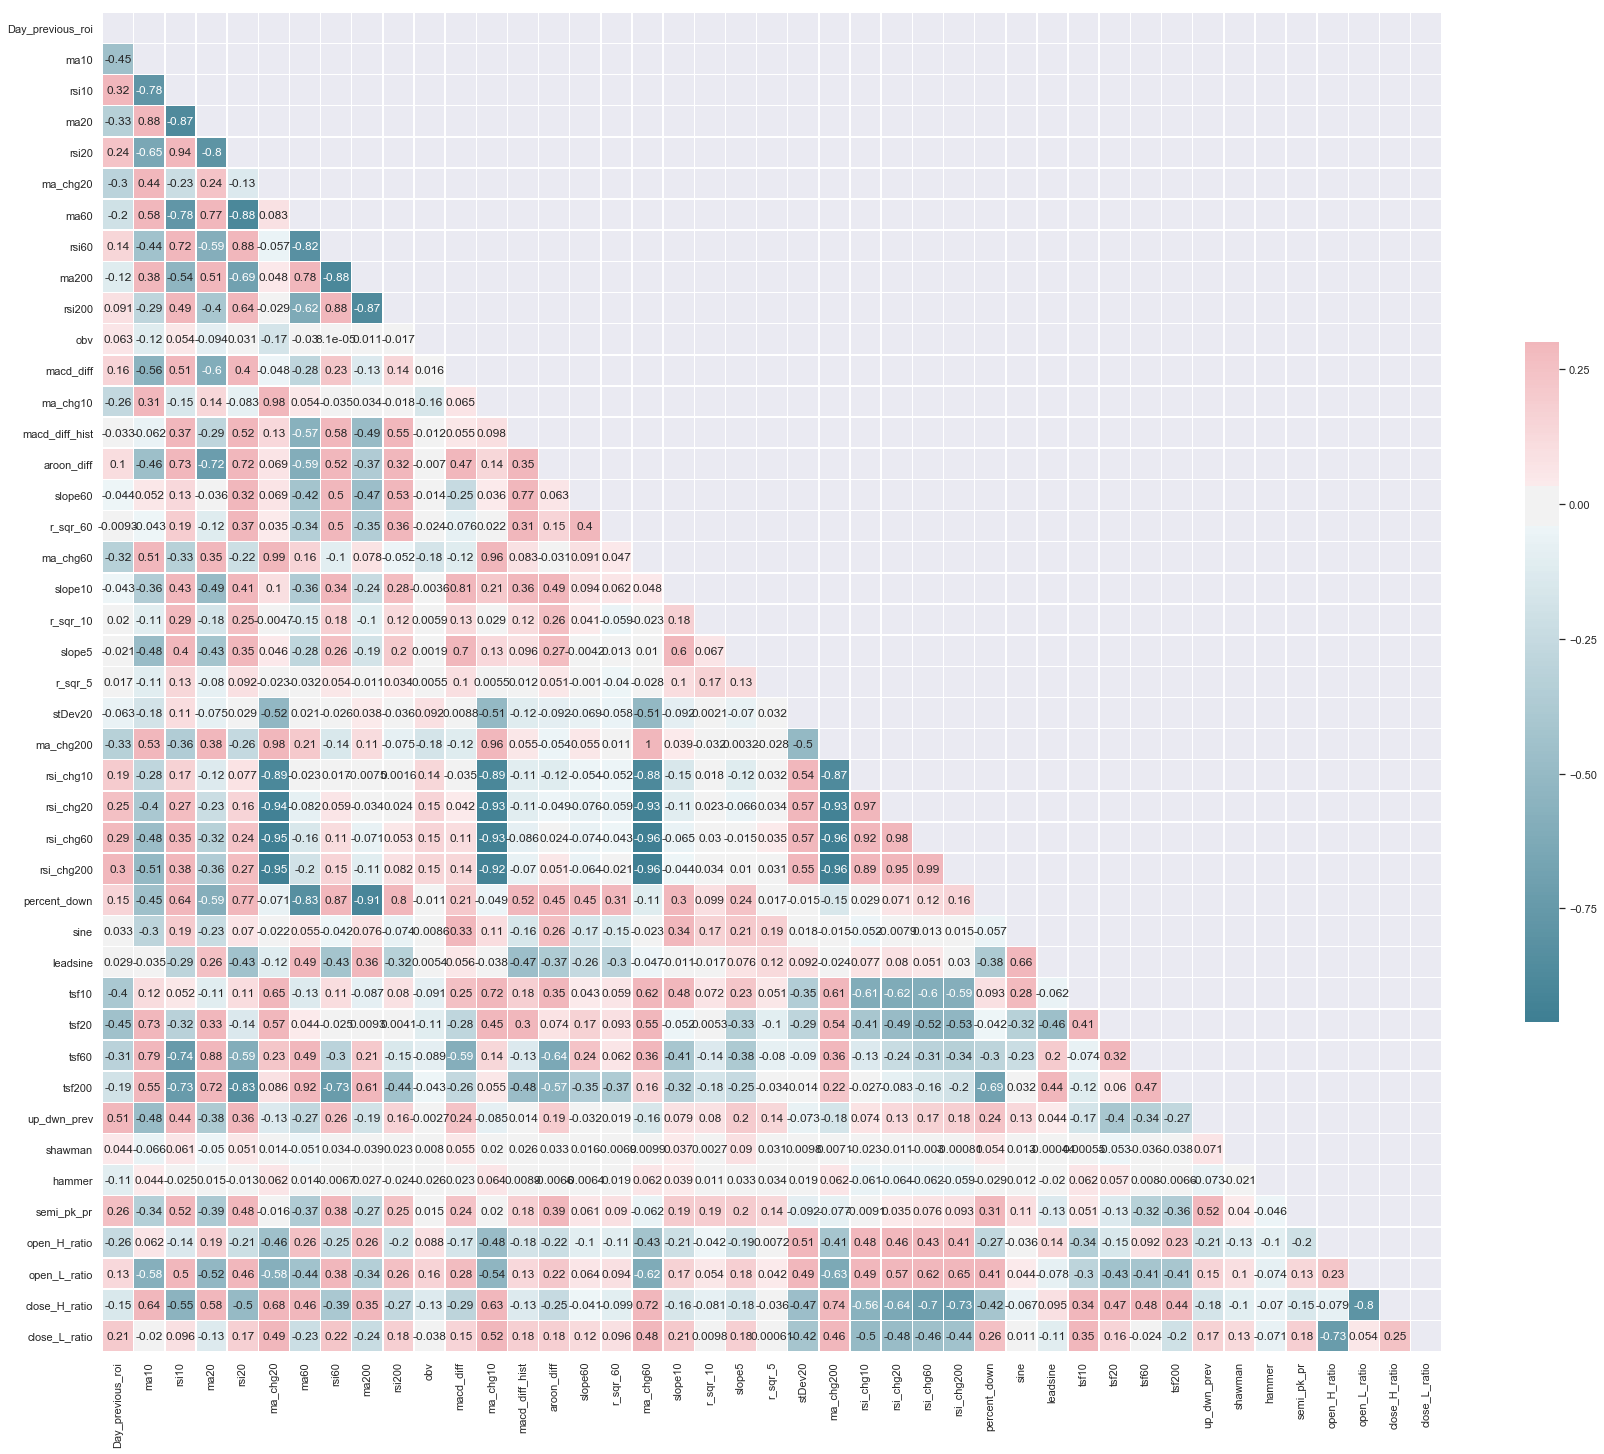

In [83]:
corr = TQQQ.loc[:,features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot= True,linewidths=.5, cbar_kws={"shrink": .5})

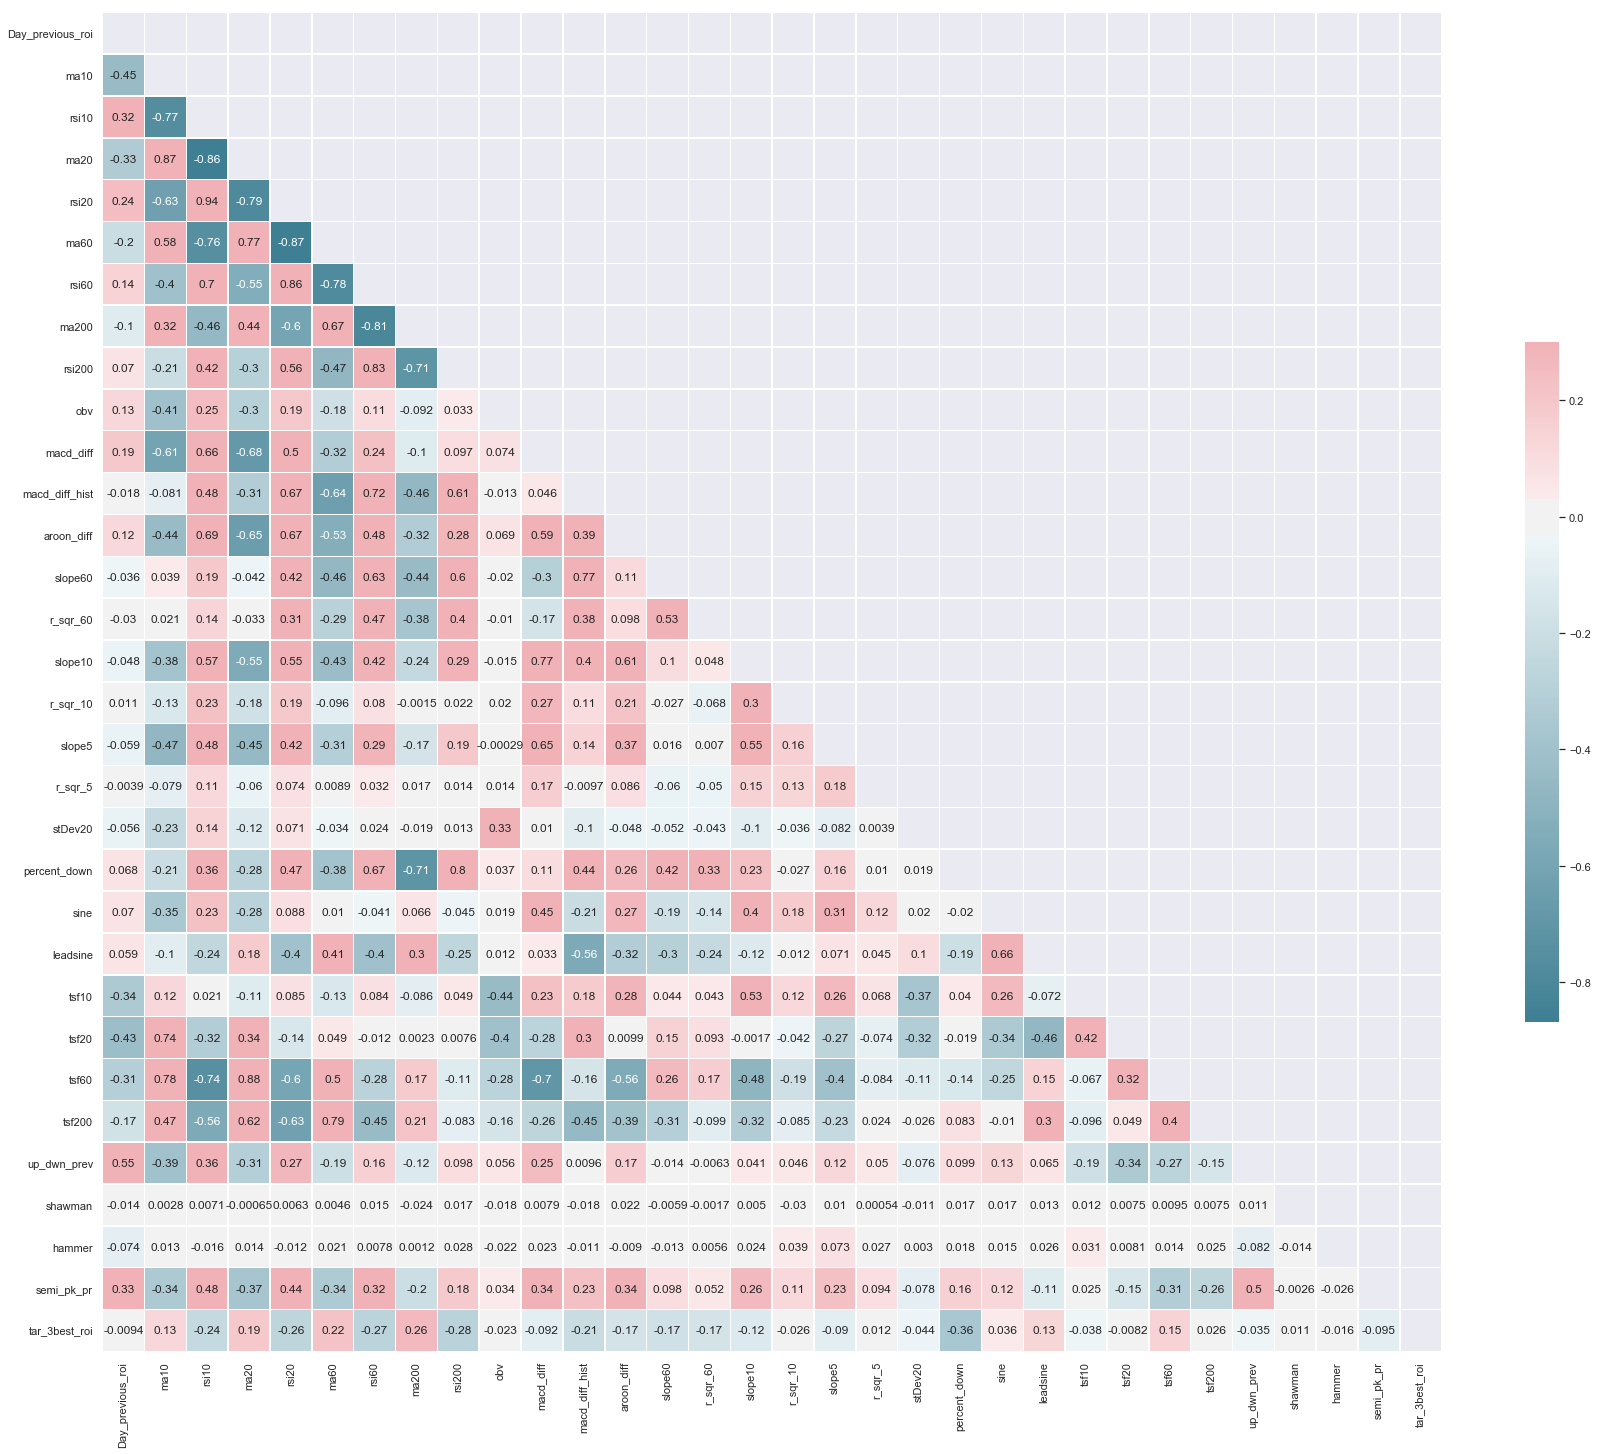

In [84]:
corr = V.loc[:,corr_ft].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot= True,linewidths=.5, cbar_kws={"shrink": .5})

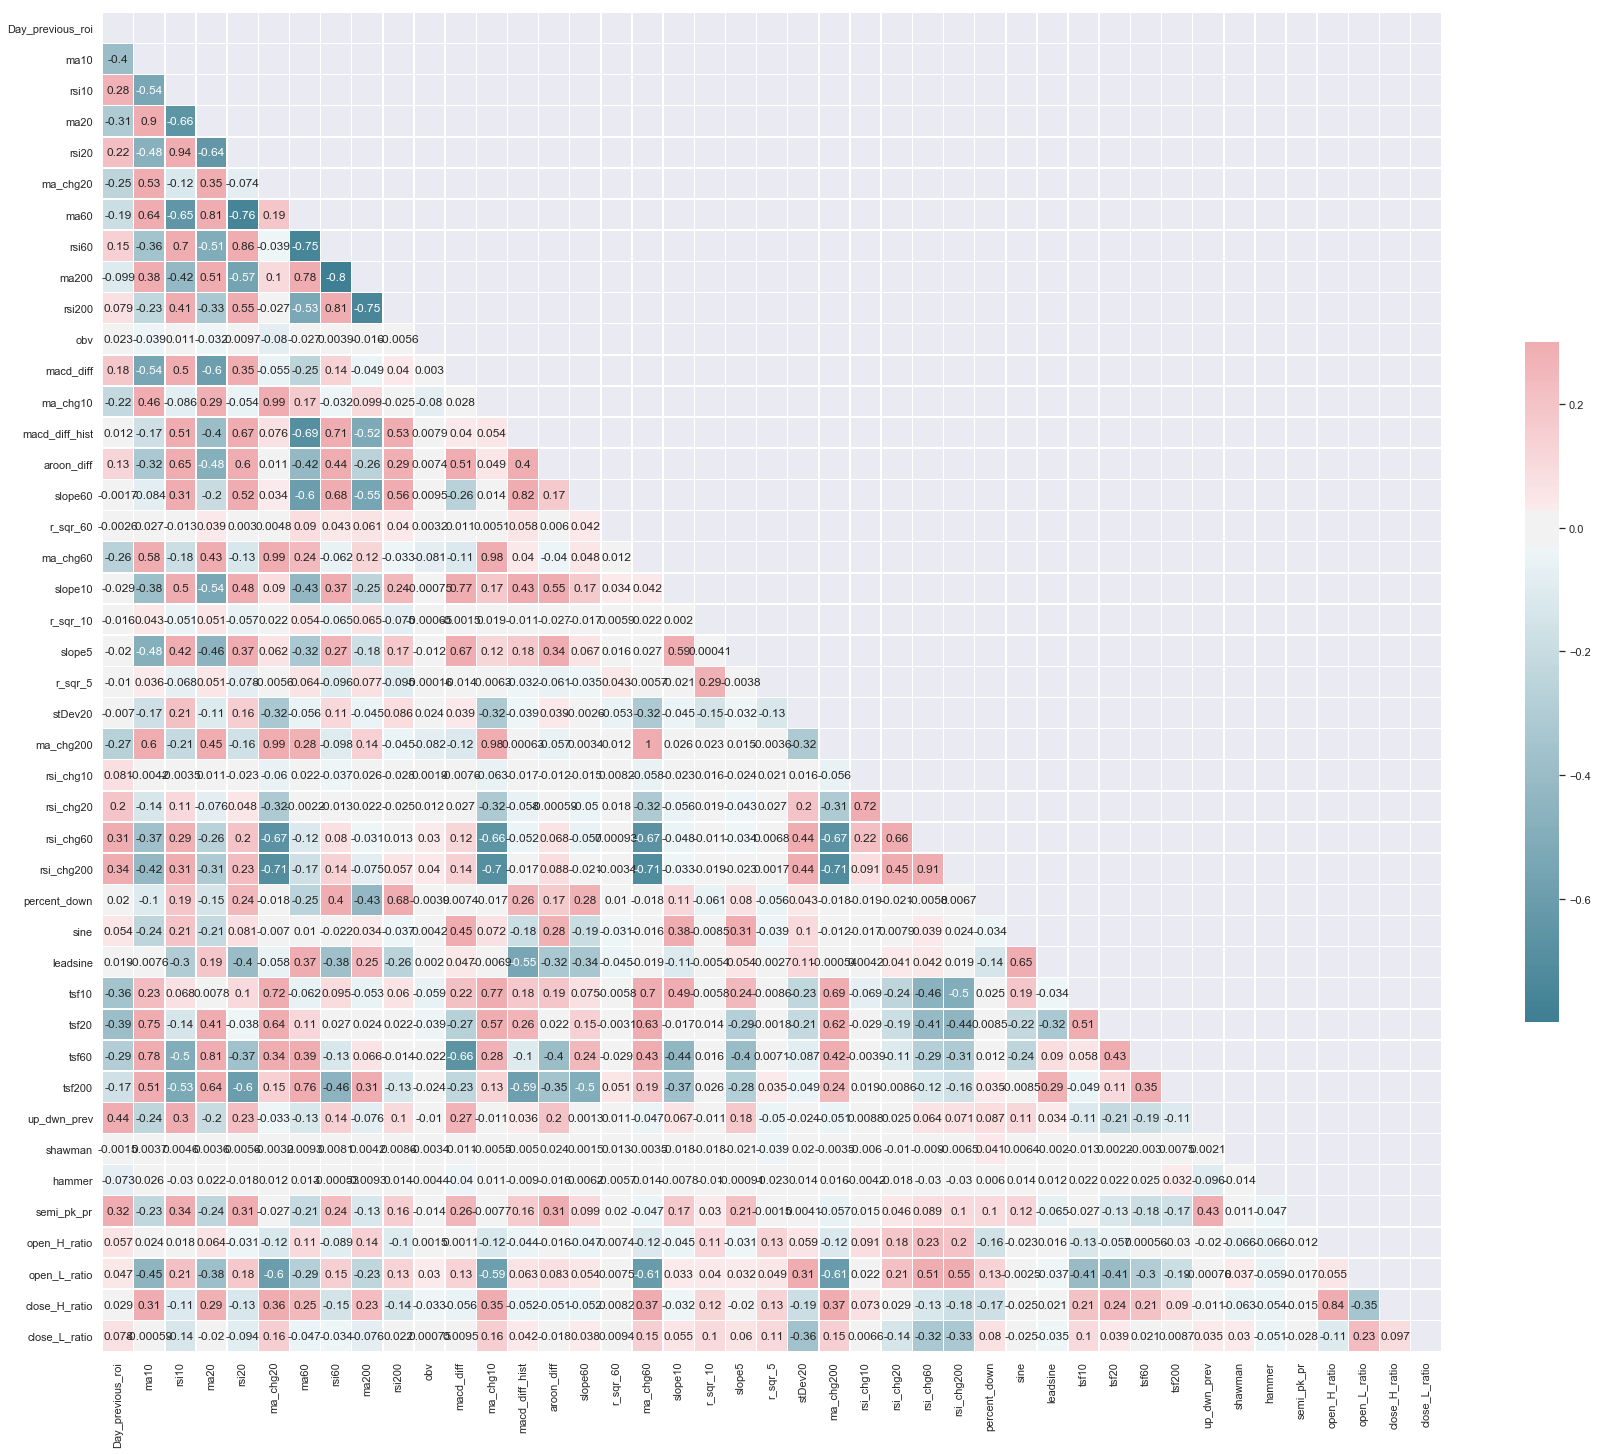

In [85]:
corr = HNGR.loc[:,features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot= True,linewidths=.5, cbar_kws={"shrink": .5})

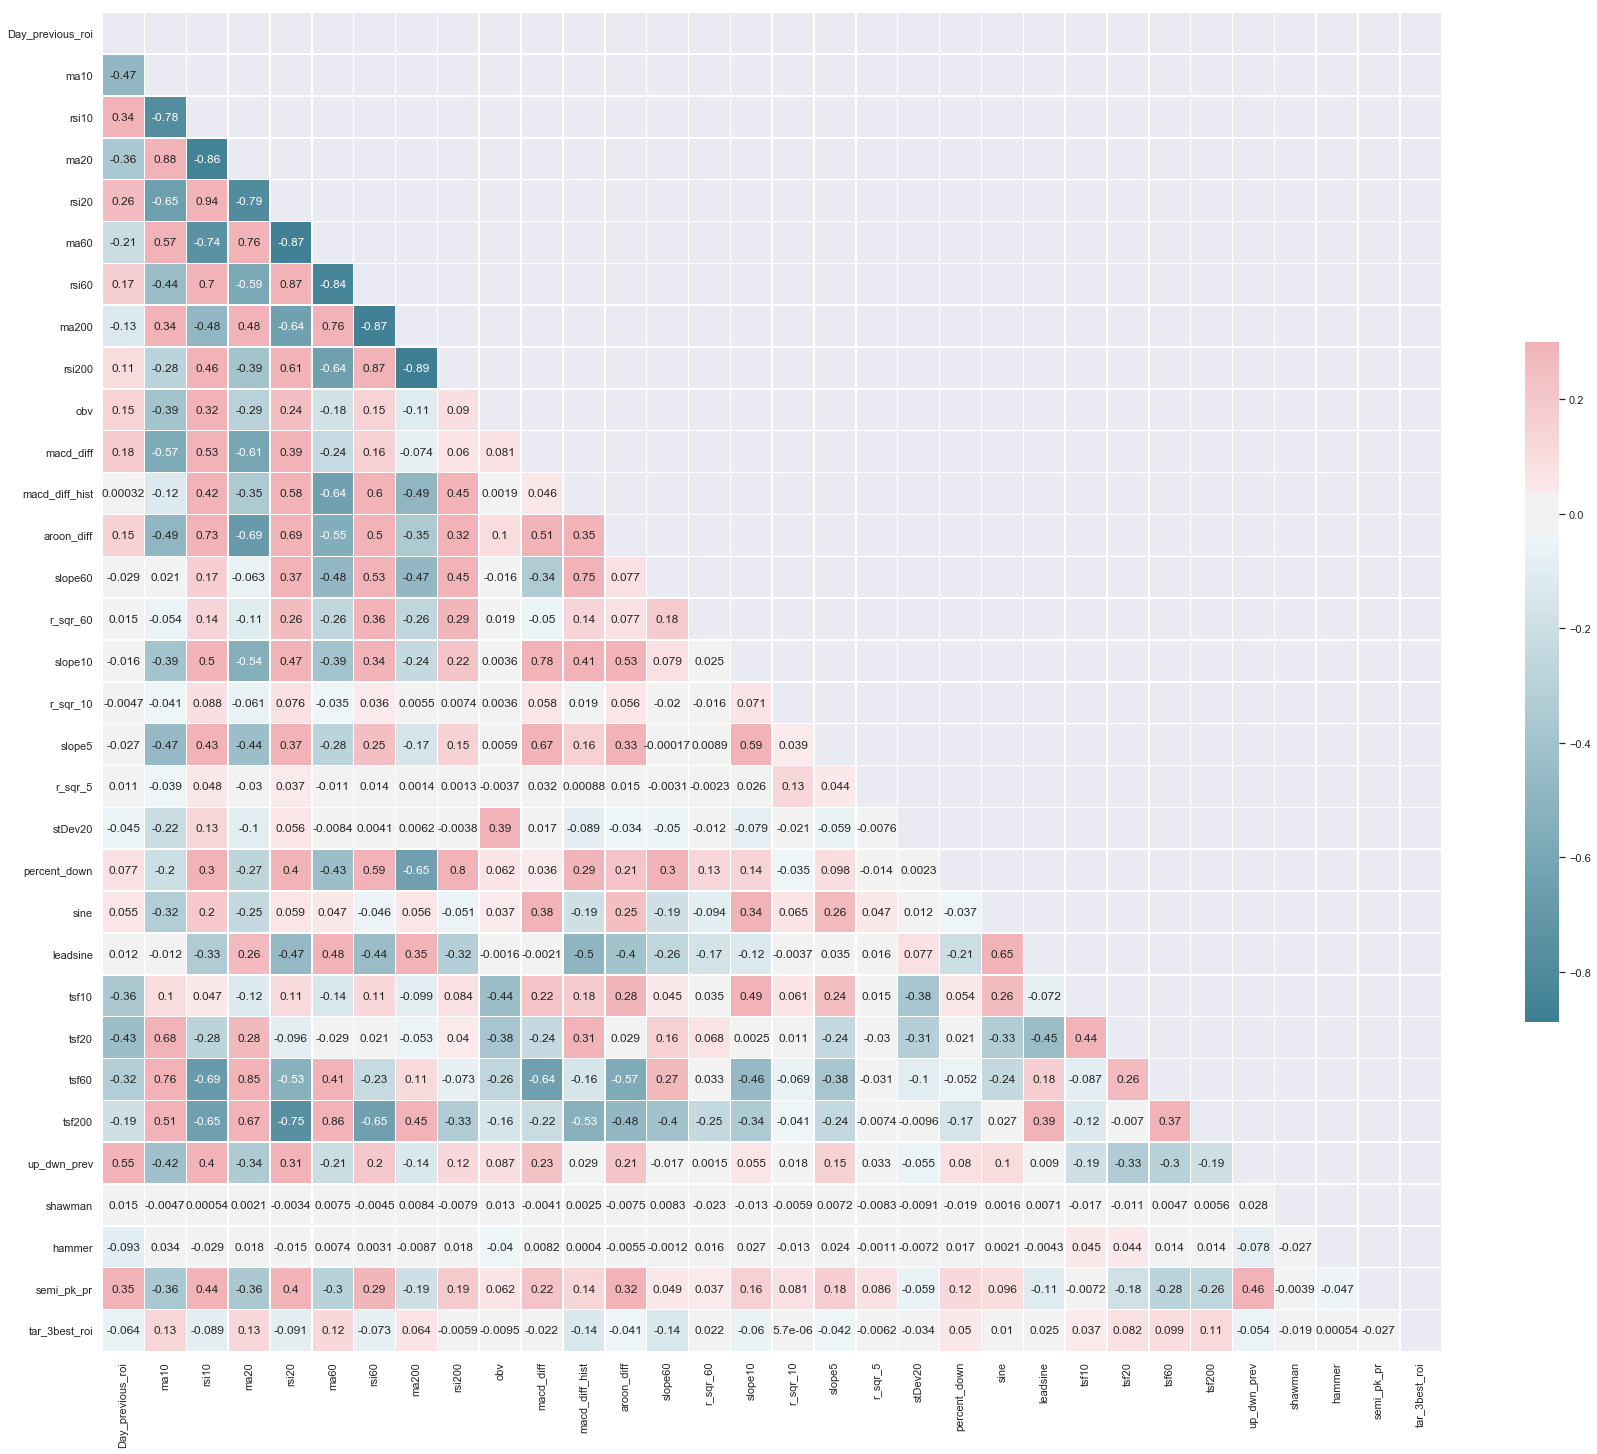

In [86]:
corr = MSFT.loc[:,corr_ft].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot= True,linewidths=.5, cbar_kws={"shrink": .5})

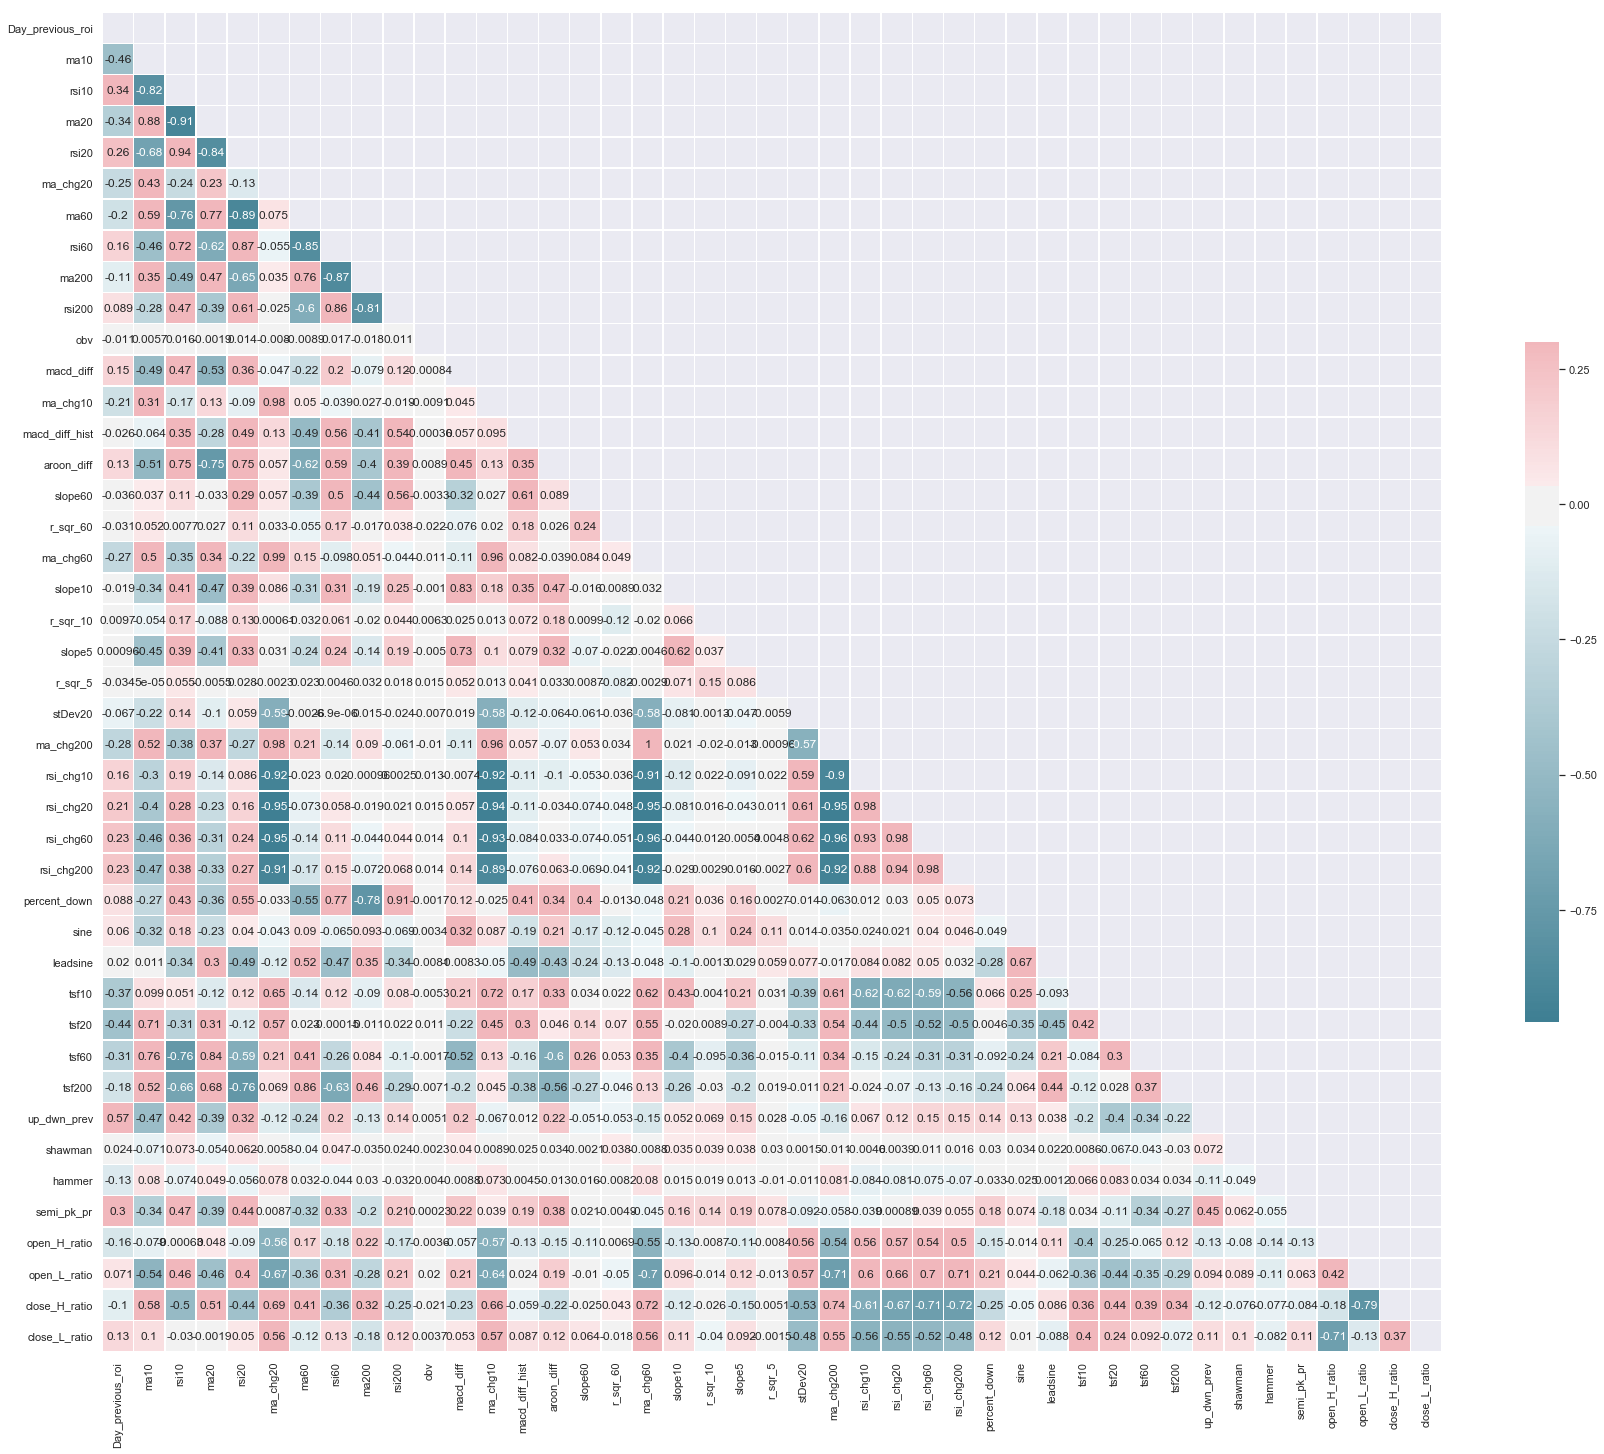

In [87]:
corr = SOXL.loc[:,features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 25))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot= True,linewidths=.5, cbar_kws={"shrink": .5})

In [88]:
df_cln = NFLX
stop = round(.80*len(df_cln))

#set features

feature_train = df_cln.loc[:stop,features]
feature_test = df_cln.loc[stop:,features]
    
#set my targets

target_train = df_cln.loc[:stop,[target_name]]
target_test = df_cln.loc[stop:,[target_name]]
    
rf2 = RandomForestClassifier(n_estimators=1100,
                             max_features=4,
                            n_jobs=-1,
                            max_depth=15,
                            random_state=42)

# Train the classifier
rf2.fit(feature_train, target_train)


feature_imp = pd.Series(rf2.feature_importances_,index=features).sort_values(ascending=False)
print(feature_imp)
# prediction on test set
target_pred=rf2.predict(feature_test)


# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.confusion_matrix(target_test, target_pred),'\n'
     "Accuracy:",metrics.accuracy_score(target_test, target_pred))

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



obv                 0.028673
macd_diff_hist      0.028463
slope60             0.028418
r_sqr_10            0.028066
close_L_ratio       0.027931
ma200               0.027877
r_sqr_60            0.027803
open_H_ratio        0.027793
tsf20               0.027733
Day_previous_roi    0.027668
r_sqr_5             0.027660
open_L_ratio        0.027103
slope10             0.027070
macd_diff           0.026902
close_H_ratio       0.026883
leadsine            0.026793
tsf200              0.026691
tsf10               0.026659
sine                0.026656
tsf60               0.026640
slope5              0.026538
ma10                0.025698
rsi200              0.025306
ma60                0.025222
percent_down        0.024948
rsi10               0.024876
ma20                0.024847
rsi20               0.024812
rsi60               0.024769
ma_chg10            0.023210
rsi_chg10           0.022796
ma_chg20            0.022477
rsi_chg20           0.022305
ma_chg200           0.021877
ma_chg60      

In [89]:



feature_predict = df_cln.loc[stop:,]
df_new = feature_predict.reset_index(drop=True)
df_1 = pd.DataFrame(target_pred,columns=['preds'])
new =df_new.merge(df_1,left_index=True, right_index=True)


In [90]:
thresh = []
for x in new['preds'].unique():
    thresh.append(float(x[4:]))


thresh = min(thresh)
print(new['preds'].unique())

['abv_1.01' 'bel_1.01' 'abv_1.0225' 'abv_1.044']


In [91]:
print(feature_predict.shape,target_pred.T.shape,'\n'
     'threshhold: ', thresh)


(778, 82) (778,) 
threshhold:  1.01


In [93]:
columns = ['percent_down','rsi20','tsf200','ma60','tar_1best_roi','current_roi']
top_10 = TQQQ.nlargest(10, 'tar_1best_roi')
top_10[columns]

percent_down      rsi20    tsf200      ma60  tar_1best_roi  current_roi
1190      0.721507  30.994010  1.291523  1.244813       1.218921     0.746766
213       0.584342  39.062916  1.300606  1.303238       1.188990     0.918985
187       0.619685  40.273066  1.389048  1.313377       1.178060     0.945425
524       0.746314  42.261415  1.096537  1.079290       1.171801     0.986740
193       0.668737  44.371954  1.249052  1.197843       1.158022     0.915878
1808      0.788230  40.410656  1.078328  1.034764       1.154729     0.867322
1218      0.693956  42.522046  1.230812  1.192160       1.152958     0.967176
1847      0.726834  40.846931  1.254401  1.195632       1.149808     0.947161
214       0.619899  42.321476  1.217812  1.220347       1.139179     1.087401
1192      0.627630  25.771496  1.468039  1.416335       1.138956     0.969721

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



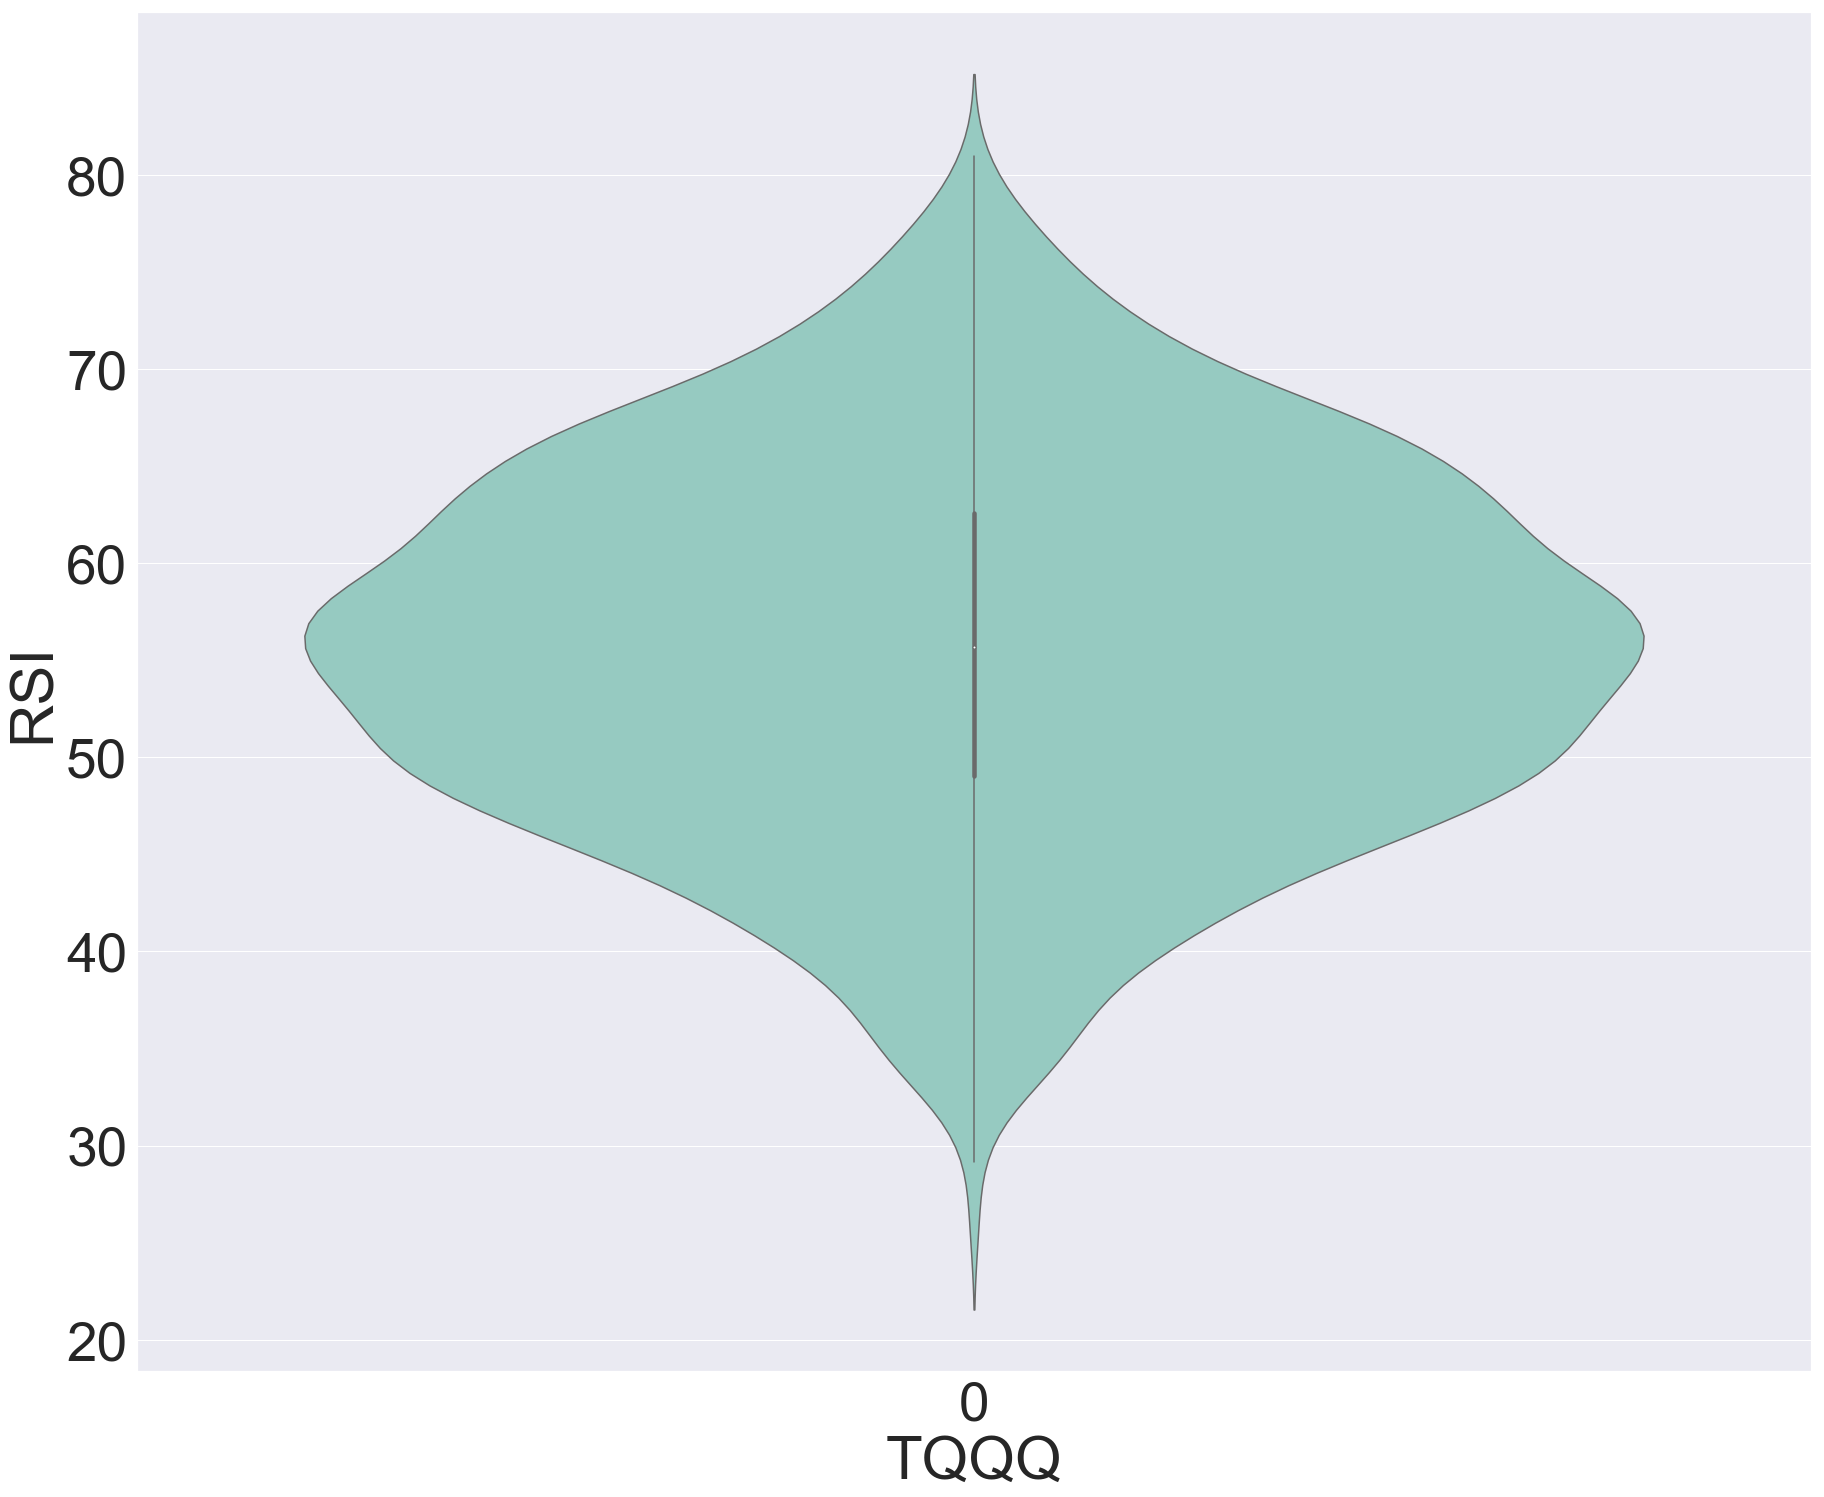

In [94]:
df= TQQQ[columns]

sns.set(font_scale=5)
plt.subplots(figsize=(30,25))
#sns.set(style="whitegrid")
ax = sns.violinplot( data=TQQQ['rsi20'],palette="Set3")
ax.set_xlabel('TQQQ',fontsize=60);
ax.set_ylabel('RSI',fontsize=60);




//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



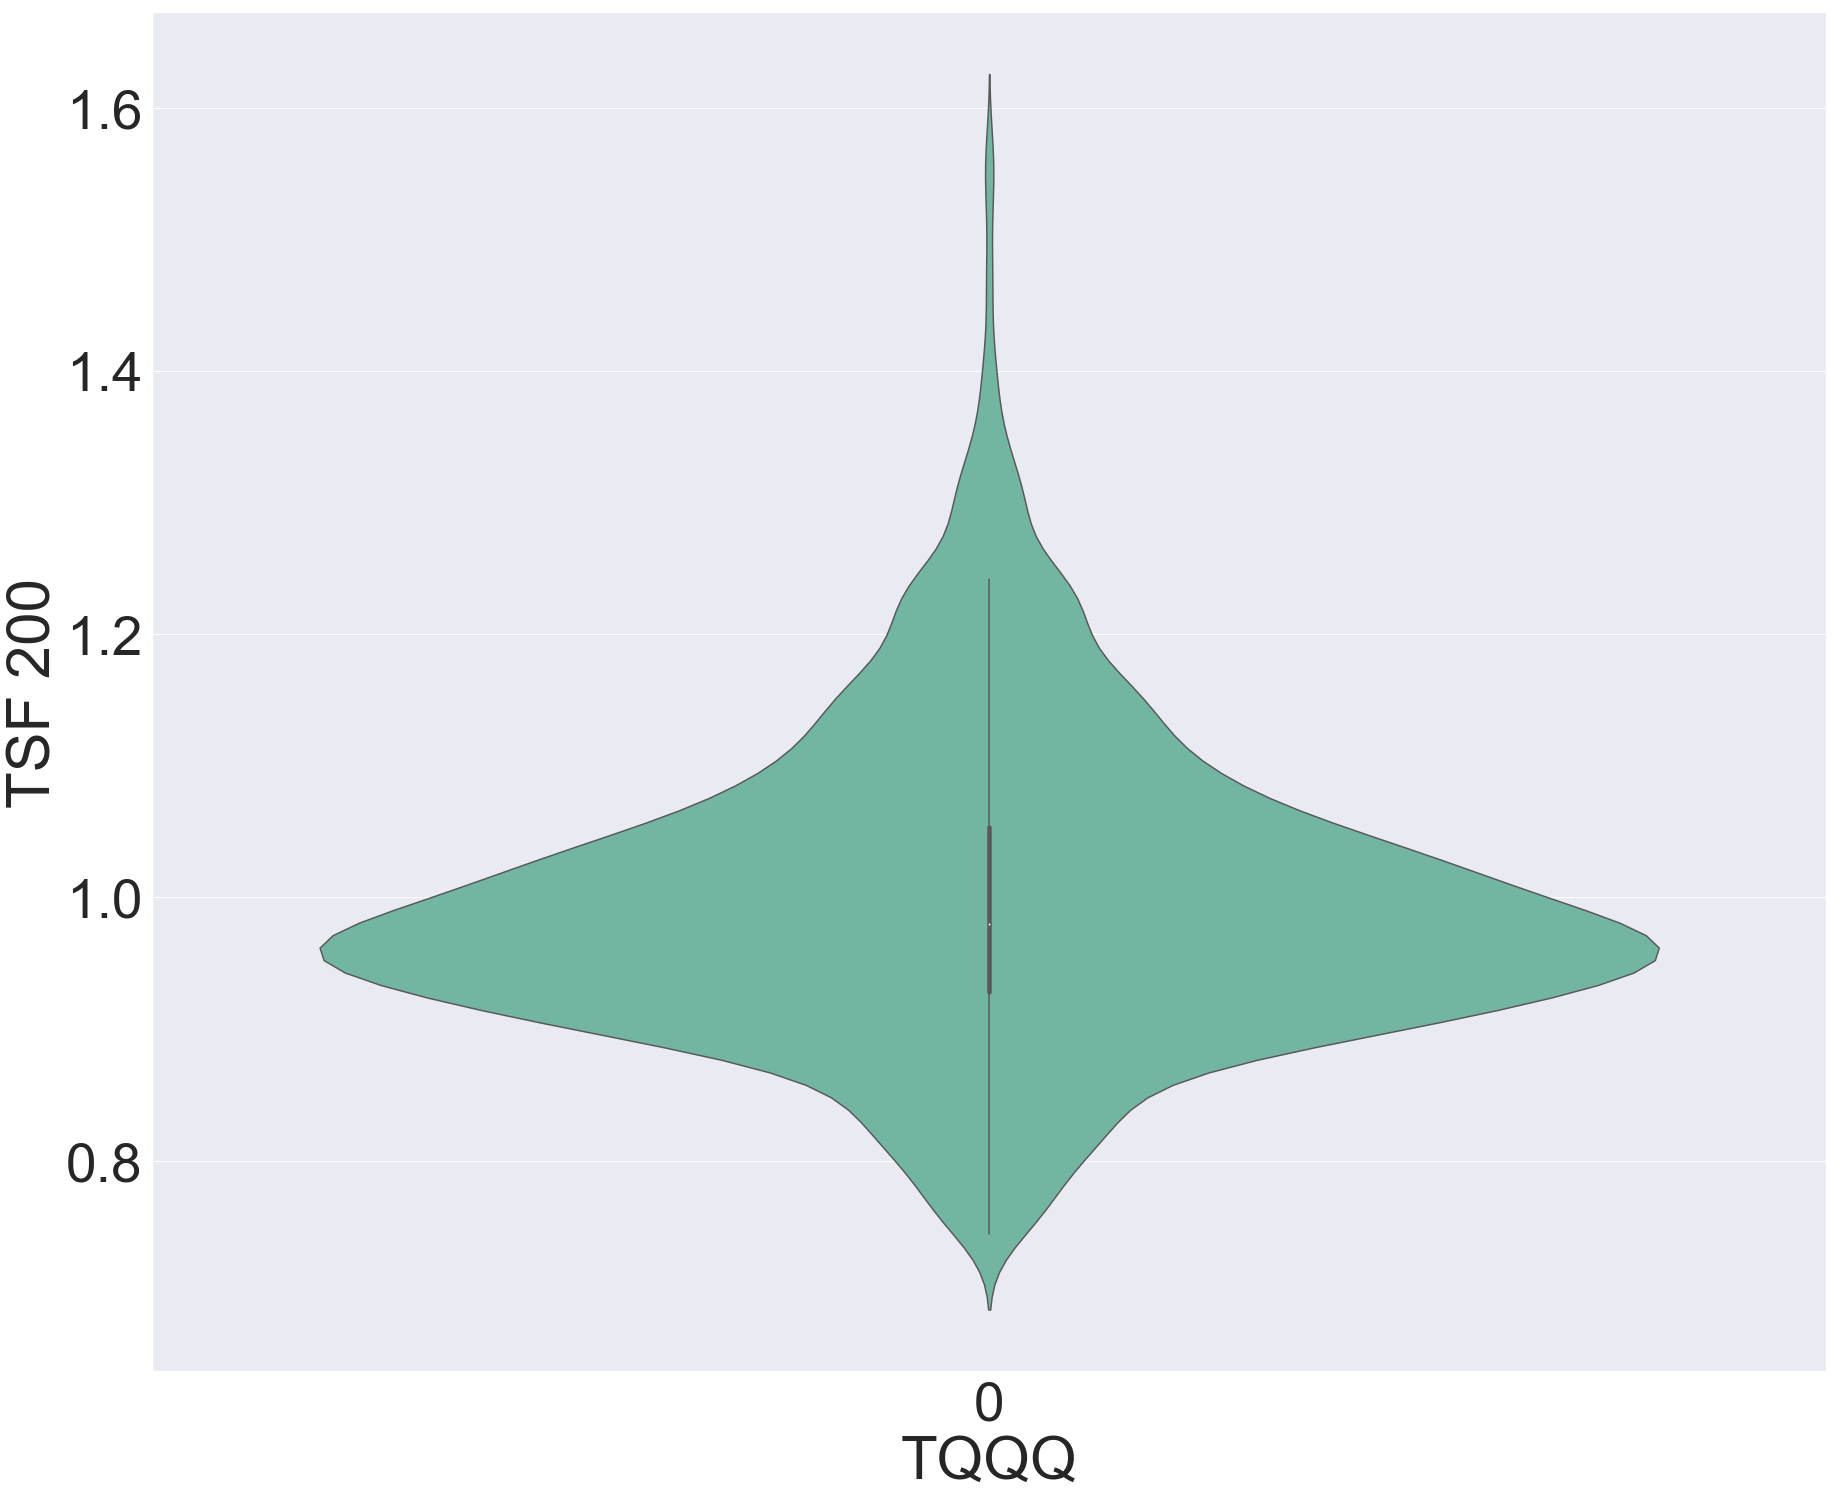

In [95]:
df= TQQQ[columns]

sns.set(font_scale=5)
plt.subplots(figsize=(30,25))
#sns.set(style="whitegrid")
ax = sns.violinplot( data=TQQQ['tsf200'],palette="Set2")
ax.set_xlabel('TQQQ',fontsize=60);
ax.set_ylabel('TSF 200',fontsize=60);



//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



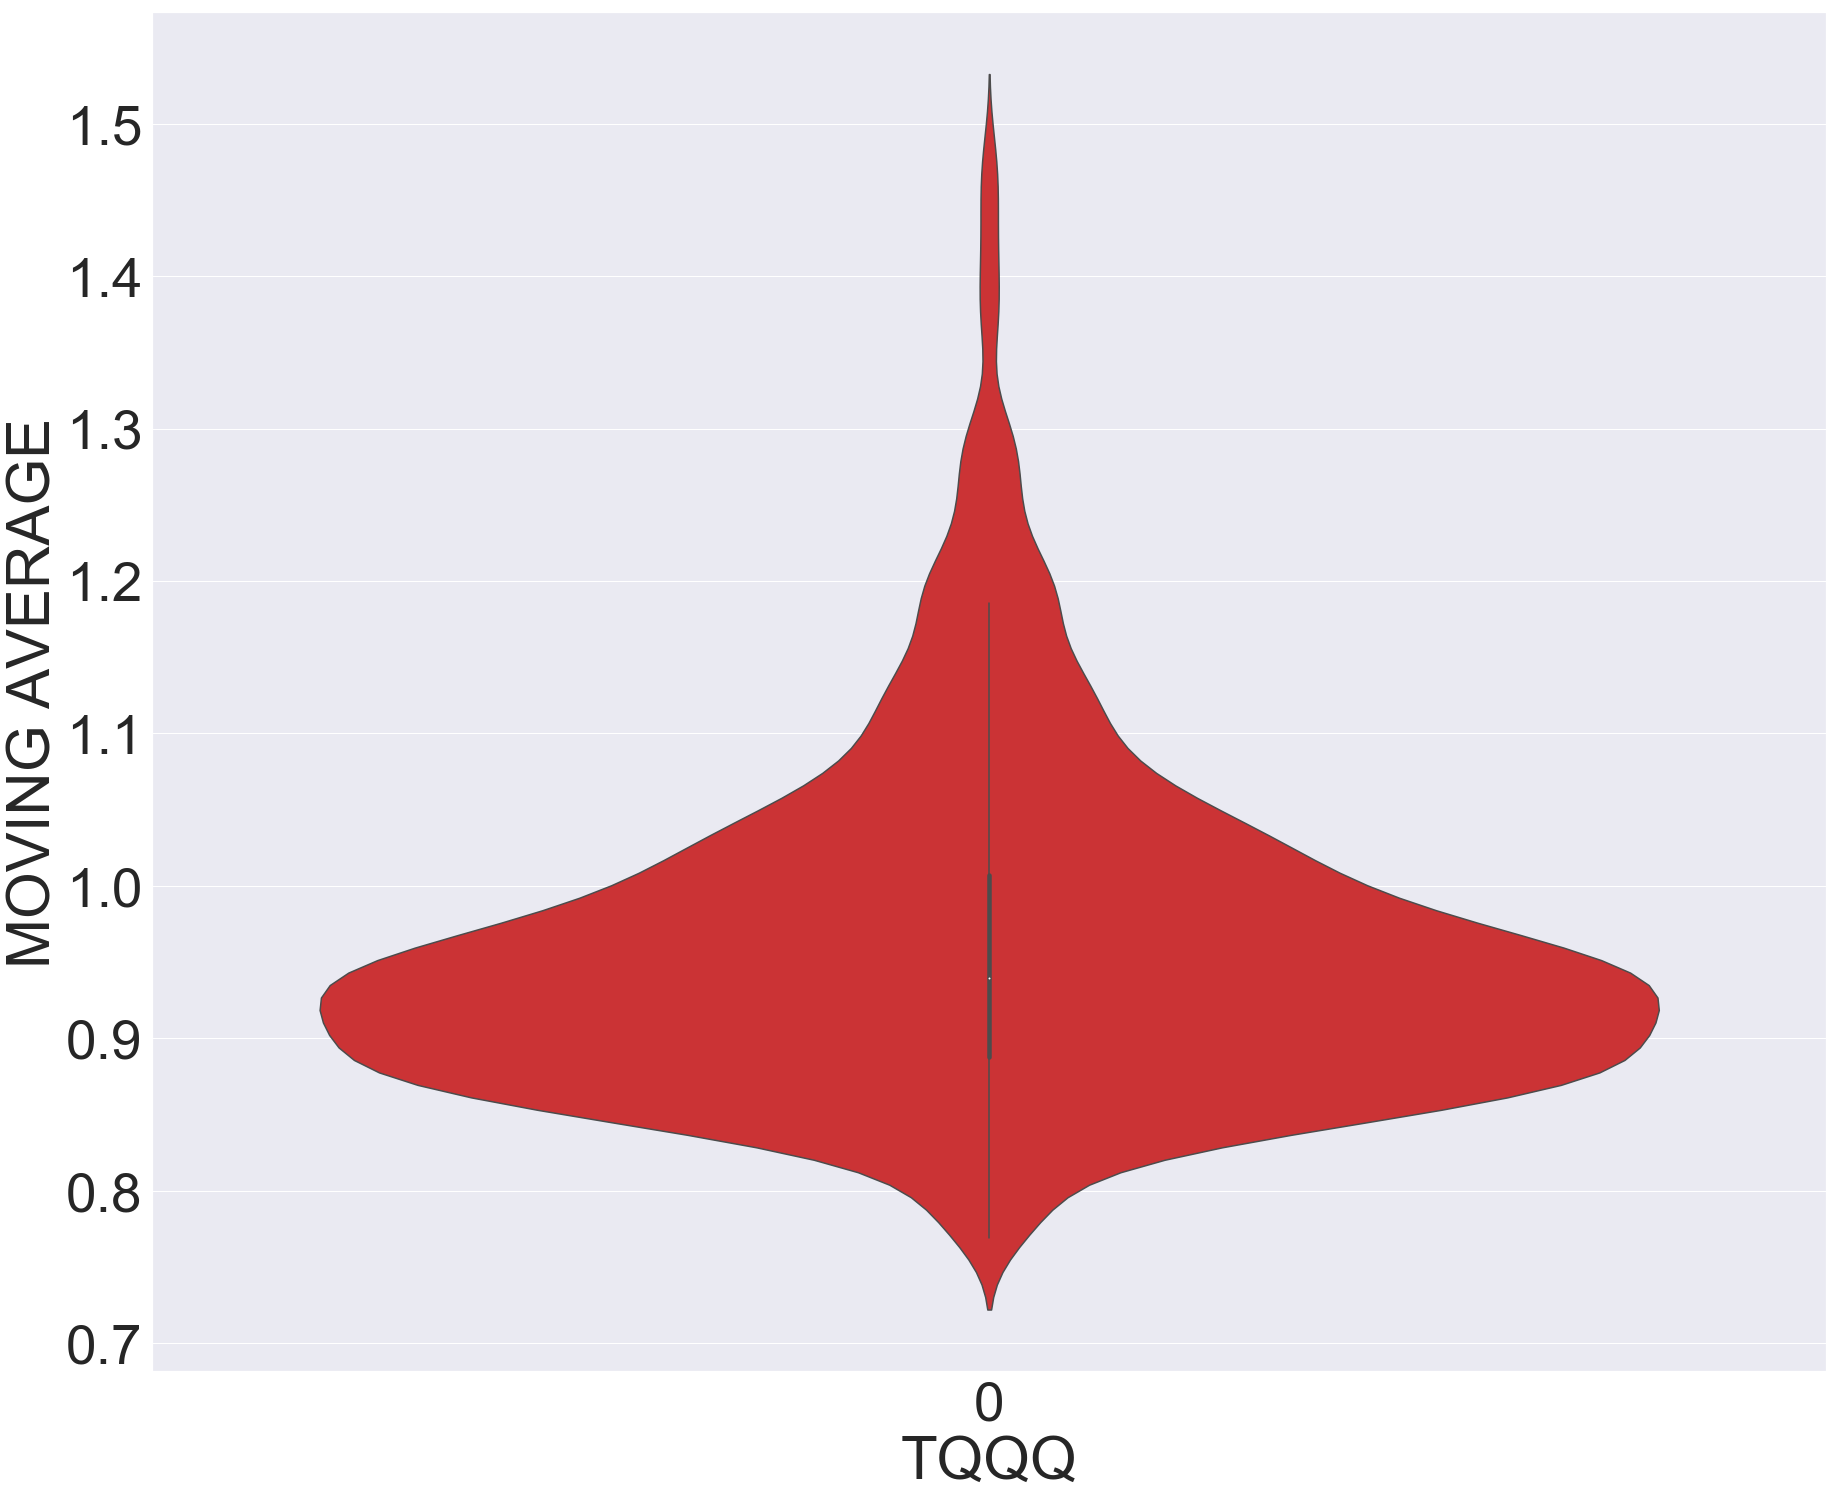

In [96]:
df= TQQQ[columns]

sns.set(font_scale=5)
plt.subplots(figsize=(30,25))
#sns.set(style="whitegrid")
ax = sns.violinplot( data=TQQQ['ma60'],palette="Set1")
ax.set_xlabel('TQQQ',fontsize=60);
ax.set_ylabel('MOVING AVERAGE',fontsize=60);

